# **Ggplot2**
R nos brinda múltiples formas de graficar, sin embargo `ggplot2` es una de las más elegantes y más versáties. Veremos que `ggplot2` un sistema de coherencia para la descripción y construcción de gráficas llamado *grammar graphics*. 

Antes de empezar a ralizar las gráficas mediante ggplot para ajustes y posicionamiento, instalemos las librerías de `tidyverse` y `Hminsc` para sacar caractacterísticas del data dataset que trabajaremos. 

In [1]:
# install.packages("tidyverse")
# install.packages("Hmisc")
# install.packages("dplyr")
# install.packages("maps")
# install.packages("ggplot2")
# #devtools::install_github('IRkernel/repr')
# #devtools::install_github("r-lib/scales")
# #devtools::install_github('thomasp85/farver')

In [2]:
library(IRdisplay)
library(IRkernel)
library(tidyverse)
library(Hmisc)
library(dplyr)
library(maps)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map




Para nuestra primera gráfica propongámonos responder una pregunta ¿Gastan más combustible los carros con motor grande que los carros con motor pequeño? Muy seguramente pues cualquier persona tenga ya una respuesta a esta pregunta desde su experiencia del diario vivir. Pero propongámonos hacer la respuesta un poco más precisa. ¿Cómo se ve la relación entre el tamaño de un motor y la eficiencia del combustible que gasta? ¿Es positiva? ¿Es negativa? ¿Es linea? ¿No lineal?

Podemos comprobar nuestra respuesta con la ayuda de el dataframe que trae por defecto `ggplot2`. Este contiene la información recolectada por el gobierno estadounidense de 38 modelos de carros.

Entre las variables encontraremos 2 de particular interes para nuestra pregunta y son:

- **displ**: El tamaño en litros del motor
- **hwy**: La eficiencia en carretera medida en millas por galón(mpg). Un carro con baja eficiencia consume mucho combustible al viajar una distancia dada en comparación con un auto con alta eficiencia que consumirá mucho menos combustible viajando la misma distancia.

Podemos saber más del dataframe usando `?mpg`

In [4]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


##**Graficado**

Para graficar información de `mpg` podemos correr el siguiente código haciendo la información de `disp` la variable en el eje $x$ y la información de `hwy` en el eje $y$

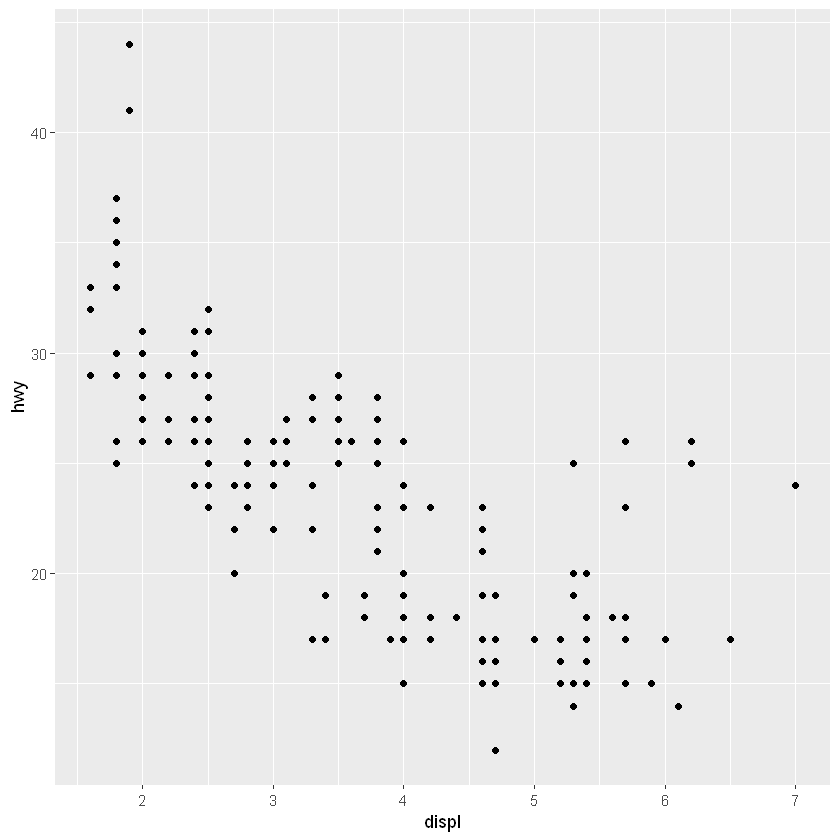

In [5]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy)) # la funcion geom_point() es para hacer un scatterplot, 
#mapping = aes(x = displ, y = hwy) es para decirle que las variables que se van a graficar son displ y hwy.

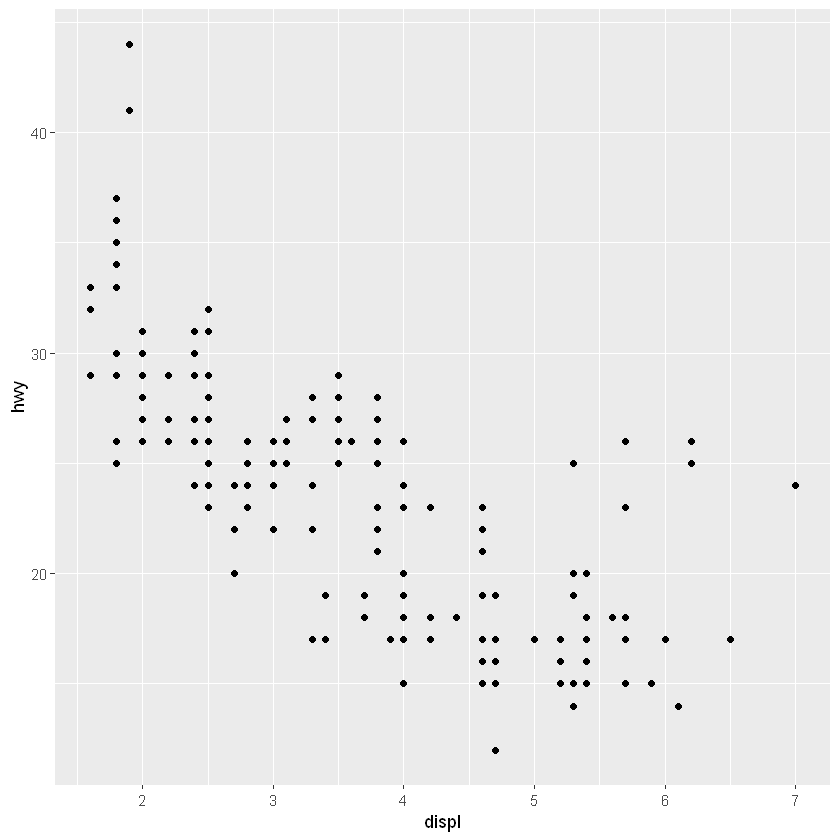

In [8]:
mpg %>% ggplot() + geom_point(aes(x = displ, y = hwy))

La gráfica anterior muestra una relación negativa en entre el tamaño del motor y le eficiencia en cuanto al combustible. In otras palabras, carros con motores más grandes usan más combustible. ¿Refuta esto o confirma la hipótesis inicial?

Con `ggplot2` se comienza una gráfica con la función `ggplot()`; esta crea un sistema de coordenadas, el primer arguento de dicha función es el dataset a graficar. En este caso `ggplot(data = mpg)` crea un "lienzo" o gráfica en blanco.

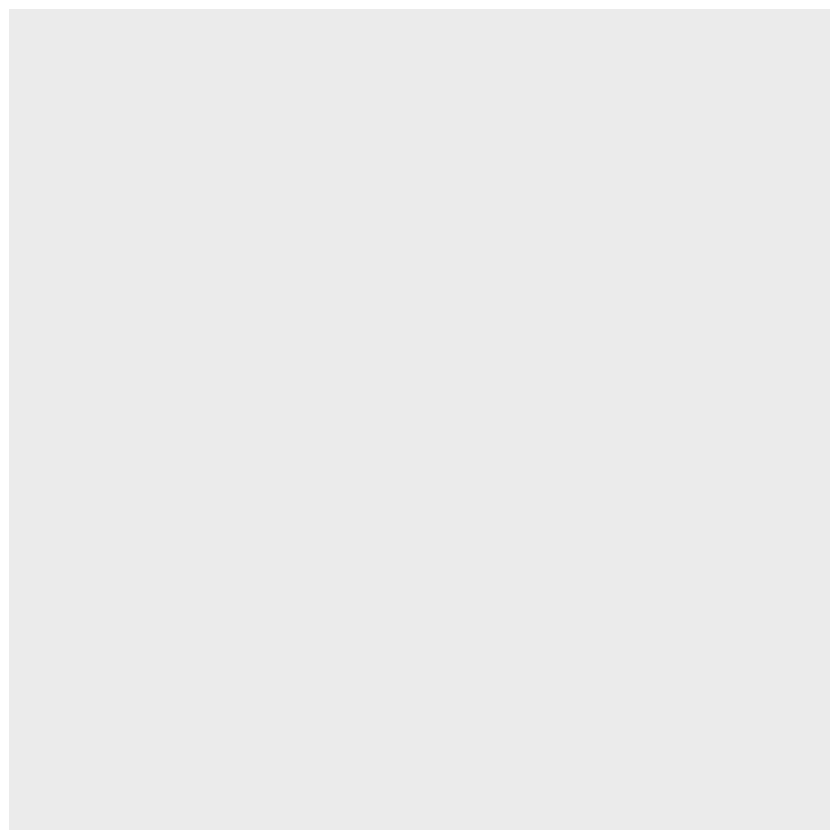

In [9]:
ggplot(data = mpg) # ggplot() es para decirle que se va a hacer un grafico de ggplot 

Esto no es muy interesante, completamos entonces el gráfico añadiendo más capas al `ggplot()`. La función `geom_point` entonces agrega la los puntos a el "lienzo" o gráfica, lo que acaba por crear un gráfico de dispersión. `ggplot` viene con muchísimas funciones `geom` que añaden un tipo diferente de graficado al "liezo", cada una de estas funciones acepta un argumento `mapping` Esto define cómo serán mapeadas las variables del dataset para poder visualizar sus propiedades. A su vez este último está siempre apareado con una función `aes()` que acepta como argumentos las variables a mapear en el eje $x$ y el eje $y$.

En resumen: podemos hacer una plantilla reusable para hacer gráficos de manera simple con `ggplot2` de la siguiente manera:

```
ggplot(data = <DATA>) + <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```
De esta forma solo tendremos que reemplazar lo que esté entre los bráquets en futuras ocasiones. Veamos ahora cómo completar o extender esta plantilla para hacer diferentes tipos de gráficas. Empezemos con lo que son los argumentos de `mapping`


### **Ejercicio**
Haga una gráfica de dispersión entre `cyl` y `hwy`. ¿Qué conclusiones podemos extraer?

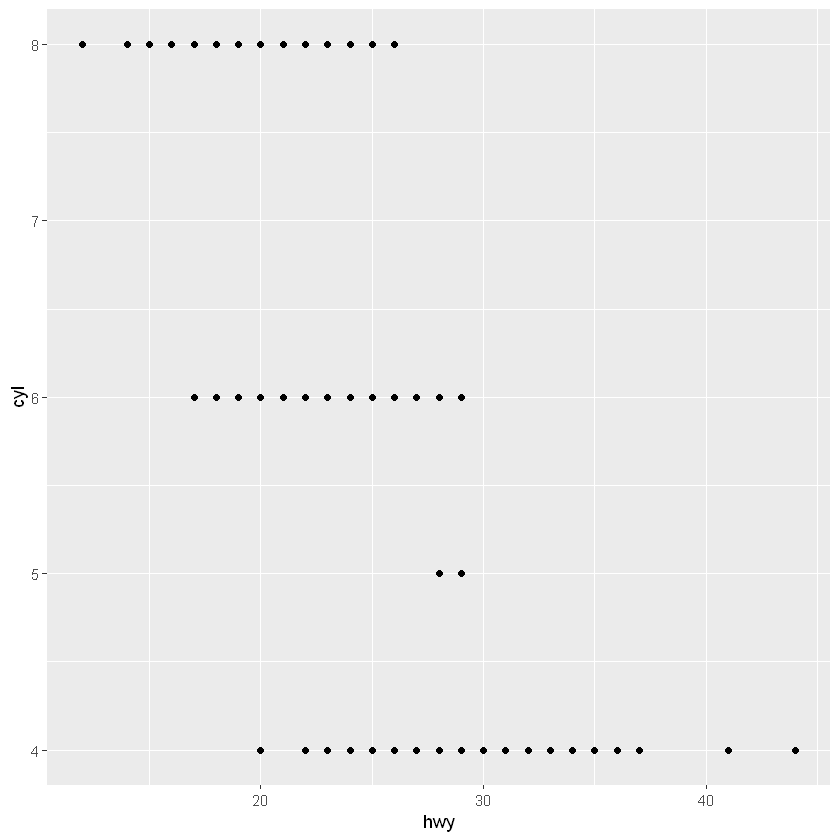

In [10]:
ggplot(data = mpg) + geom_point(mapping = aes(x = hwy, y = cyl))

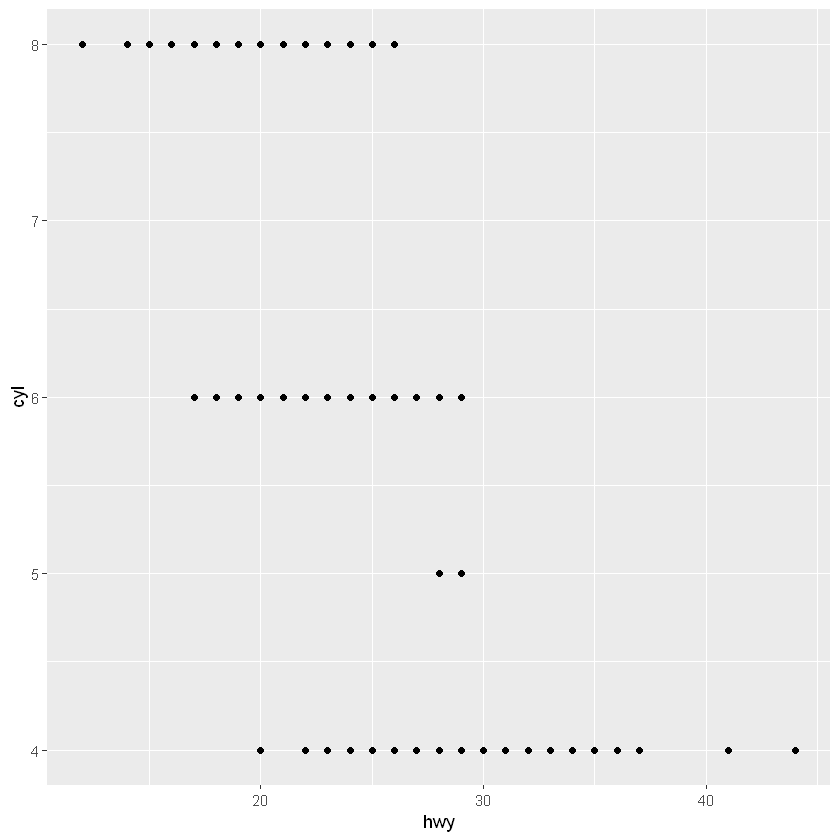

In [10]:
mpg %>%
  ggplot() +
  geom_point(mapping = aes(x = hwy, y = cyl))

#**Mapeos estéticos**

En la gráfica de eficiencia versus el tamaño vemos, un grupo de puntos que parecen estar fuera de la tendencia lineal. Estos autos tienen una eficiencia más alto de lo que cabría esperar. ¿Cómo puedes explicar estos autos?

Supongamos que los autos son híbridos. Una forma de probar esta hipótesis es observar el valor de la clase para cada automóvil. La variable de `class` del conjunto de datos `mpg` clasifica los autos en grupos como compactos, medianos y SUV. Si los puntos periféricos son híbridos, deberían clasificarse como autos compactos o, quizás, autos subcompactos (tenga en cuenta que esta información se recopiló antes de que los camiones híbridos y los SUV se volvieran populares).

Puede agregar una tercera variable, como class, a un diagrama de dispersión bidimensional al asignarla a una estética. Una estética es una propiedad visual de los objetos en la gráfica. La estética incluye cosas como el tamaño, la forma o el color de sus puntos. 

Podemos entonces mostrar la información sobre sus datos mapeando la estética de la gráfica a las variables en su conjunto de datos. Por ejemplo, puede asignar los colores de sus puntos a la variable de clase para revelar la clase de cada automóvil:

Saving 6.67 x 6.67 in image


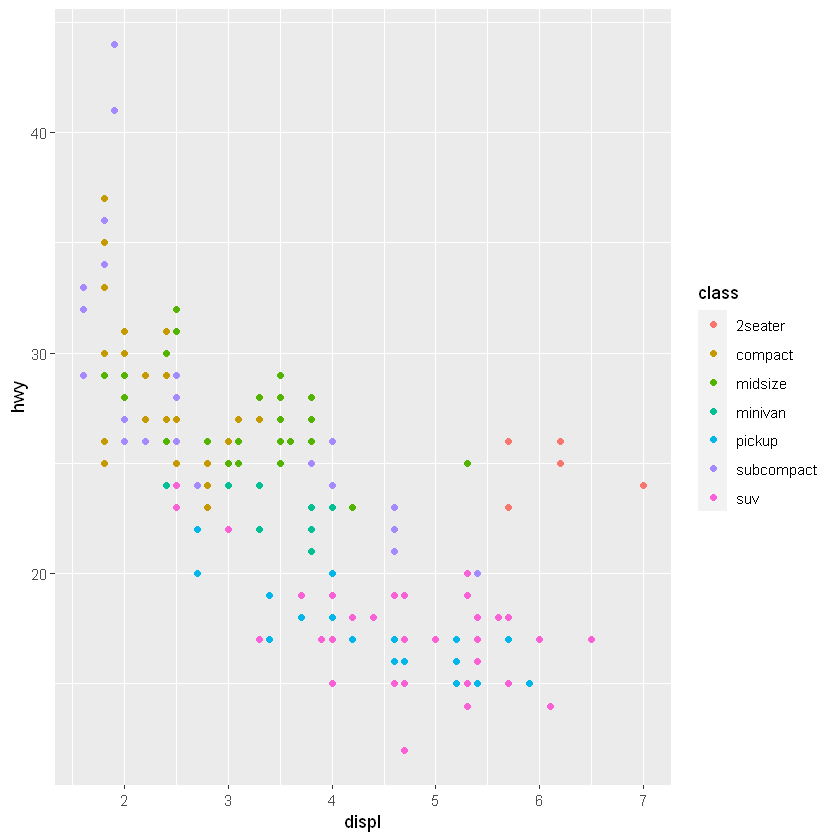

In [15]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, color = class)) # color = class, size = class es para decirle que la variable class es 
                                                                                                #la que va a determinar el color y el tamaño de los puntos
ggsave("myplot.png")

Para asignar una estética a una variable, asocie el nombre de la estética al nombre de la variable dentro de aes (). ggplot2 asignará automáticamente un nivel único de la estética (aquí un color único) a cada valor único de la variable, un proceso conocido como escalamiento. Además de esto añadirá una leyenda de forma que se a sensillo identificar las etiquetas para cada valor.

De vuelta a nuestra pregunta con los puntos anómalos; Los colores revelan que muchos de los puntos inusuales son carros biplaza (de 2 asientos). ¡Estos autos no parecen híbridos, y de hecho son autos deportivos! Los autos deportivos tienen motores grandes como SUV y camionetas, pero cuerpos pequeños como autos medianos y compactos, lo que mejora su consumo de combustible. En retrospectiva, es poco probable que estos autos sean híbridos ya que tienen motores grandes.

En el presente ejemplo podríamos haber mappeado la clase como tamaño:

Warning message:
"Using size for a discrete variable is not advised."


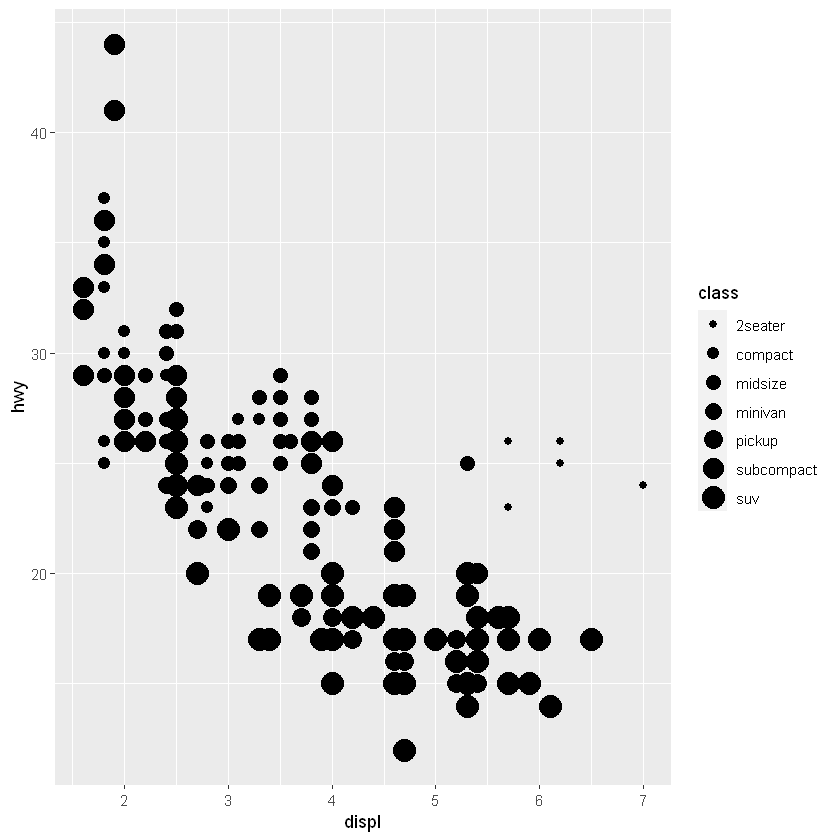

In [17]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, size = class)) # size = class es para decirle que la variable class es 
                                                                                  #la que va a determinar el tamaño de los puntos

Warning message:
"Using size for a discrete variable is not advised."


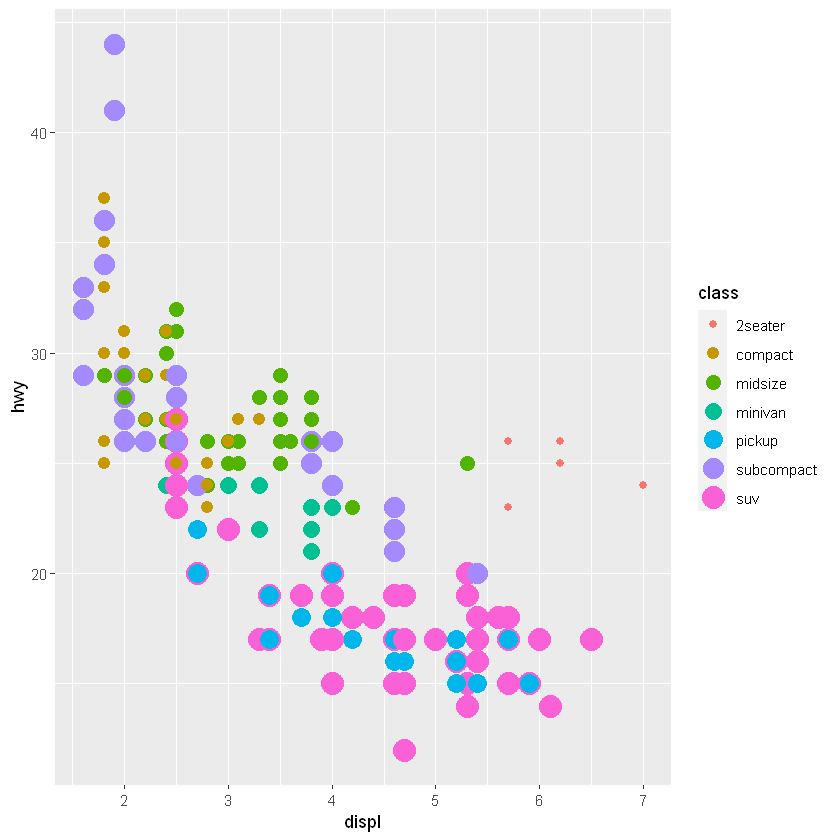

In [18]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, size = class,color=class)) # color = class, size = class es para decirle que la variable class es 
                                                                                                #la que va a determinar el color y el tamaño de los puntos

O Simplemente controlar la transparencia

Warning message:
"Using alpha for a discrete variable is not advised."


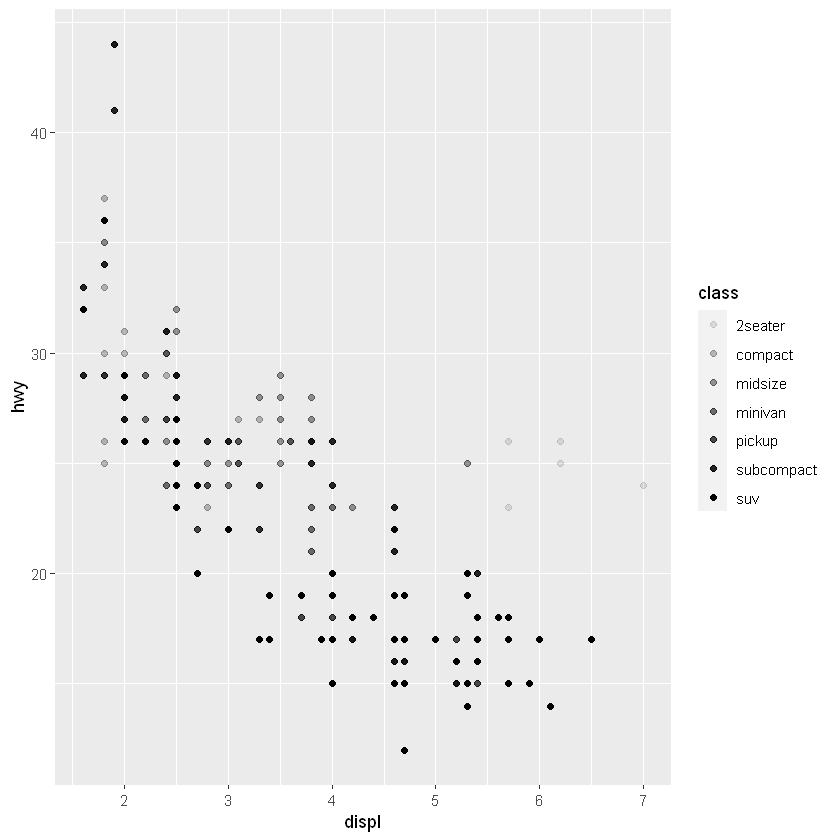

In [19]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, alpha = class)) # alpha para transparencia de los puntos 

O la forma

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 62 rows containing missing values (`geom_point()`)."


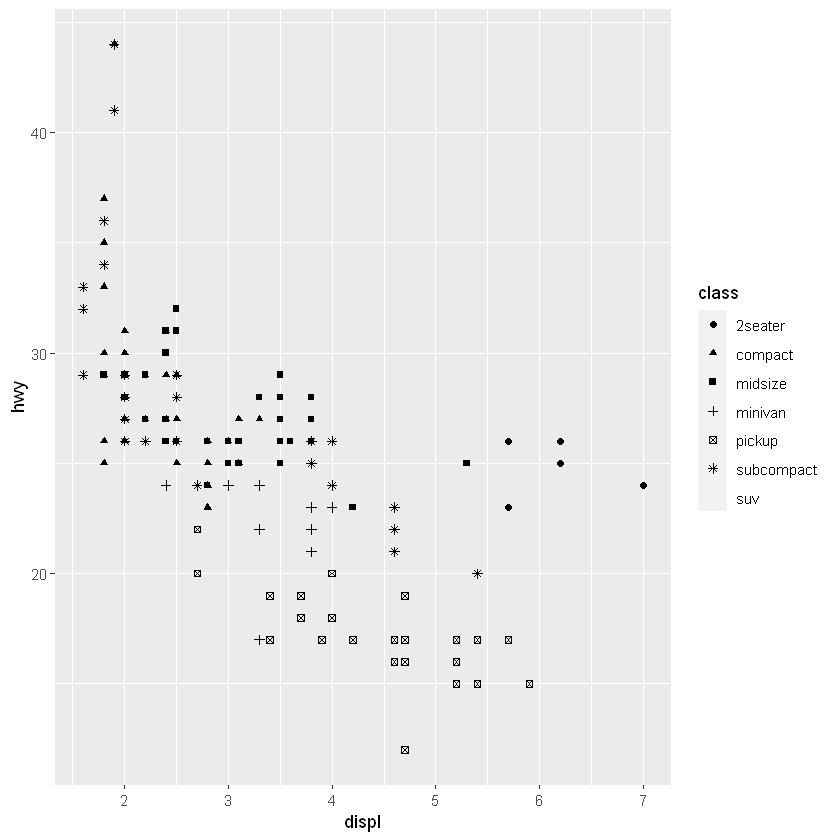

In [26]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, shape = class)) # shape para forma de los puntos

¿Qué ha pasado conlos SUV? resulta que`ggplot2` solo es capaz de diferenciar 6 formas diferentes.

Para cada estética que use, aes () para asociar el nombre de la estética con una variable para mostrar. La función aes () reúne cada una de las asignaciones estéticas utilizadas por una capa y las pasa al argumento de asignación de la capa. La sintaxis resalta una idea útil sobre x e y: las ubicaciones x e y de un punto son en sí mismas estética, propiedades visuales que puede asignar a variables para mostrar información sobre los datos. 

Podríamos pasarle una estéticadirectamente a mapping en lugar de a aes

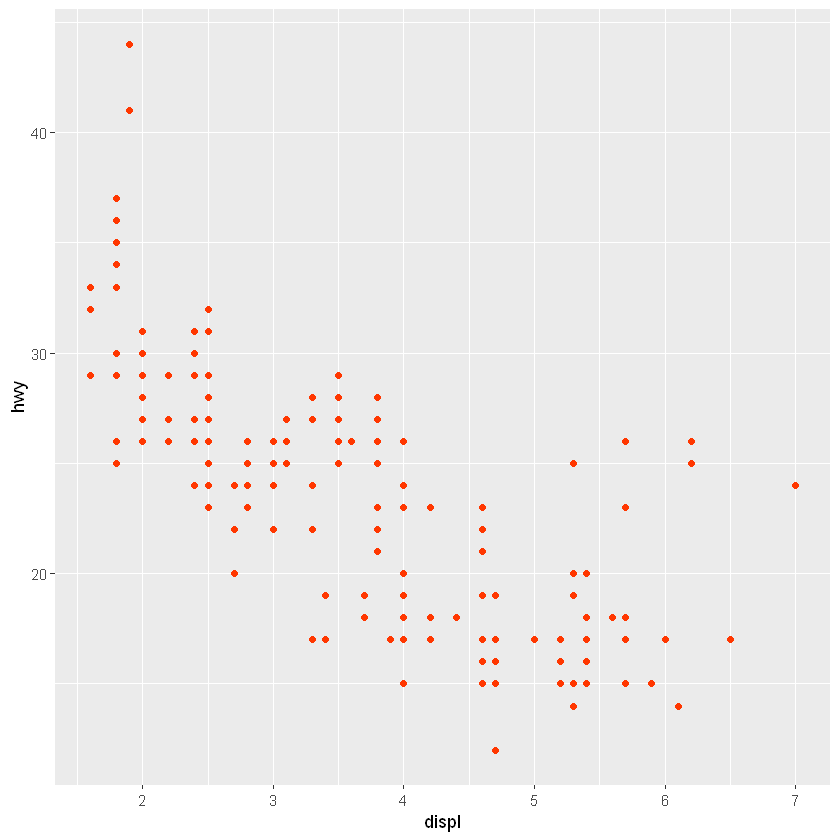

In [29]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy), color = "#ff3700")

### **Ejercicio**

¿Qué cree usted que hay de malo con el siguiente código? ¿Cómo podríamos cambiar el código paragraficar los puntos en diferentes tipos de azules segun la clase de auto?

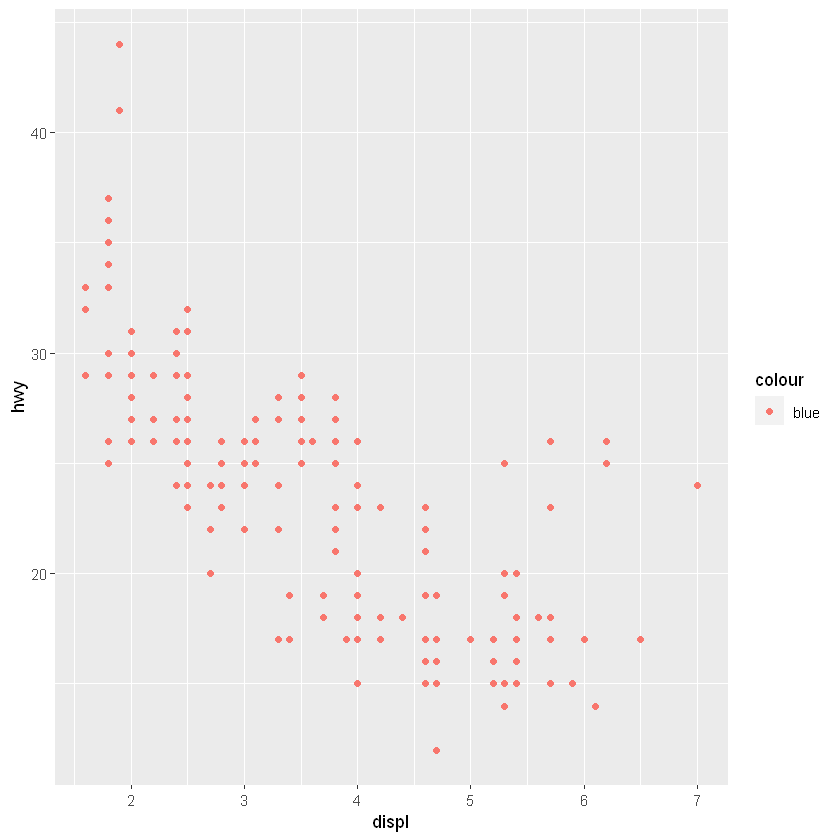

In [16]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

In [30]:
# ?mpg

In [31]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### **Ejercicio**
Asigne una variable continua a color, tamaño y forma. ¿Cómo se comporta esta estética de manera diferente para las variables categóricas ?

Warning message:
"Using size for a discrete variable is not advised."


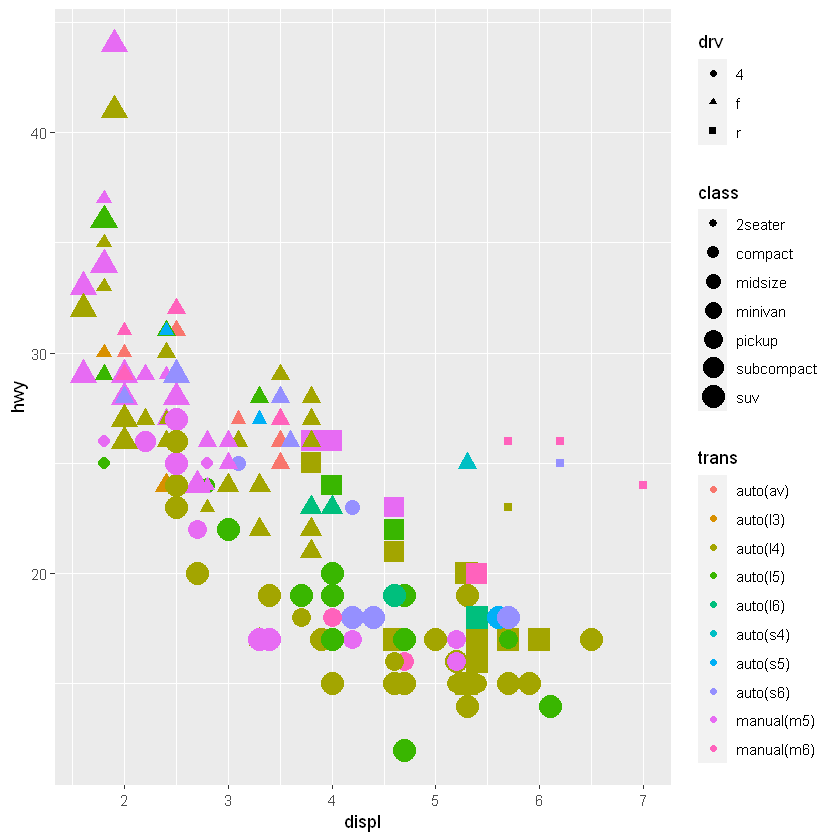

In [ ]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = trans, size = class, shape = drv))

###**Ejercicio (opcional)**

Si tiene R Studio, intente hacer el ejercicio anterior pero ahora las estéticas asígnelas a variables continuas. ¿Qué dierencias encuentra entre hacerlo con variables continuas y categórigas?

# **Facets, los subplots de R**

Hemos visto cómo se construyen las gráficas según la información dataframe teniendo en cuenta 3 varaibles ¿pero que pasa si necesitamos varios subplos o deseamos una vista independiete? Para eso están las Facets que podemos usar con [`facet_wrap`](https://ggplot2.tidyverse.org/reference/facet_wrap.html) y [`facet_grid`](https://ggplot2.tidyverse.org/reference/facet_grid.html)

```r
facet_wrap(
  facets,
  nrow = NULL,
  ncol = NULL,
  scales = "fixed",
  shrink = TRUE,
  labeller = "label_value",
  as.table = TRUE,
  switch = NULL,
  drop = TRUE,
  dir = "h",
  strip.position = "top"
)

facet_grid(
  rows = NULL,
  cols = NULL,
  scales = "fixed",
  space = "fixed",
  shrink = TRUE,
  labeller = "label_value",
  as.table = TRUE,
  switch = NULL,
  drop = TRUE,
  margins = FALSE,
  facets = NULL
)
```

In [36]:
 #Vamos organizar nuestra gráficas con un ancho y alto defino para que se más adecuadas
options(repr.plot.width = 15, repr.plot.height = 7)

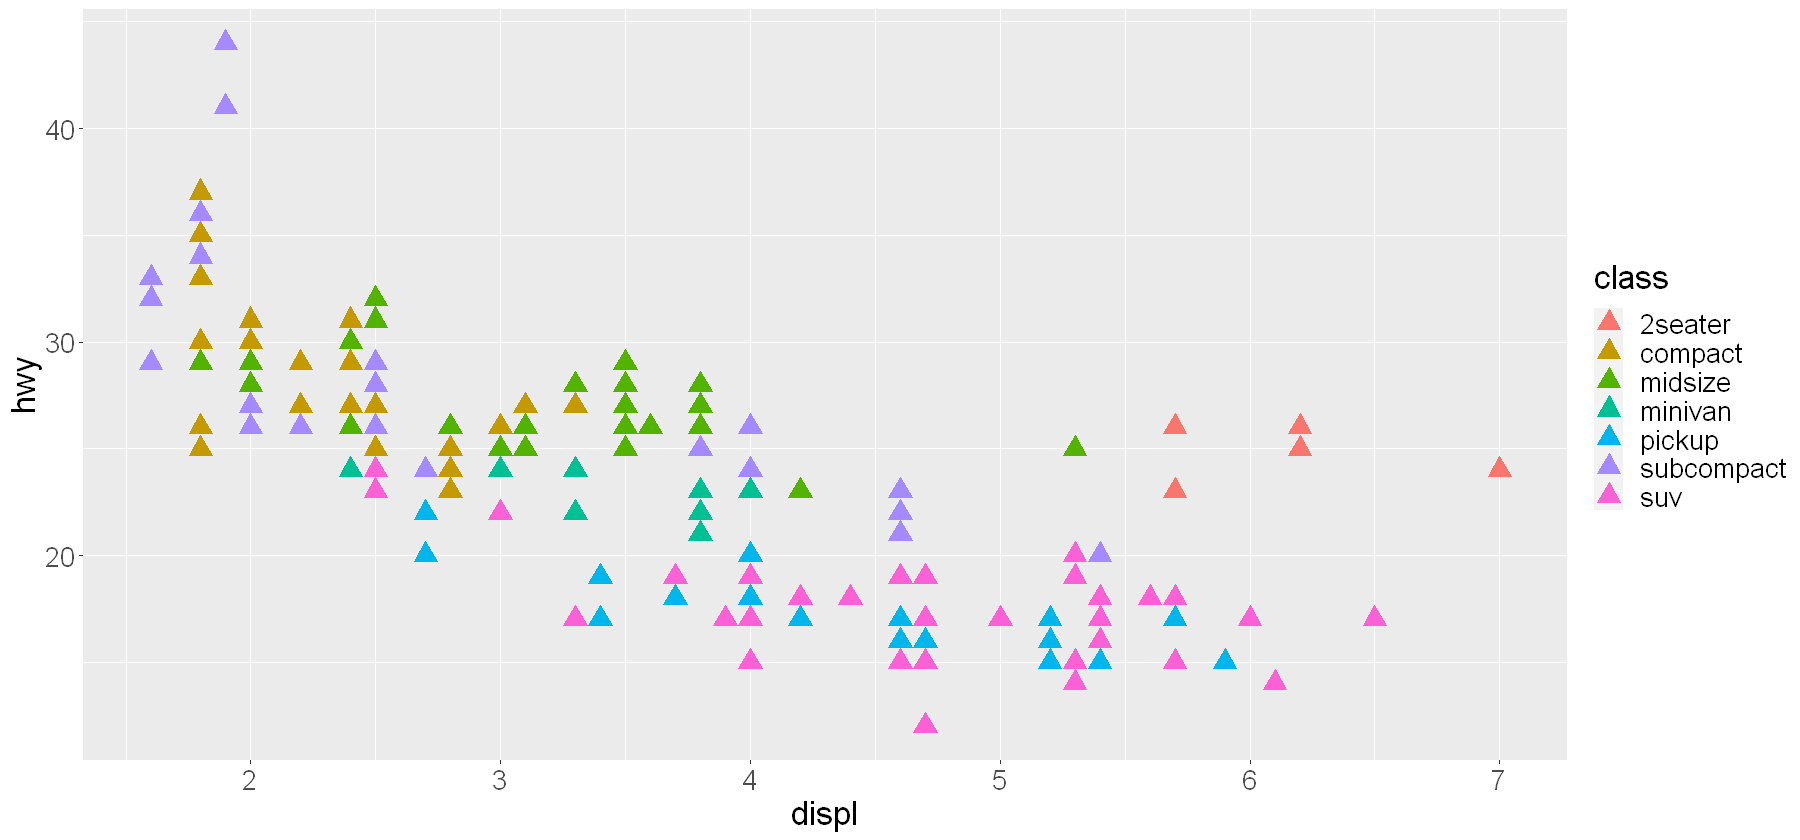

In [37]:
#Hasta ahora hemos hecho gráficas de este estilo. 
#La función theme() nos permite modificar algunas cosas sobre el texto. 
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=class),size = 5, shape=17) + # shape=17 es para que los puntos sean triangulos, 
                                                                                  #size=5 es para que los puntos sean mas grandes
  theme(text = element_text(size=20)) # element_text(size=20) es para cambiar el tamaño de la letra. theme() es para cambiar el tema de la grafica

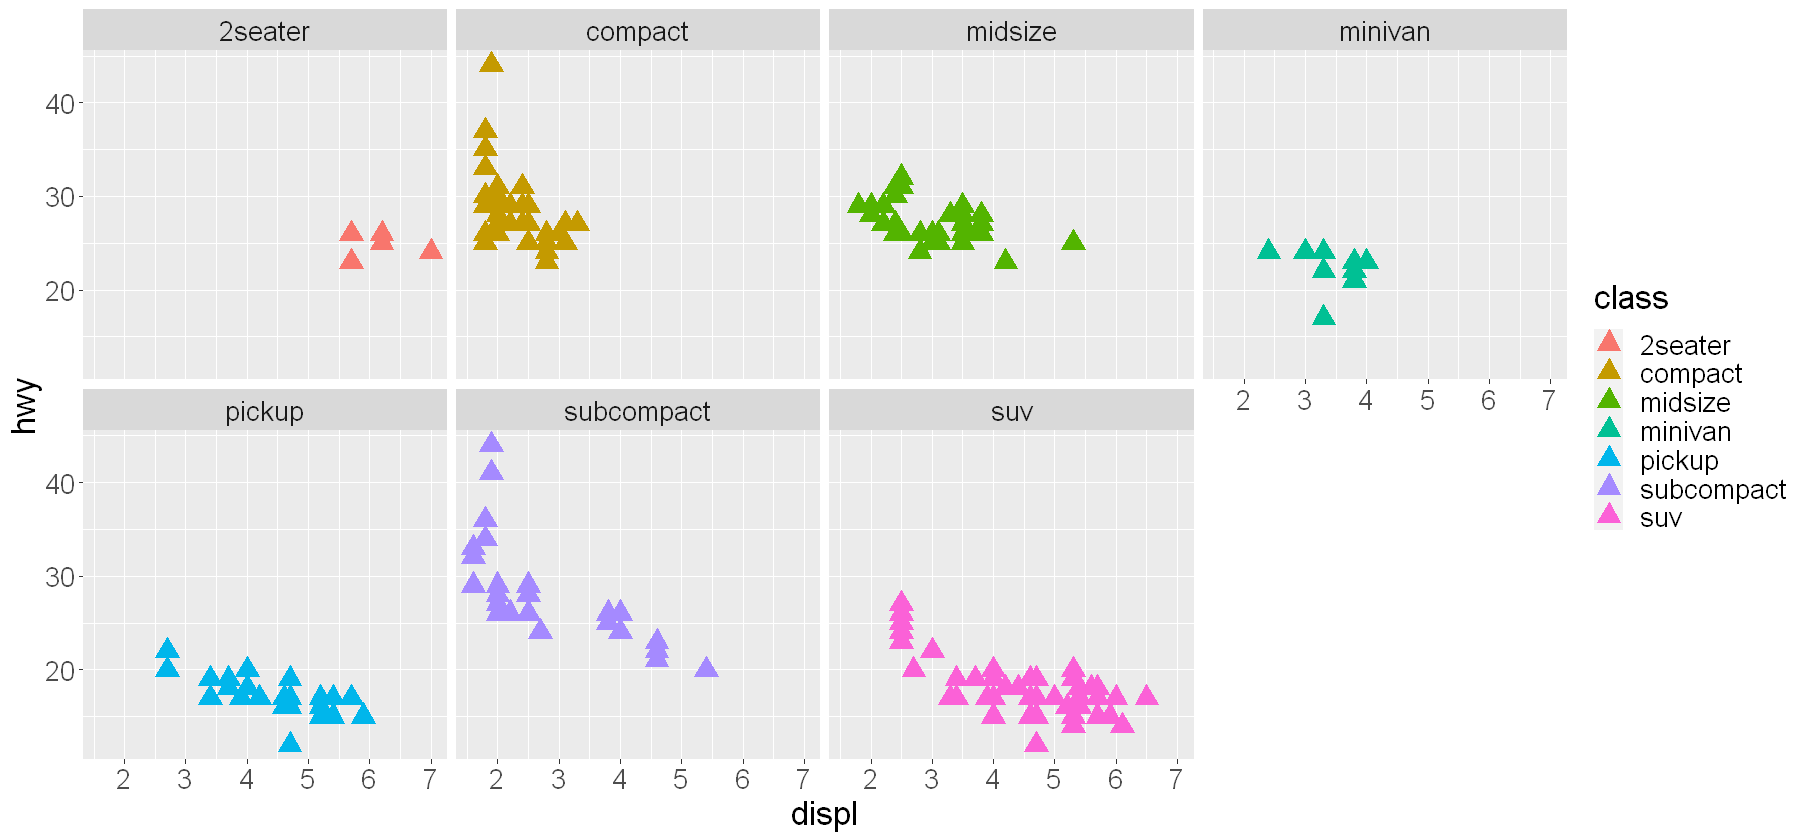

In [38]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=class),shape=17,size=5) +  # shape=17 es para que los puntos sean triangulos, 
                                                                                  #size=5 es para que los puntos sean mas grandes
  facet_wrap(~ class, nrow = 2)+ # facet_wrap() es para hacer subplots, nrow = 2 es para decirle que queremos 2 filas de subplots,
                                # ~ class es para decirle que queremos que los subplots sean de acuerdo a la variable class.
  theme(text = element_text(size=20)) # element_text(size=20) es para cambiar el tamaño de la letra. theme() es para cambiar el tema de la grafica

Es posible que deseemos algo un poco más complejo con no 3 sino 4 variables, imaginemos que tenemos en un sólo gráfica algo del tipo:

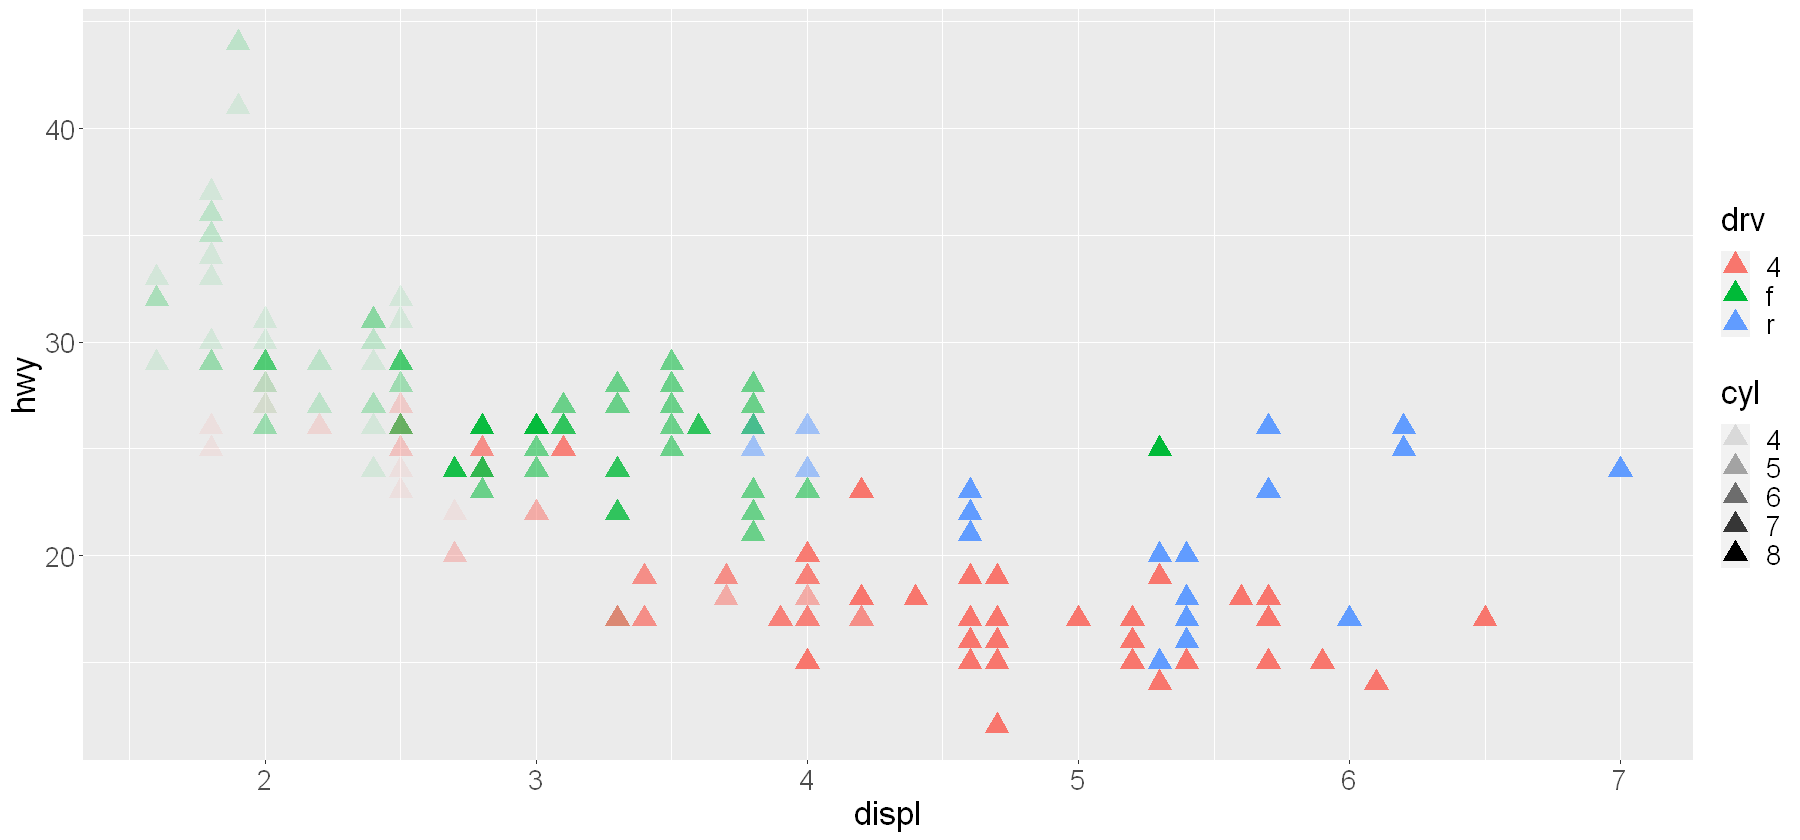

In [39]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=drv, alpha =cyl), size = 5, shape=17) +
  theme(text = element_text(size=20))

Podemos obtar por una grid que relacione la dos variables una contra la otra

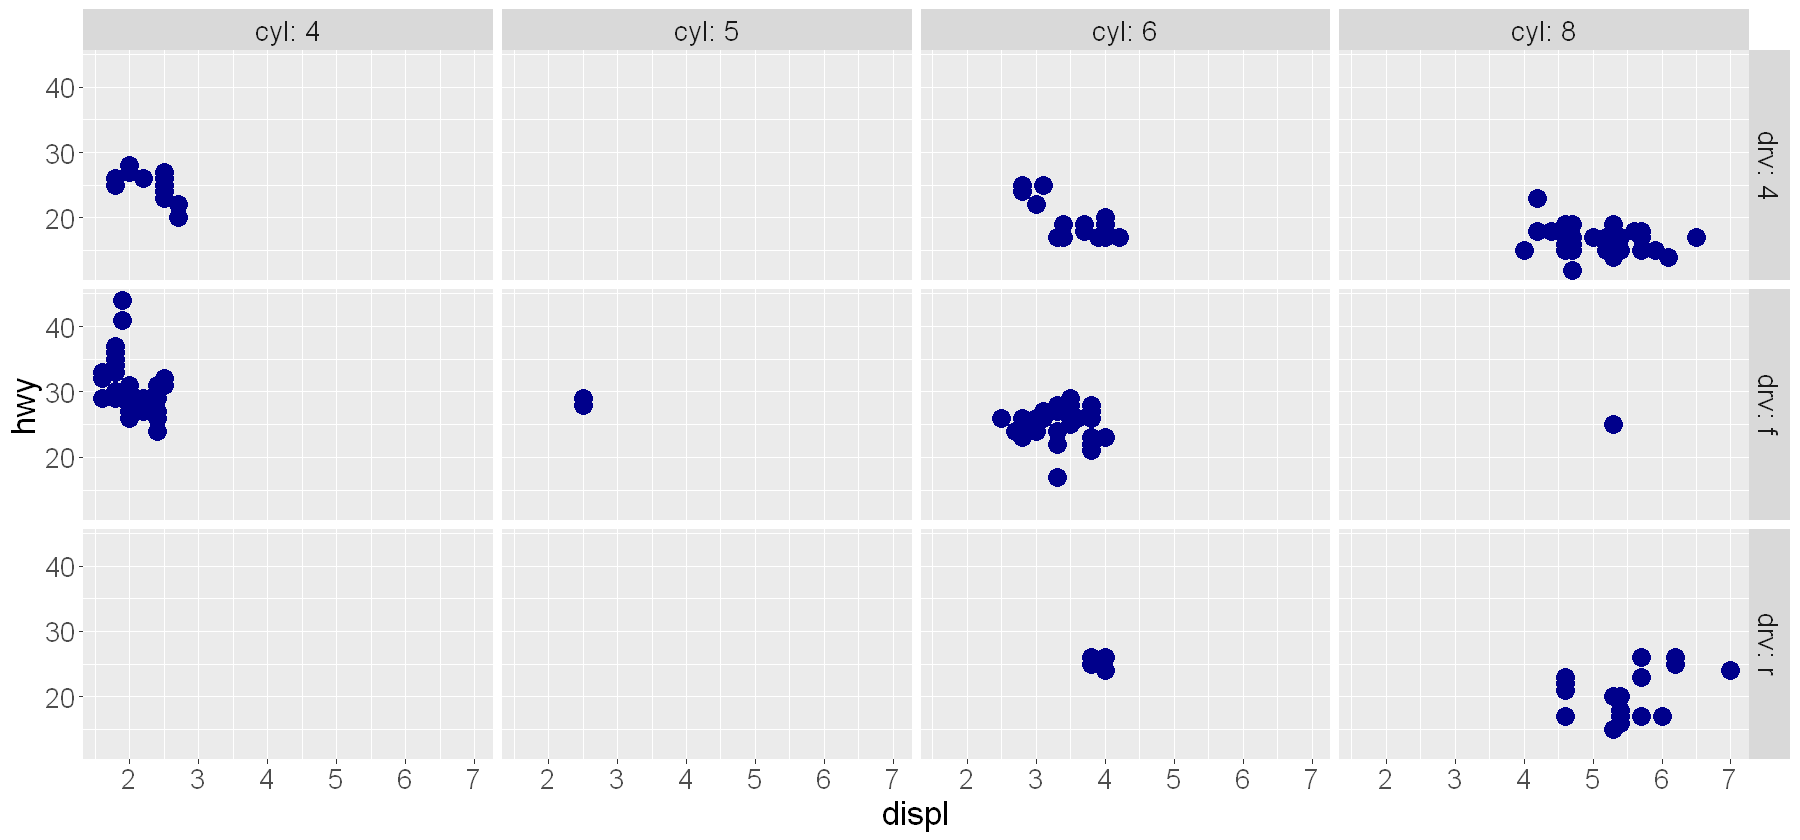

In [40]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy),color='darkblue',size = 5, shape=16) + 
  facet_grid(drv ~ cyl,labeller = label_both) + # facet_grid() es para hacer subplots, labeller = label_both es para que los subplots tengan nombre 
                                                #de acuerdo a las variables drv y cyl
  theme(text = element_text(size=20))

In [41]:
drv.labs <- c(
  "4" = "label1",
  "r" = "label2",
  "f" = "label3")  # drv.labs es para cambiar el nombre de las variables drv y cyl en los subplots 

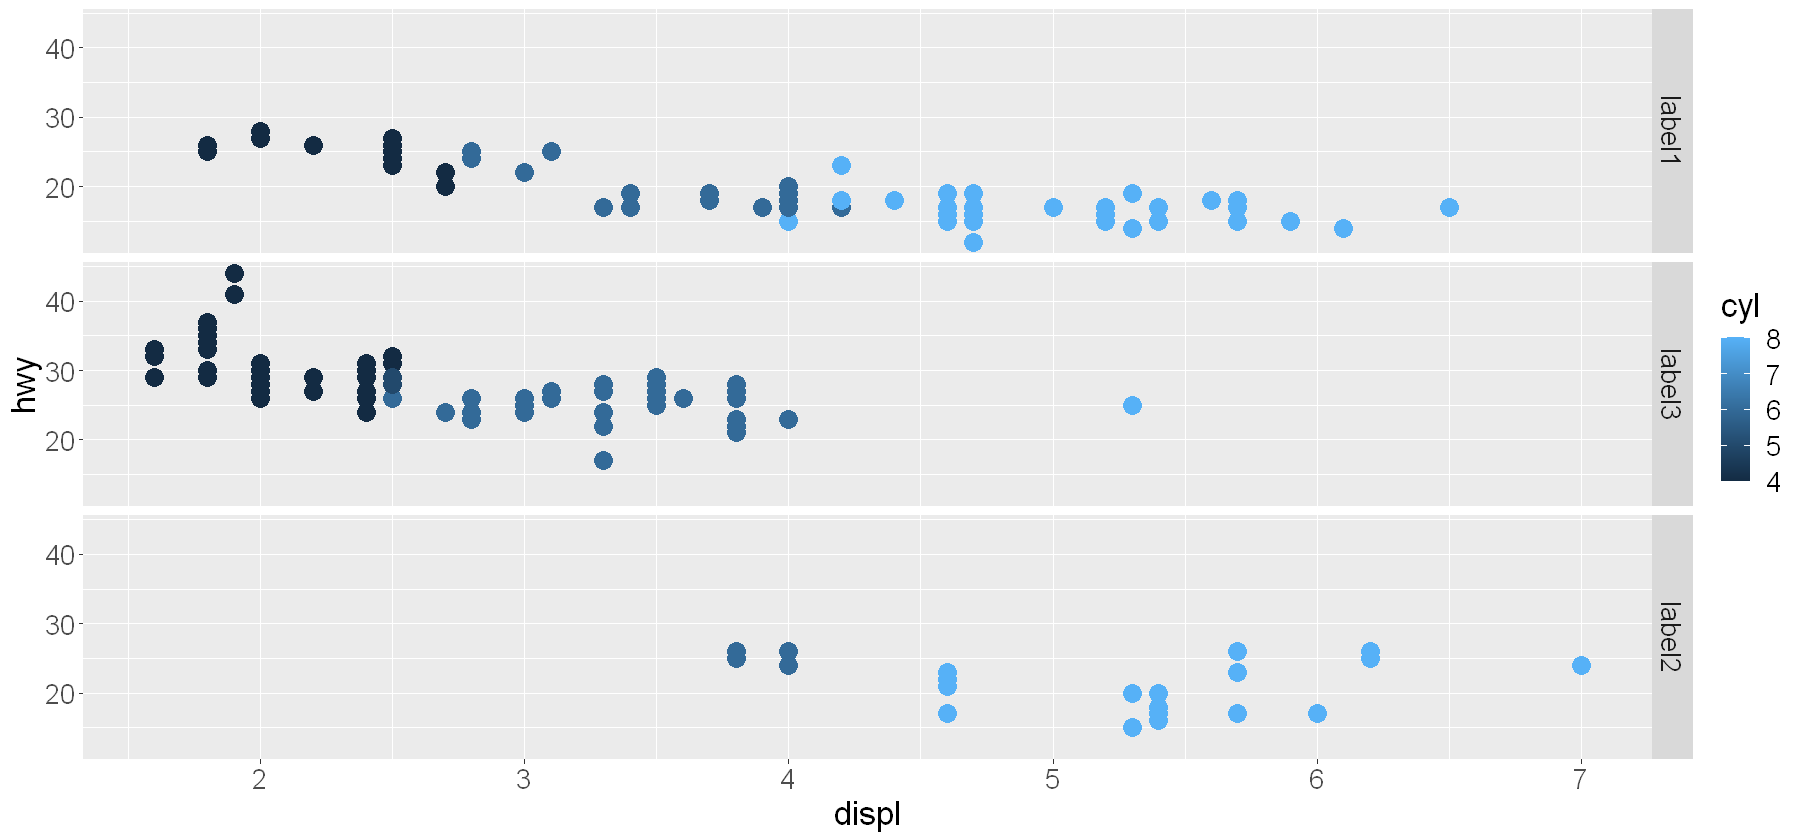

In [42]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=cyl),size = 5, shape=16) + # shape=16 es para que los puntos sean cuadrados 
  facet_grid(drv ~ ., labeller = labeller(drv = drv.labs)) + # facet_grid() es para hacer subplots, labeller = labeller(drv = drv.labs) 
                                                # es para que los subplots tengan nombre de acuerdo a las variables drv y cyl
  theme(text = element_text(size=20)) # element_text(size=20) es para cambiar el tamaño de la letra. theme() es para cambiar el tema de la grafica

## Ejercicios de Facets

El conjunto de datos de Iris es pequeño, es un conjunto de datos sobre los sépalos y pétalos para varias especies de flores.

In [43]:
#Usemos otro conjunto de datos
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### Ejercicio 1

 En este caso haremos una grafica sobre la longitud vs ancho de los pétalos para cada especie. Utilice un color para cada subfigura pero el mismo marcador, cambie por valores númericos o simbolos. Cambie el label de las especies, haciendo que la primera letra esté en mayúscula.    

In [45]:
#@title Solución **aquí**

if (F) {
uniqueSpecies = as.vector(unique(iris$Species))
Species.labs = capitalize(uniqueSpecies )
names(Species.labs) = uniqueSpecies 
ggplot(data = iris) + 
  geom_point(mapping = aes(x = Petal.Width, y = Petal.Length, color=Species),shape=11,size=5) + 
  facet_wrap(~ Species,labeller=labeller(Species = Species.labs))+
  theme(text = element_text(size=20))
}

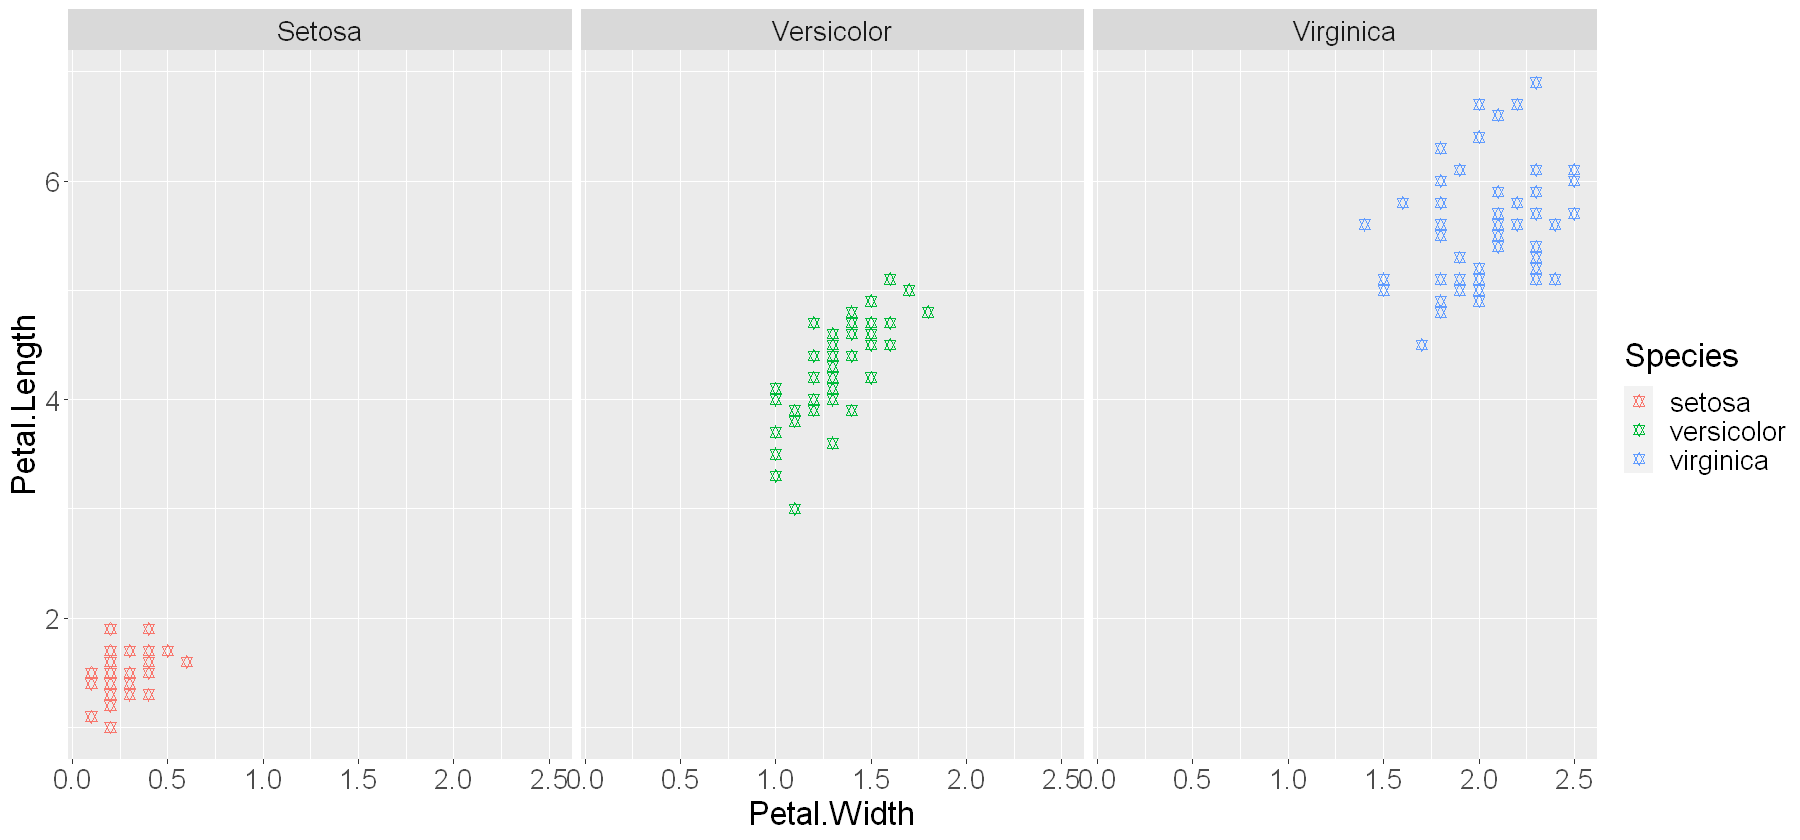

In [46]:
uniqueSpecies = as.vector(unique(iris$Species)) # uniqueSpecies es para obtener los nombres de las especies de iris 
Species.labs = capitalize(uniqueSpecies ) # Species.labs es para cambiar la primera letra de cada nombre de especie a mayuscula
names(Species.labs) = uniqueSpecies # names(Species.labs) = uniqueSpecies es para que los nombres de las especies sean los nombres de Species.labs

ggplot(data = iris) + 
  geom_point(mapping = aes(x = Petal.Width, y = Petal.Length, color=Species),shape=11,size=2) + # shape=11 es para que los puntos sean circulos
                                                                                                # size=5 es para que los puntos sean mas grandes
  facet_wrap(~ Species,labeller=labeller(Species = Species.labs))+ # facet_wrap() es para hacer subplots, labeller=labeller(Species = Species.labs) 
                                                # es para que los subplots tengan nombre de acuerdo a las variables Species
  theme(text = element_text(size=20)) # element_text(size=20) es para cambiar el tamaño de la letra. theme() es para cambiar el tema de la grafica

### Ejercicio 2

Haremos un grid sobre la longitud y el ancho de los sépalos para un intervalo de la longitud de los petalos (`iris_new`) y la especie. Asegurese que el color distinga Petal.Width y que el label sea `label_both`


In [48]:
iris_new <- iris %>%  # asignamos a iris_new el dataframe iris con una nueva columna llamada intPL que es la variable Petal.Length cortada en 4 partes 
mutate(intPL = cut(Petal.Length ,breaks = 4)) %>%  # cut(Petal.Length ,breaks = 4) es para cortar la variable Petal.Length en 4 partes 
group_by(intPL)#%>% 

In [22]:
#@title Solución **aquí**
if (F){
ggplot(data = iris_new) + 
  geom_point(mapping = aes(x = Sepal.Width, y = Sepal.Length,color =Petal.Width),shape=16,size=5) + 
  facet_grid( Species ~ intPL,labeller=label_both)+
  theme(text = element_text(size=20))}

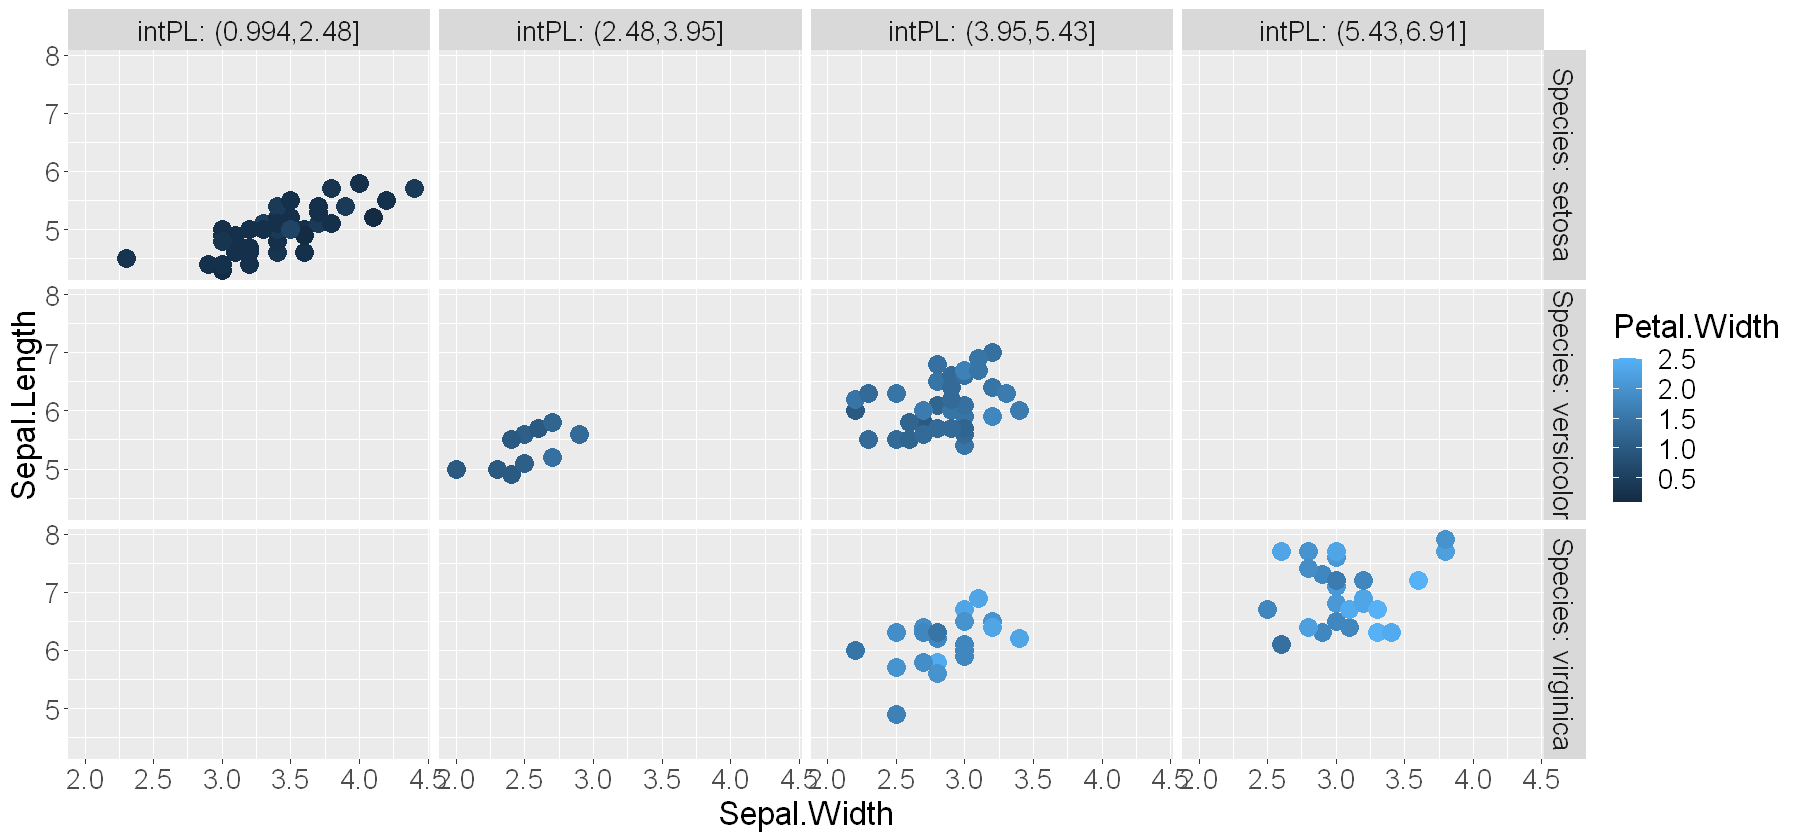

In [49]:
ggplot(data = iris_new) + 
  geom_point(mapping = aes(x = Sepal.Width, y = Sepal.Length,color =Petal.Width),shape=16,size=5) +  # shape=16 es para que los puntos sean cuadrados
                                                                                                # size=5 es para que los puntos sean mas grandes
  facet_grid( Species ~ intPL,labeller=label_both)+ # facet_grid() es para hacer subplots, labeller=label_both es para que los subplots tengan nombre 
                                                #de acuerdo a las variables Species e intPL
  theme(text = element_text(size=20)) # element_text(size=20) es para cambiar el tamaño de la letra. theme() es para cambiar el tema de la grafica

### Ejercicio 3

Hagamos un wrap pero usando [`vars`](https://ggplot2.tidyverse.org/reference/vars.html) con `iris_new`

In [23]:
#@title Solución **aquí**
if (F){
ggplot(data = iris_new) + 
  geom_point(mapping = aes(x = Sepal.Width, y = Sepal.Length,color =Petal.Width),shape=16,size=5) + 
  facet_wrap( vars(Species,intPL)) +
  theme(text = element_text(size=20))
}

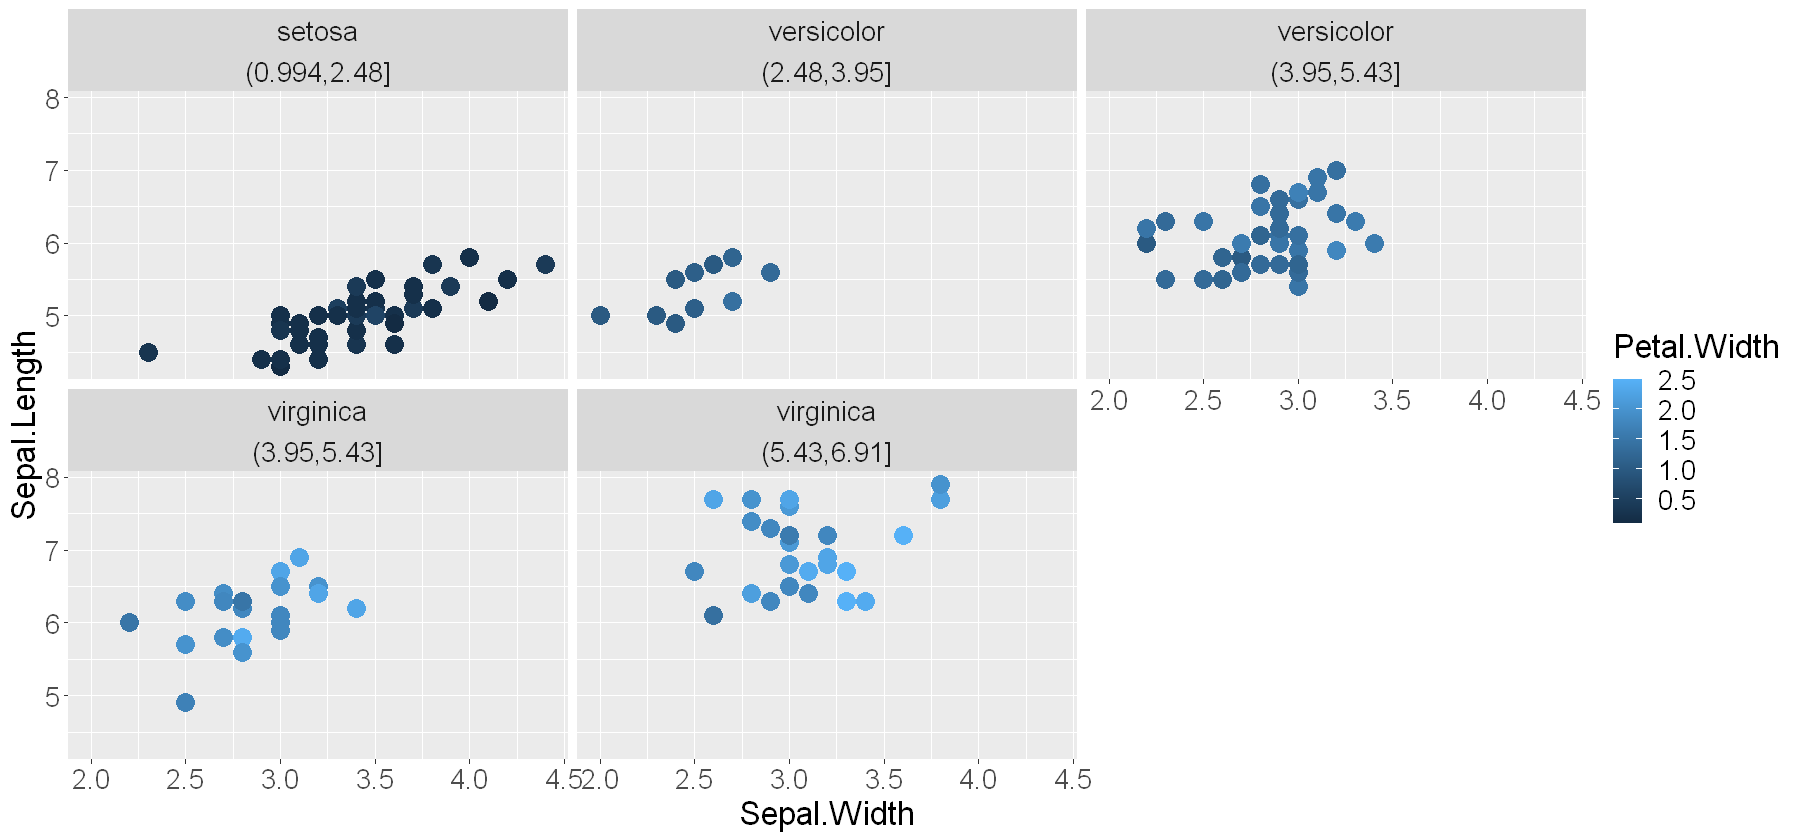

In [50]:
ggplot(data = iris_new) + 
  geom_point(mapping = aes(x = Sepal.Width, y = Sepal.Length,color =Petal.Width),shape=16,size=5) + # shape=16 es para que los puntos sean cuadrados
                                                                                                # size=5 es para que los puntos sean mas grandes
  facet_wrap( vars(Species,intPL)) + # facet_wrap() es para hacer subplots, vars(Species,intPL) es para que los subplots sean de acuerdo a las variables Species e intPL
  theme(text = element_text(size=20)) # element_text(size=20) es para cambiar el tamaño de la letra. theme() es para cambiar el tema de la grafica

# **Objetos Geom** 

Hemos hecho varios ejercicios en donde agregamos a nuestro "fondo" los datos en forma de puntos o líneas, ¿pero que son estos objetos `geom()`?

Un `geom()` es el objeto geométrico que una trama usa para representar datos.  Por ejemplo, los gráficos de barras usan geoms de barra, los gráficos de líneas usan geoms de línea, los gráficos de caja usan geoms de diagrama de caja, etc.  

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


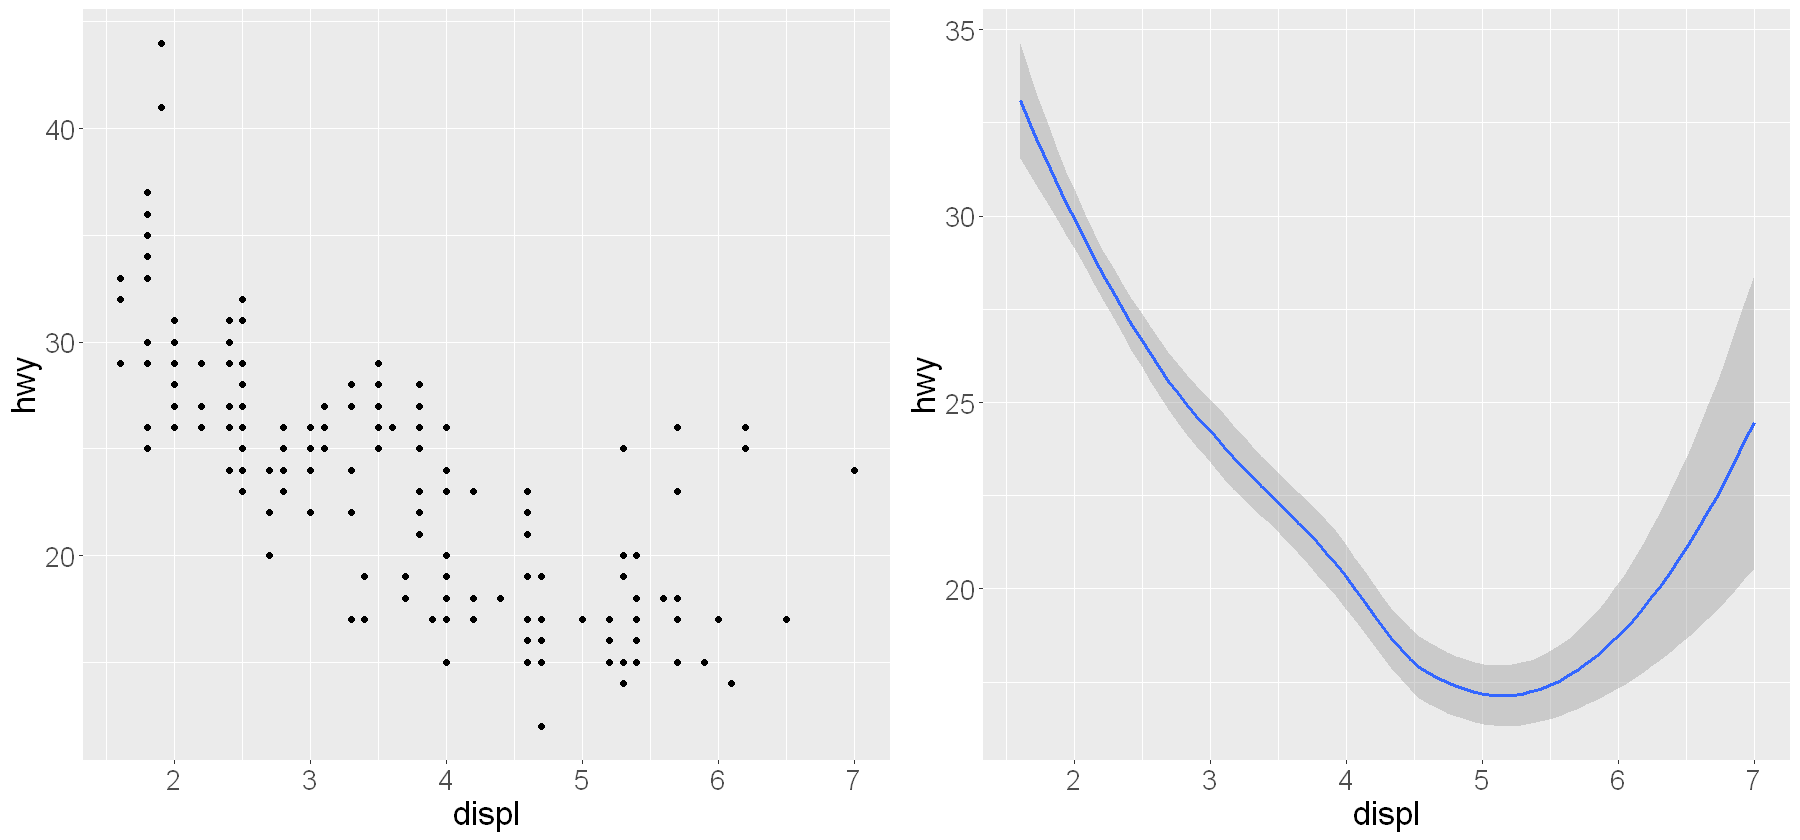

In [51]:
require(gridExtra) # gridExtra es para poner dos graficas en una misma figura
left <- ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + # geom_point() es para hacer un scatterplot 
  theme(text = element_text(size=20)) 
right <-
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy)) + # geom_smooth() es para hacer una linea de regresion 
  theme(text = element_text(size=20))

gridExtra::grid.arrange(left,right, ncol=2) # grid.arrange() es para poner dos graficas en una misma figura, 
                                            # ncol=2 es para decirle que queremos 2 columnas de graficas

Los objetos [`geom()`](https://ggplot2.tidyverse.org/reference/index.html#section-layer-geoms) Siguen más o menos los mismos principios de estétetica, escalas, subfiguras, temas y sistemas coordenados, auunque pueden trabajar de forma diferente. Por ejemplo se puede establecer la forma de un punto (marker) en `geom_point` pero no se puede establecer la forma de una línea, en cambio en `geom_smooth` sí.




## Geom_smooth

En este caso podemos observar un comportamiento suavizado por una media movil y un intervalo de confianza. Es un gráfica bien usada dentro de la estadística descriptiva. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


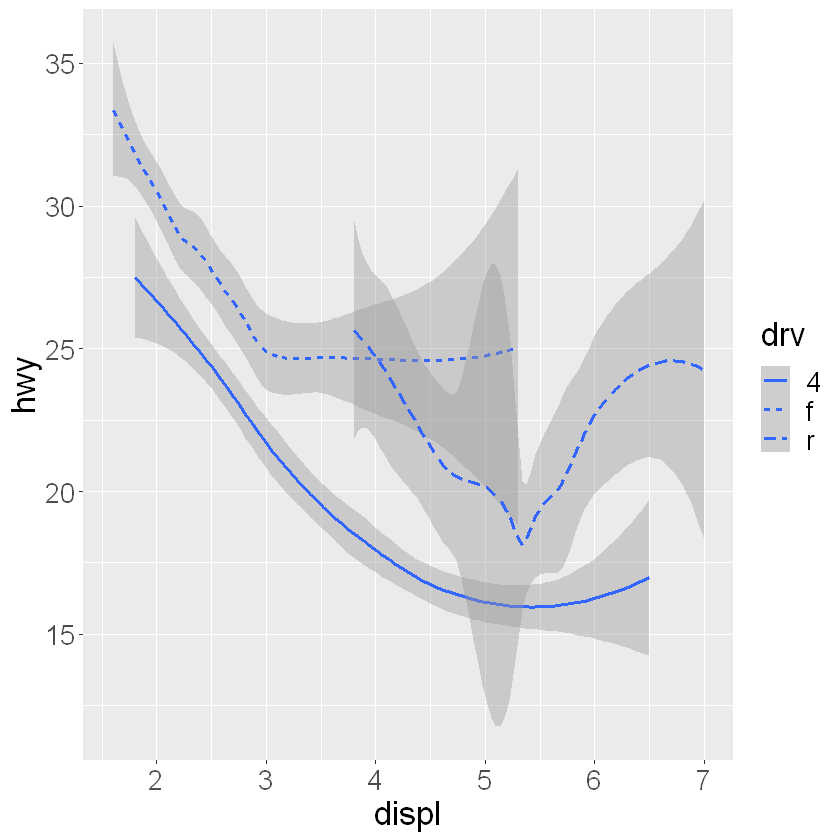

In [25]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))+ # geom_smooth() es para hacer una linea de regresion, 
                                                                  # linetype = drv es para decirle que la variable drv es la que va a determinar el tipo de linea
  theme(text = element_text(size=20))

Por supuesto podemos trabajar varios `geom()` juntos según los requerimientos tales que queden apilados en la misma gráfica (en diferentes capas):

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


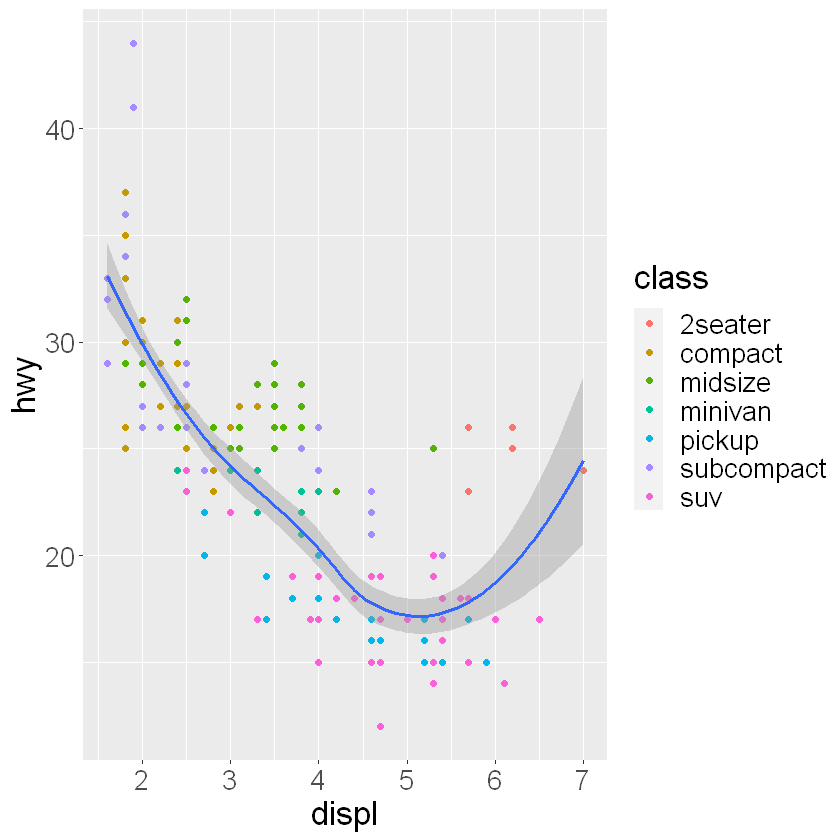

In [26]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + # mapping = aes(x = displ, y = hwy) indica que todo se va a graficar son displ y hwy.
  geom_point(mapping = aes(color = class)) + # geom_point() es para hacer un scatterplot, color = class es para decirle que la variable class es 
                                            #la que va a determinar el color de los puntos
  geom_smooth() + # geom_smooth() es para hacer una linea de regresion 
  theme(text = element_text(size=20)) 

## Geom_bar

Otro `geom()` importante son los gráficos de barras, que son similares a los de python. En conjunto de datos `diamonds` contiene información de damantes, incluyendo precios, color, corte y otras carcaterísticas importantes: 

In [27]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


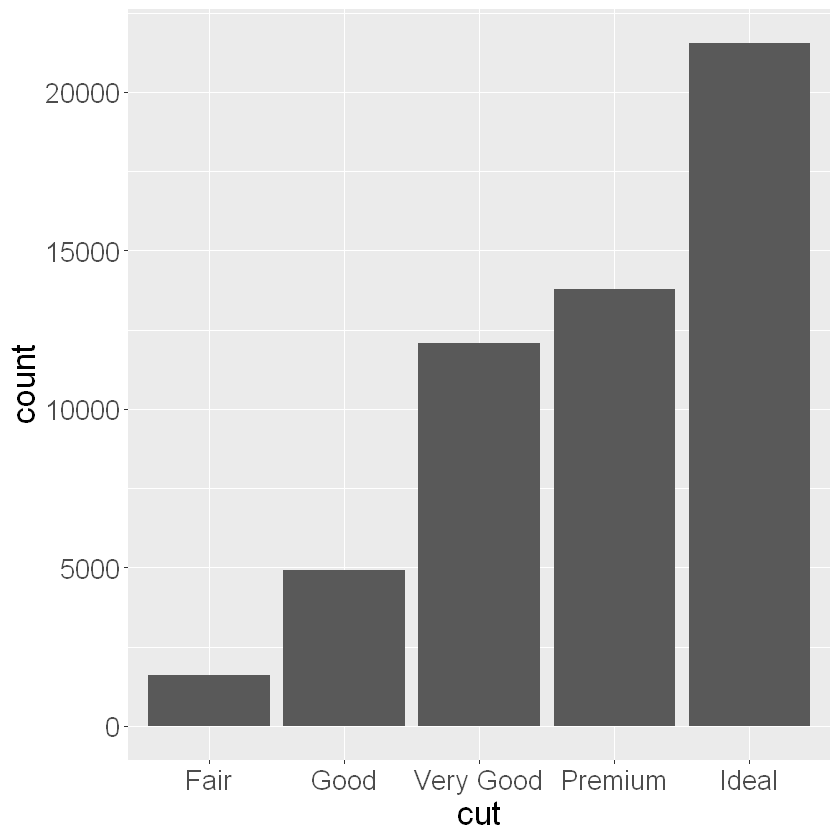

In [28]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut)) + # geom_bar() es para hacer un histograma, x = cut es para decirle que la variable cut es la que va a determinar el histograma
  theme(text = element_text(size=20))

En este caso la "variable y" no es necesaria, los gricos de barras tienen de mostrarnos porcentajes, densidades o cantidades por lo tanto no es necesario un eje y. El `geom_bar()` cuenta con `stat_count()`

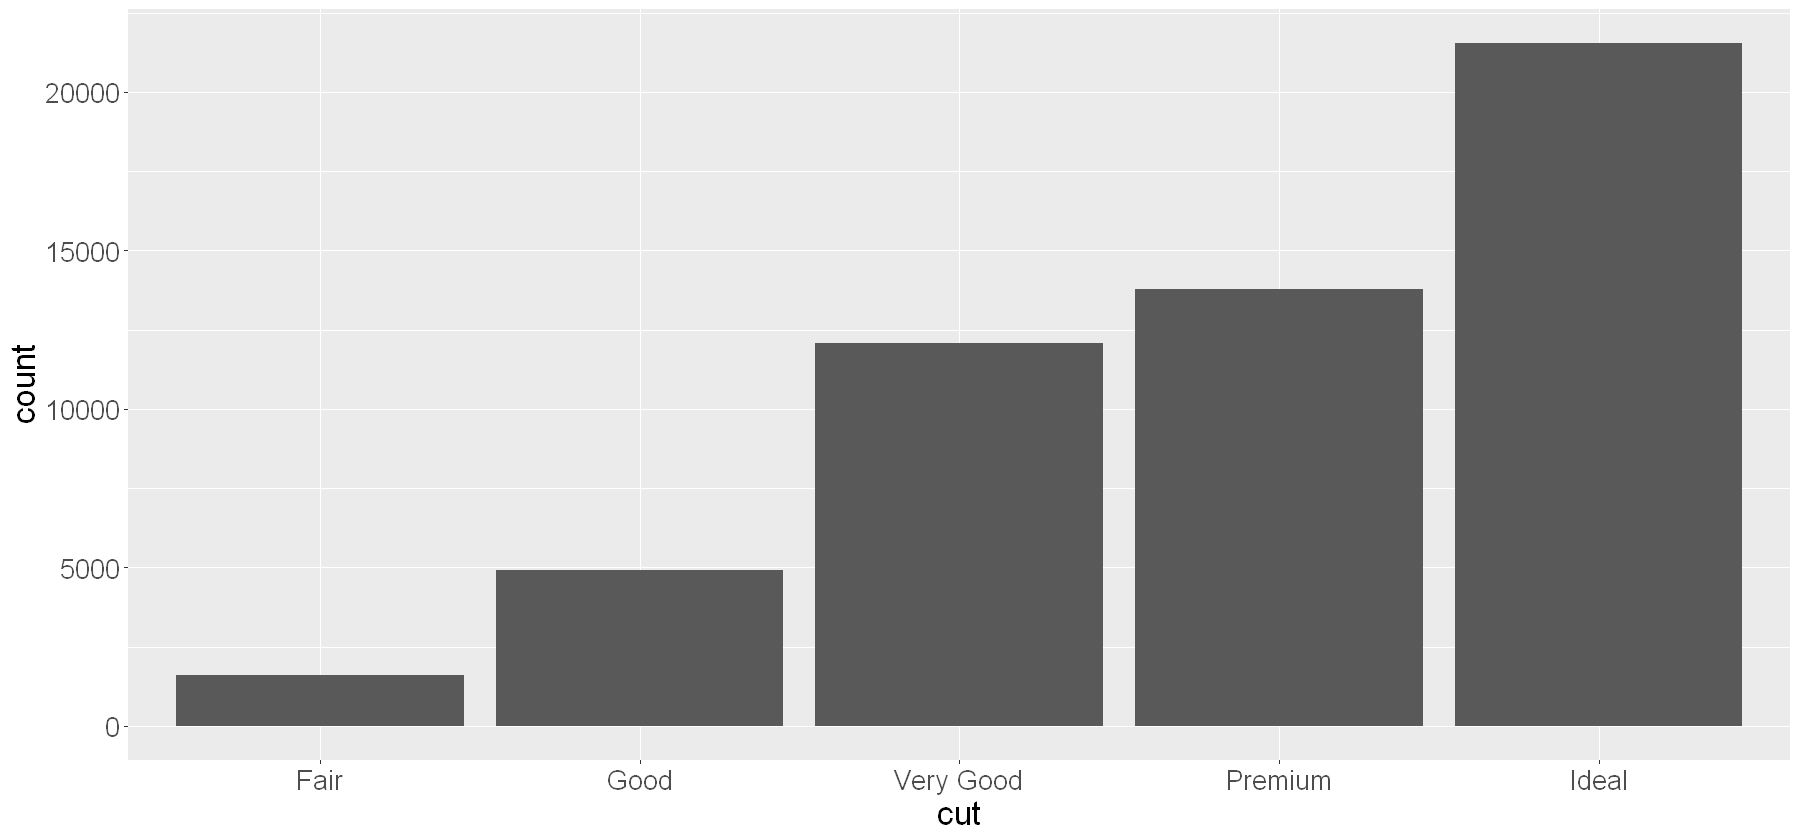

In [52]:
ggplot(data = diamonds) + 
  stat_count(mapping = aes(x = cut))  + # stat_count() es para hacer un histograma, 
                                        # x = cut es para decirle que la variable cut es la que va a determinar el histograma
  theme(text = element_text(size=20))

Las funciones de `stats()` tienden a ser indistitnas de su pareja `geom()`. Si quiere hacer un gráfico de barras con proporciones, en vez de cantidades, puede usar `stat(prop)` en función de un grupo de datos (puede ser el #1)

Warning message:
"`stat(prop)` was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(prop)` instead."


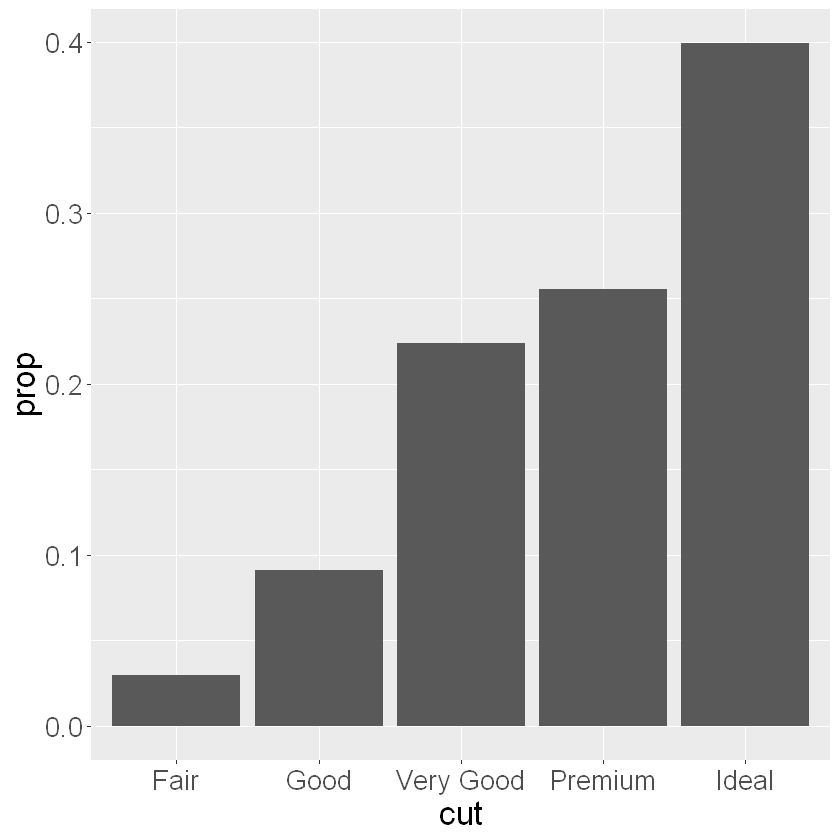

In [30]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = stat(prop), group = 1)) + # geom_bar() es para hacer un histograma, 
                                                                # x = cut es para decirle que la variable cut es la que va a determinar el histograma
                                                                # y = stat(prop) es para decirle que la variable prop es la que va a determinar la altura de las barras
                                                                # stat significa que se va a hacer una estadistica, en este caso la estadistica es prop
                                                                # group = 1 es para decirle que todas las barras pertenecen al mismo grupo
  theme(text = element_text(size=20))

Otras opciones para mostrar datos de forma estadíticas son los histogramas o las líneas (tipo velas sencillas sólo max y min):

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


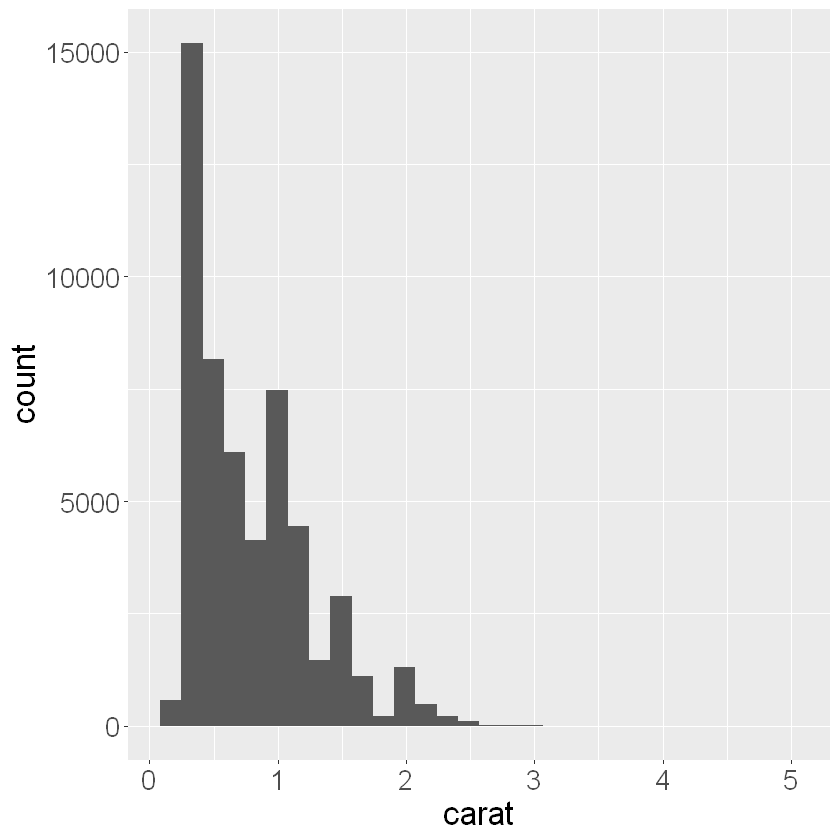

In [31]:
ggplot(diamonds, aes(carat)) + # aes(carat) es para decirle que todo se va a graficar son carat.
  geom_histogram() +# geom_histogram() es para hacer un histograma
  theme(text = element_text(size=20)) 

Warning message:
"The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead."
Warning message:
"The `fun.ymin` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.min` argument instead."
Warning message:
"The `fun.ymax` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun.max` argument instead."


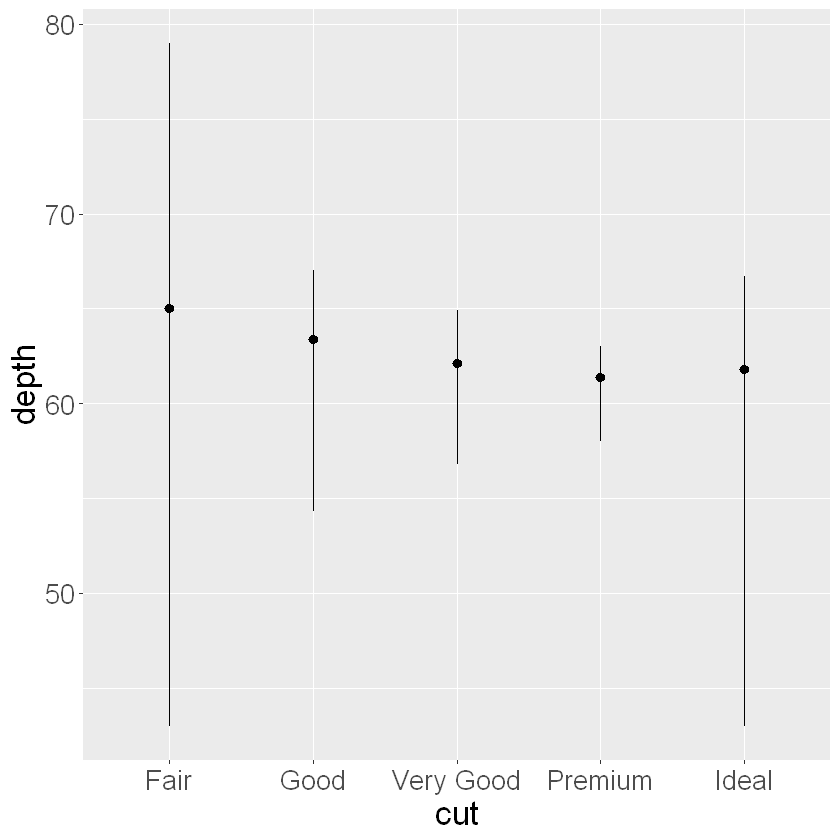

In [32]:
ggplot(data = diamonds) + 
  stat_summary( # stat_summary() es para hacer un histograma, 
    mapping = aes(x = cut, y = depth), # x = cut es para decirle que la variable cut es la que va a determinar el histograma
                                      # y = depth es para decirle que la variable depth es la que va a determinar la altura de las barras
    fun.ymin = min, # fun.ymin = min es para decirle que la altura minima de las barras es el minimo de la variable depth 
    fun.ymax = max, # fun.ymax = max es para decirle que la altura maxima de las barras es el maximo de la variable depth
    fun.y = median # fun.y = median es para decirle que la altura de las barras es la mediana de la variable depth
  ) + 
  theme(text = element_text(size=20))

## Ejercicios de objetos geom() y stats()

## Ejercicio 1

Usando los datos `mpg` y lo aprendido logra las siguientes figuras:

![](https://d33wubrfki0l68.cloudfront.net/b819dffae32e7f12c87a8bbd580560f317f4523a/f6b1e/visualize_files/figure-html/unnamed-chunk-28-1.png)

![](https://d33wubrfki0l68.cloudfront.net/86d4021ffb223d8aa907afc2cc1258f1d1f8e660/485cd/visualize_files/figure-html/unnamed-chunk-28-5.png)

In [33]:
#@title Solución **acá**
if (F) {
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(color="black",size=5) + 
  geom_smooth(se = FALSE,size=3) +
  theme(text = element_text(size=20))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=drv),size=5) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv),se = FALSE,size=3) +
  theme(text = element_text(size=20))
}


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


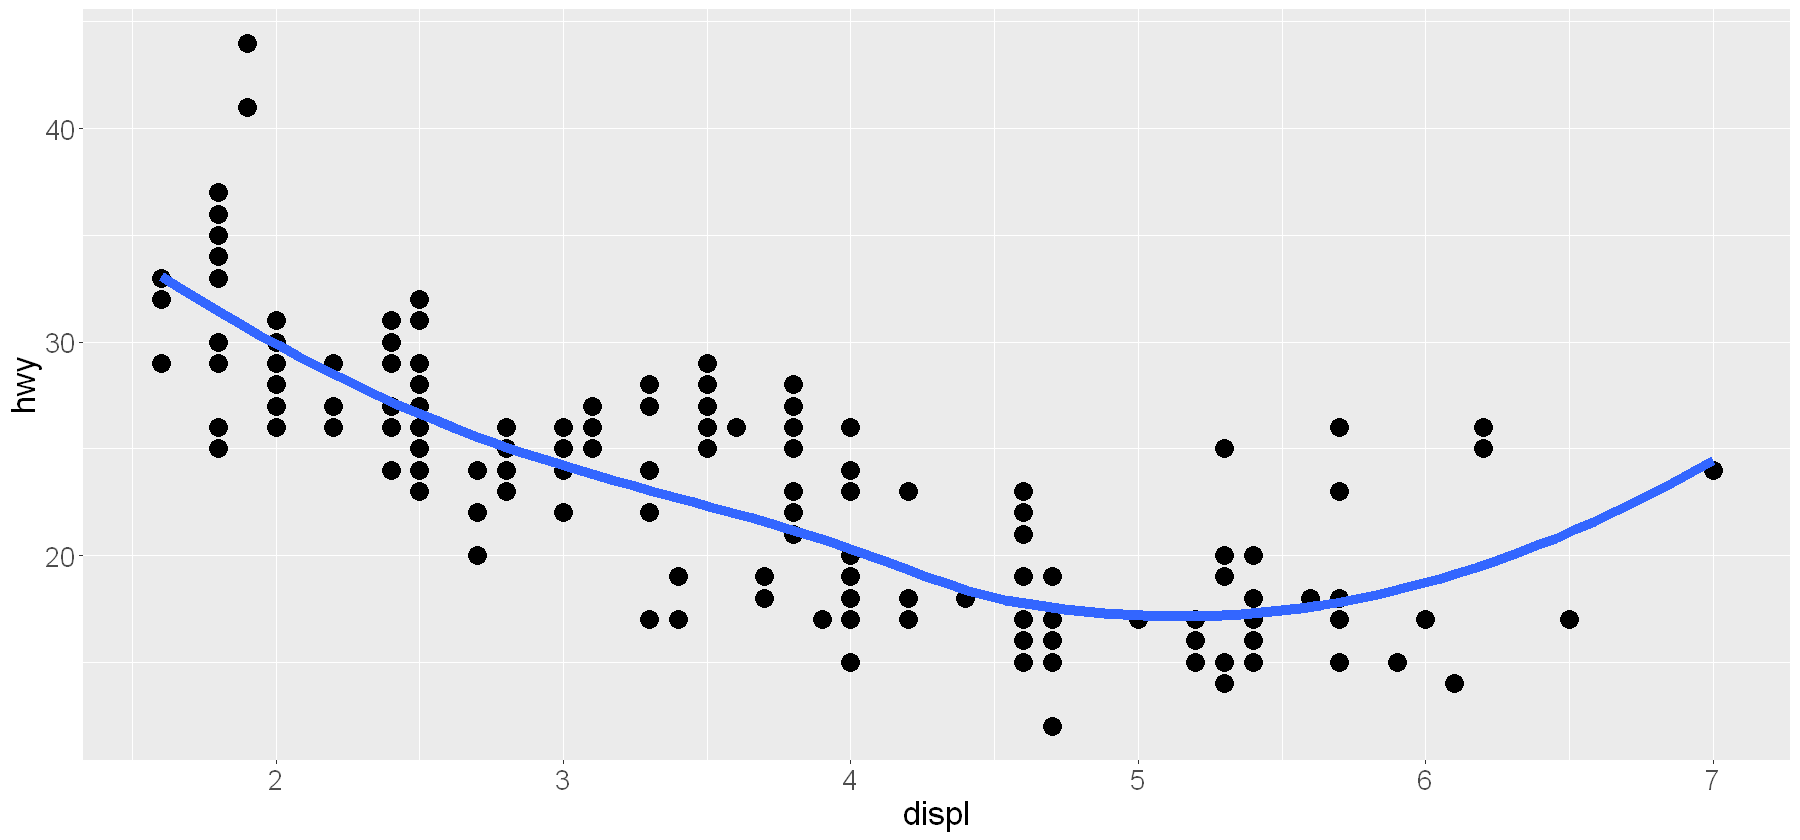

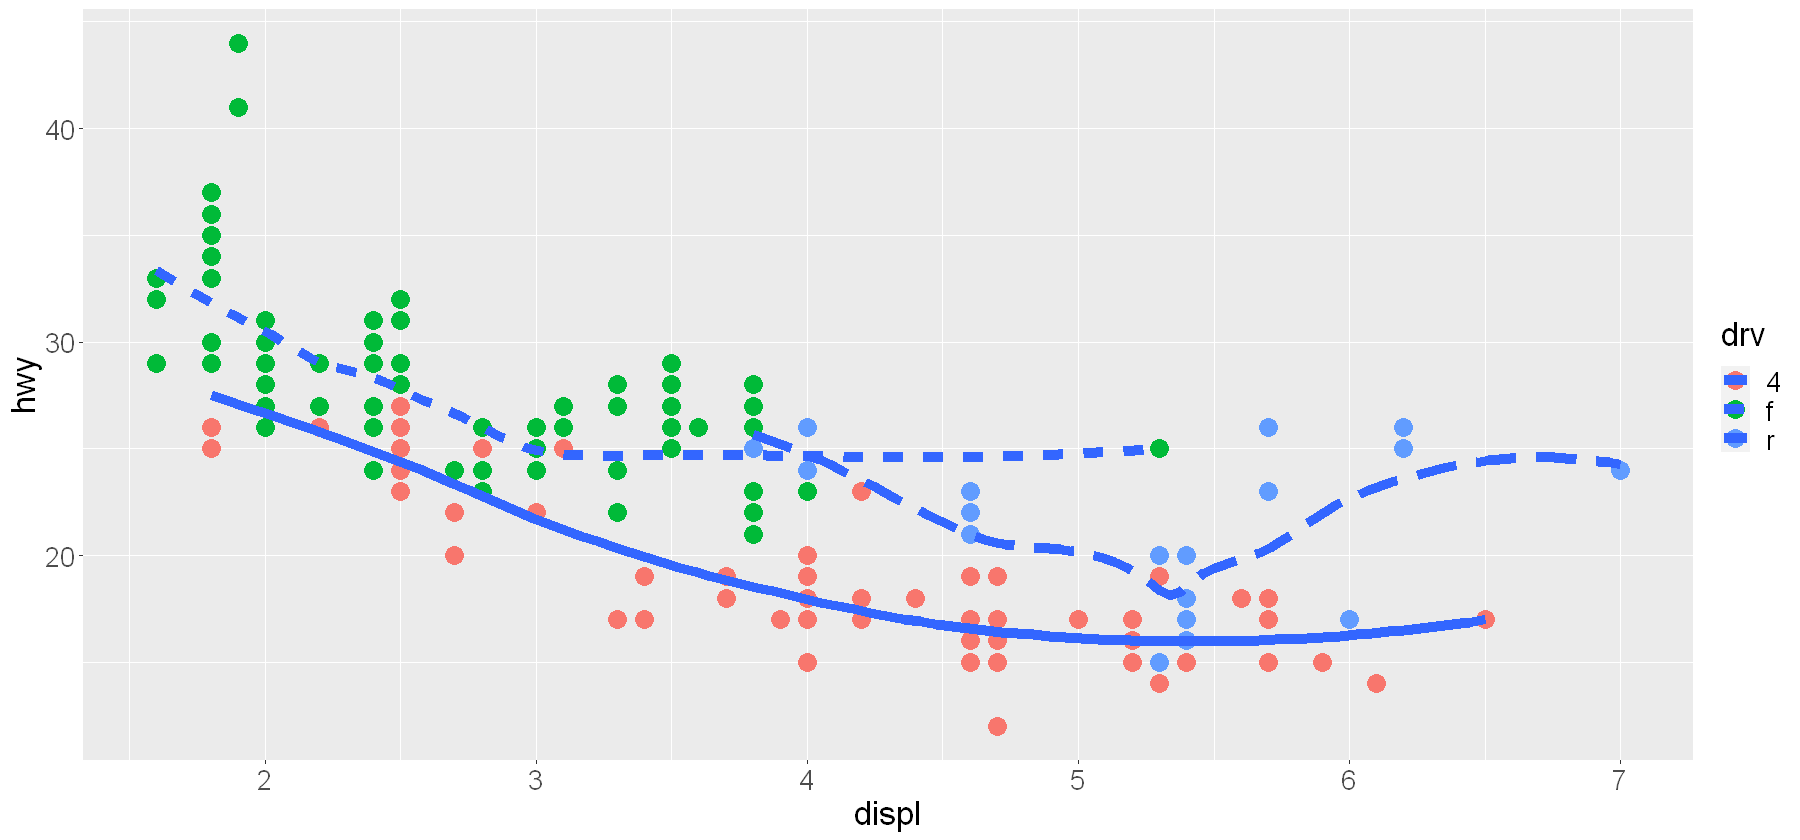

In [53]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(color="black",size=5) +  # geom_point() es para hacer el scatterplot 
  geom_smooth(se = FALSE,size=3) + # geom_smooth() es para hacer una linea de regresion, se = FALSE es para que no aparezca el intervalo de confianza
  theme(text = element_text(size=20))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=drv),size=5) +  # geom_point() es para hacer el scatterplot, color=drv es para decirle que la variable drv es 
                                                                      #la que va a determinar el color de los puntos
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv),se = FALSE,size=3) + # geom_smooth() es para hacer una linea de regresion, 
                                                                                    # linetype = drv es para decirle que la variable drv es la que va a determinar el tipo de linea
  theme(text = element_text(size=20))

## Ejercicio 2

Utilice el conjunto de datos `iris` para crear un diagrama de densidad con  `geom_density` y uno de barras con `geom_bar`, para la longitud de los petalos para cada especie en colores diferentes. 

In [34]:
#@title Solución **acá**
if (F) {
ggplot(data=iris, aes(Petal.Length,fill=Species)) +
geom_histogram() +
theme(text = element_text(size=20))

ggplot(data=iris, aes(Petal.Length,fill=Species)) +
geom_density(alpha=0.7) +
theme(text = element_text(size=20))
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


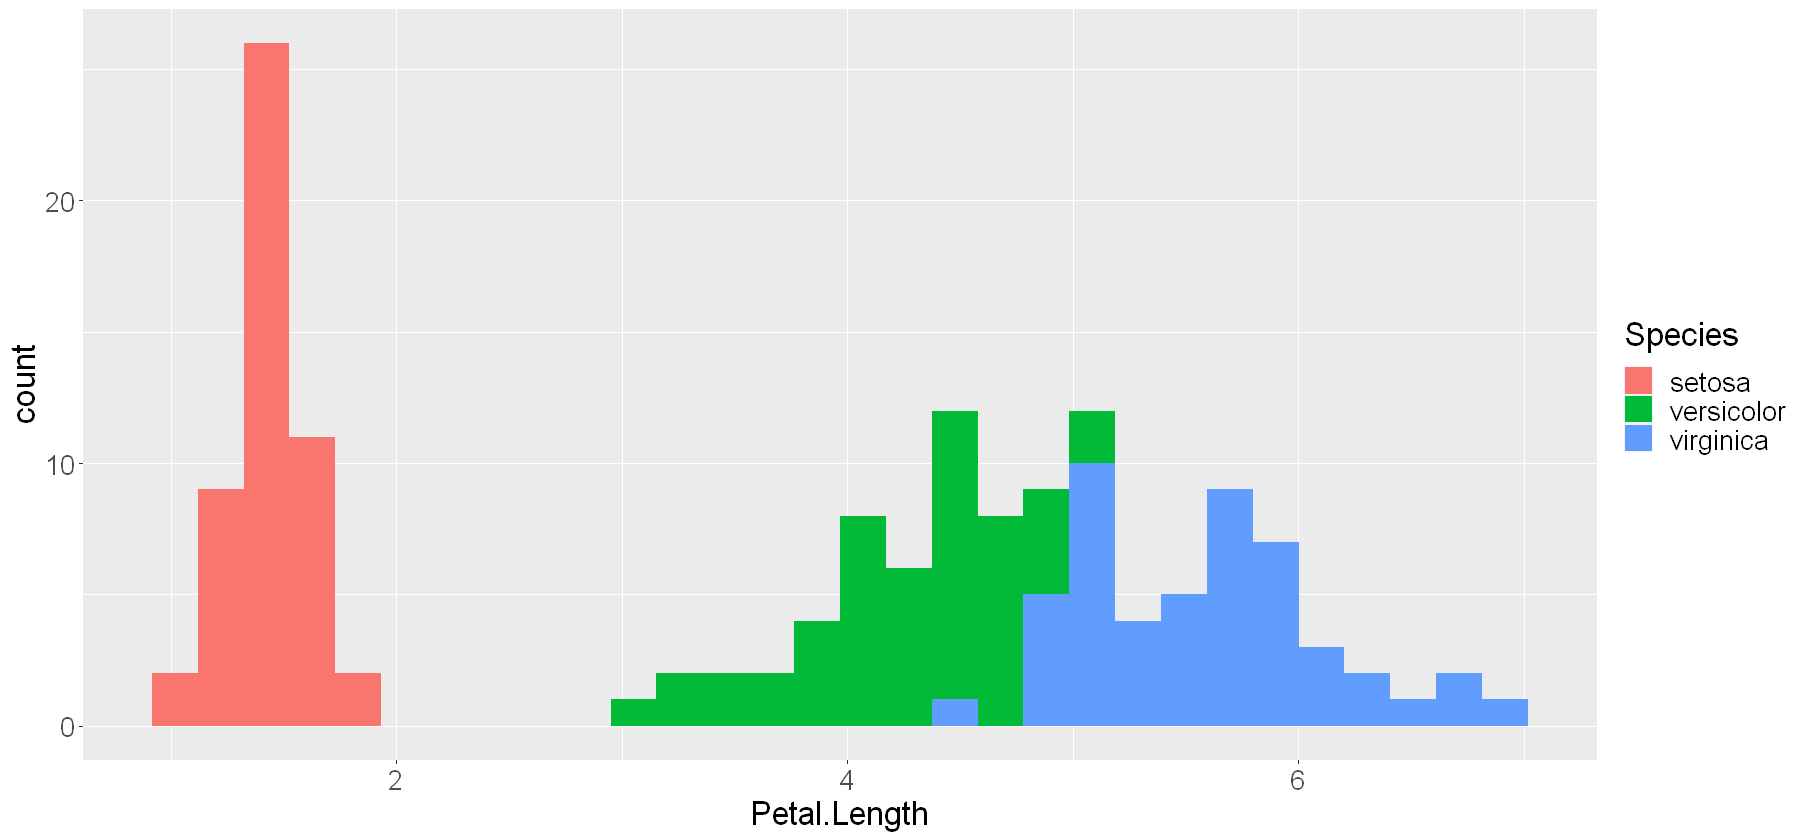

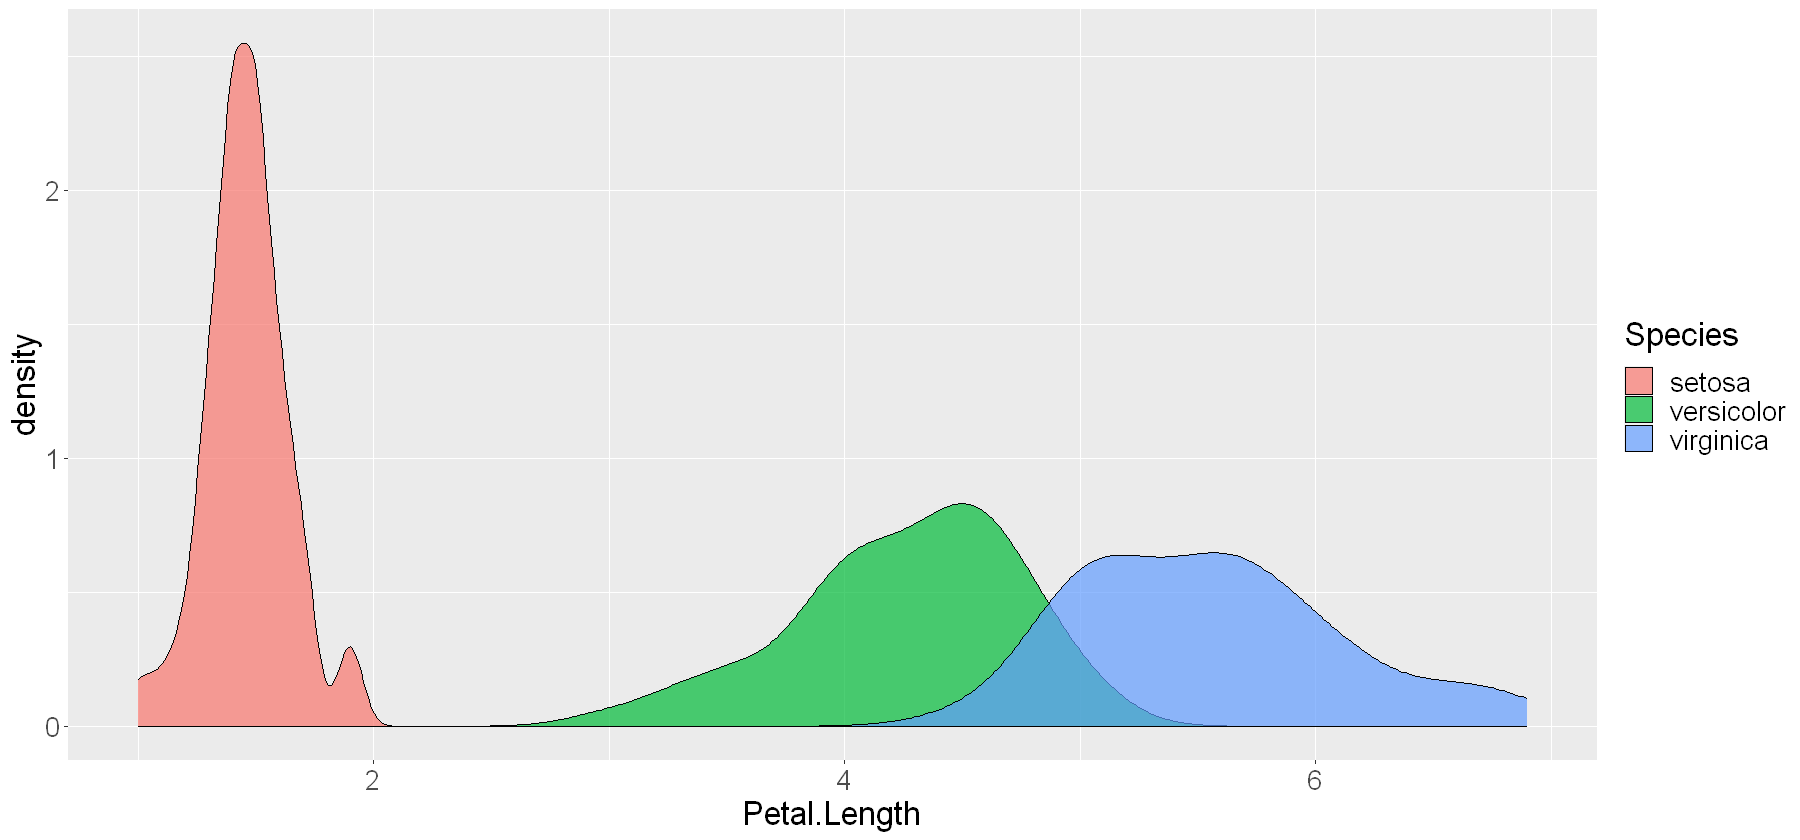

In [54]:
ggplot(data=iris, aes(Petal.Length,fill=Species)) + # aes(Petal.Length,
                                                    # fill=Species) es para decirle que todo se va a graficar son Petal.Length y Species.
geom_histogram() +
theme(text = element_text(size=20))

ggplot(data=iris, aes(Petal.Length,fill=Species)) + # aes(Petal.Length,
                                                    # fill=Species) es para decirle que todo se va a graficar son Petal.Length y Species.
geom_density(alpha=0.7) + # geom_density() es para hacer un histograma, alpha=0.7 es para que la grafica sea transparente
theme(text = element_text(size=20))

## Ejercicio 3

Con el conjunto de datos `diamonds` y usando `facet_wrap` con `scale = "free_y"` cree histogramas del precio por claridad. Ajuste el ancho del bin hasta obtener un buen histograma. 

In [35]:
#@title Solución **acá**
if (F) {
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(diamonds, aes(x=price)) + 
geom_histogram(binwidth=200) + 
facet_wrap(~ clarity, scale="free_y") +
theme(text = element_text(size=20))
}

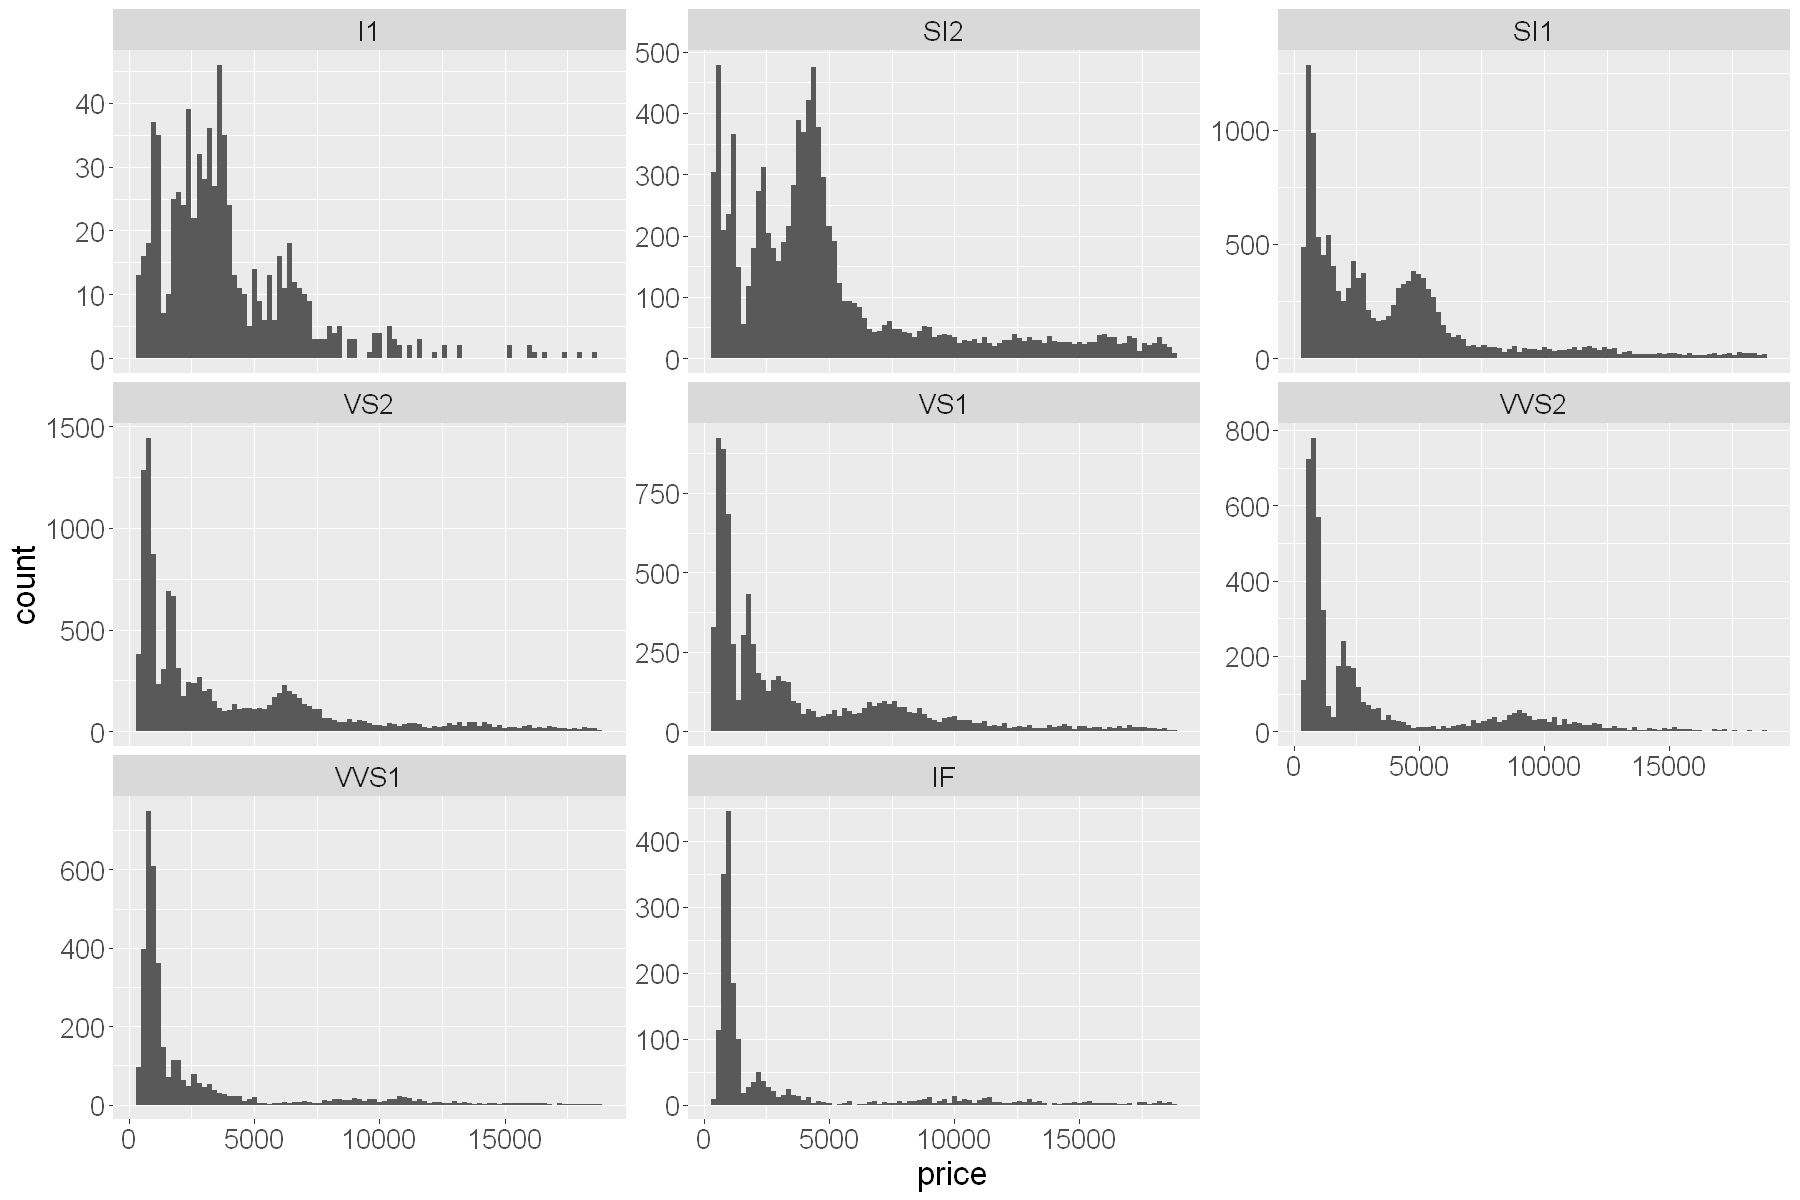

In [55]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(diamonds, aes(x=price)) + 
geom_histogram(binwidth=200) + # geom_histogram() es para hacer un histograma, 
                               # binwidth=200 es para decirle que el ancho de las barras es 200
facet_wrap(~ clarity, scale="free_y") + # facet_wrap() es para hacer subplots, 
                                        # ~ clarity es para decirle que queremos que los subplots sean de acuerdo a la variable clarity
                                        # scale="free_y" es para que los subplots tengan diferentes escalas en el eje y
theme(text = element_text(size=20))

# **Ajustes de posicionamiento**

Todas las capas tienen un ajuste de posicionamiento para mejorar el solapamiento de cada [geom](http://sape.inf.usi.ch/quick-reference/ggplot2/geom). 

Empezaremos por ver un grafico de barras básico para el dataset de `R` de diamantes. Para mayor información del dataset, el alumno puede dirigirs al siguiente [link](https://ggplot2.tidyverse.org/reference/diamonds.html)



In [56]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [57]:
describe(diamonds)

diamonds 

 10  Variables      53940  Observations
--------------------------------------------------------------------------------
carat 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   53940        0      273    0.999   0.7979   0.5122     0.30     0.31 
     .25      .50      .75      .90      .95 
    0.40     0.70     1.04     1.51     1.70 

lowest : 0.2  0.21 0.22 0.23 0.24, highest: 4    4.01 4.13 4.5  5.01
--------------------------------------------------------------------------------
cut 
       n  missing distinct 
   53940        0        5 
                                                            
Value           Fair      Good Very Good   Premium     Ideal
Frequency       1610      4906     12082     13791     21551
Proportion     0.030     0.091     0.224     0.256     0.400
--------------------------------------------------------------------------------
color 
       n  missing distinct 
   53940        0        7 
                       

Pordemos entonces realizar gráficas de barras asociadas al dataset anterior. Vemaos por ejemplo, una gráfica de barras de la cantidad de diamentes cortados según las dategorías:

- Ideal
- Premium     
- Very Good
- Good
- Fair      

El orden en que fueron listadas estas características se corresponde con el orden que aparece al aplicar la función `describe()`


Existen varias formas de mejorar la apariencia de las gráficas. Puede colorearse un gráfico de barras utilizando el argumento `color`:

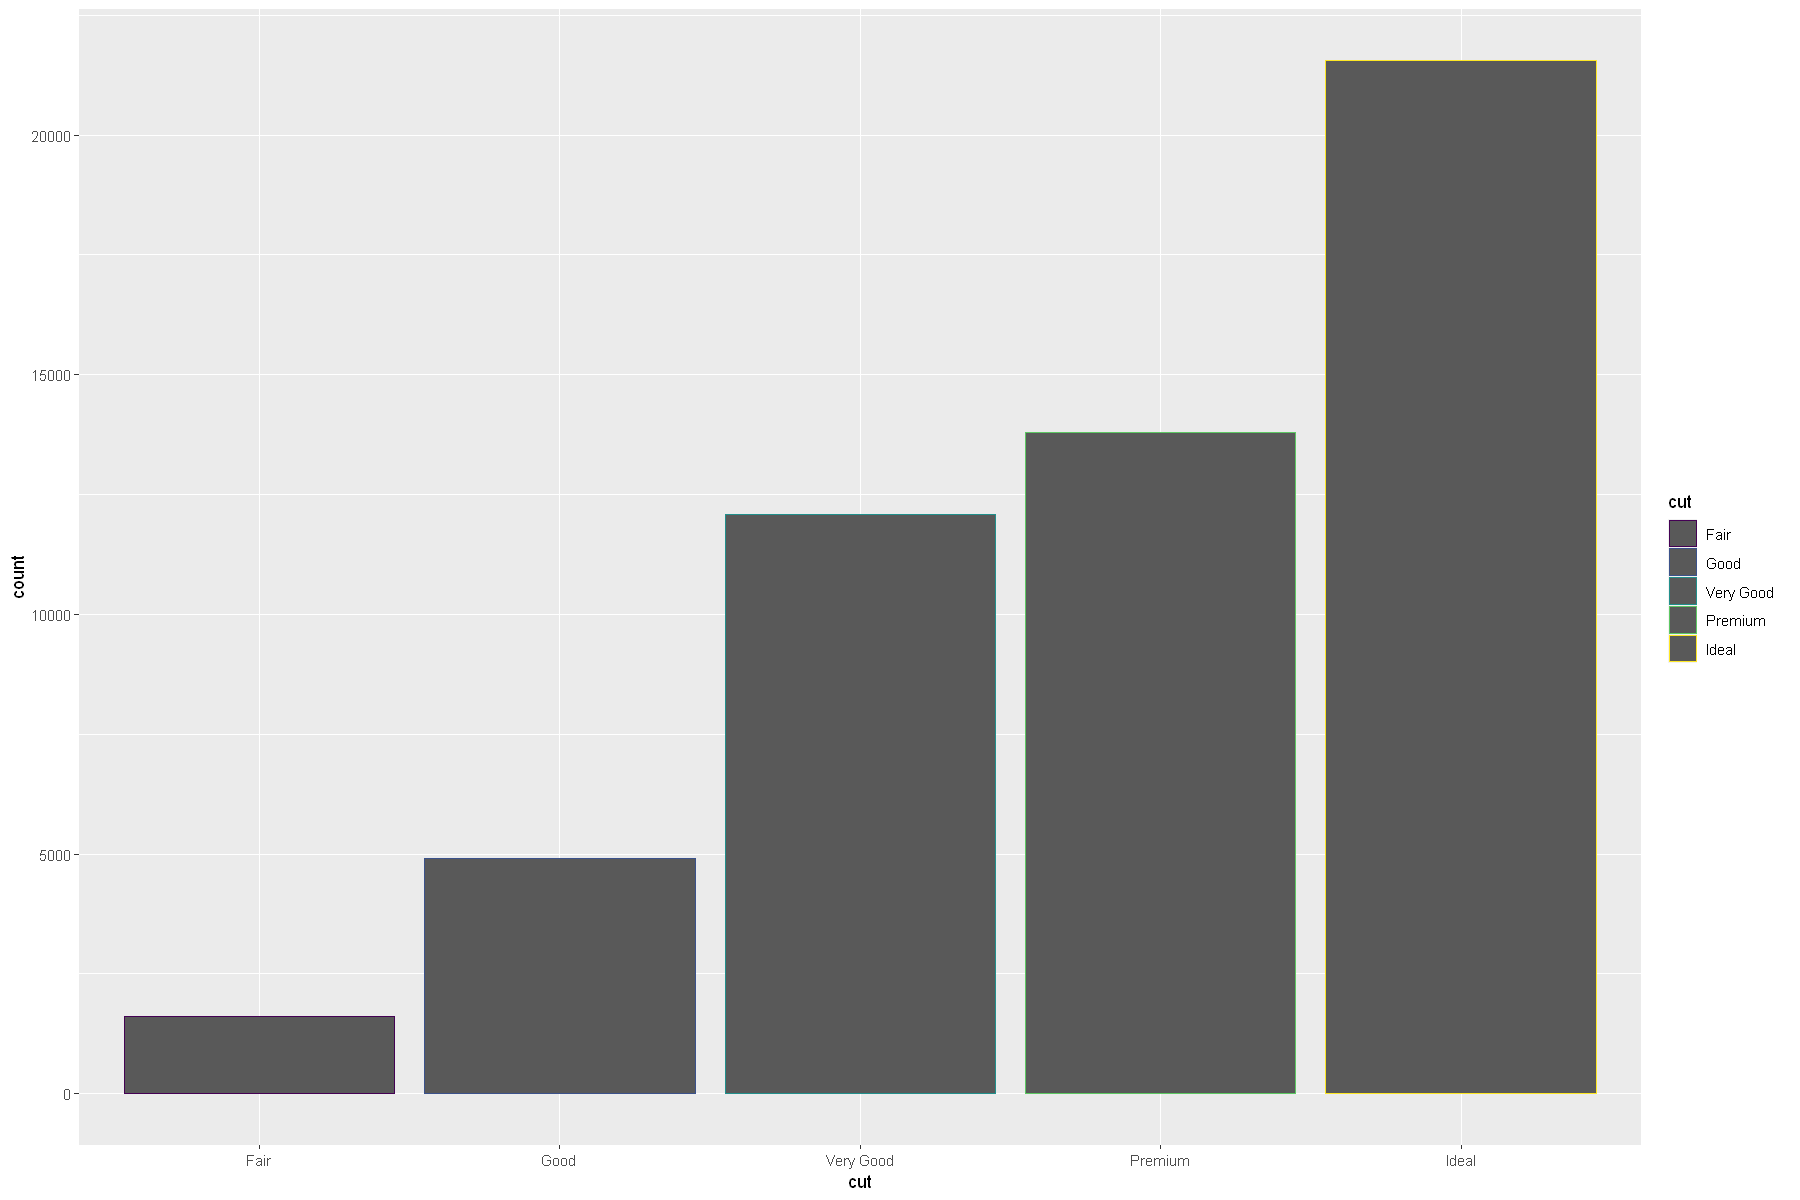

In [58]:
ggplot(data = diamonds) +
geom_bar(mapping = aes(x = cut, color = cut)) # geom_bar() es para hacer un histograma, 
                                              # x = cut es para decirle que la variable cut es la que va a determinar el histograma
                                              # color = cut es para decirle que la variable cut es la que va a determinar el color de las barras

Como puede objervarse, mediante este argumento se genera una gráfica cuyo relleno por barra es el mismo y lo único que cambia es el recuadro de 

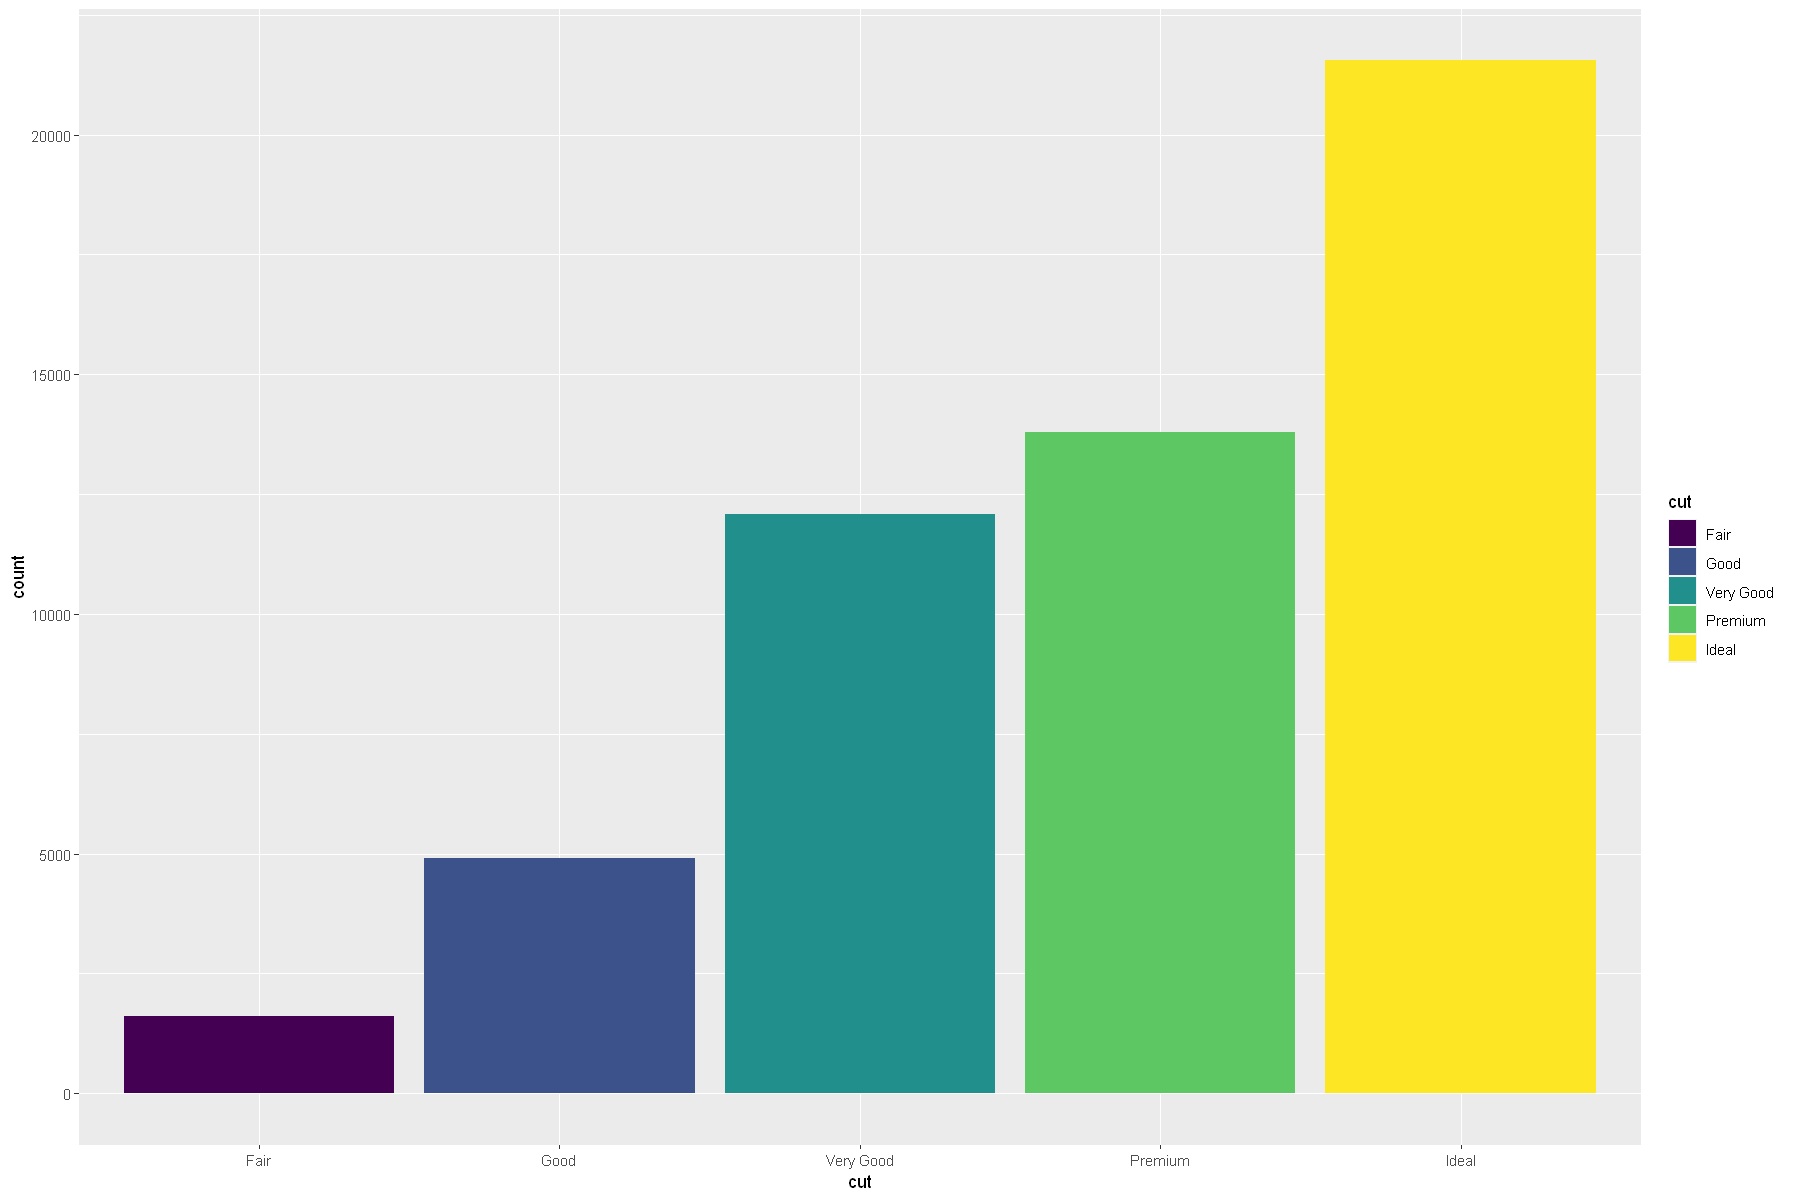

In [59]:
ggplot(data = diamonds)+geom_bar(mapping = aes(x = cut, fill = cut)) # geom_bar() es para hacer un histograma, 
                                              # x = cut es para decirle que la variable cut es la que va a determinar el histograma
                                              # fill = cut es para decirle que la variable cut es la que va a determinar el color de las barras

Veamos lo que pasa si mapeamos el argumento `fill` a una de las cartacterísticas del dataset como `clarity`: Las barras se apilan automáticamente. Cada rectángulo de color retrsenta una combinación de corte y claridad.

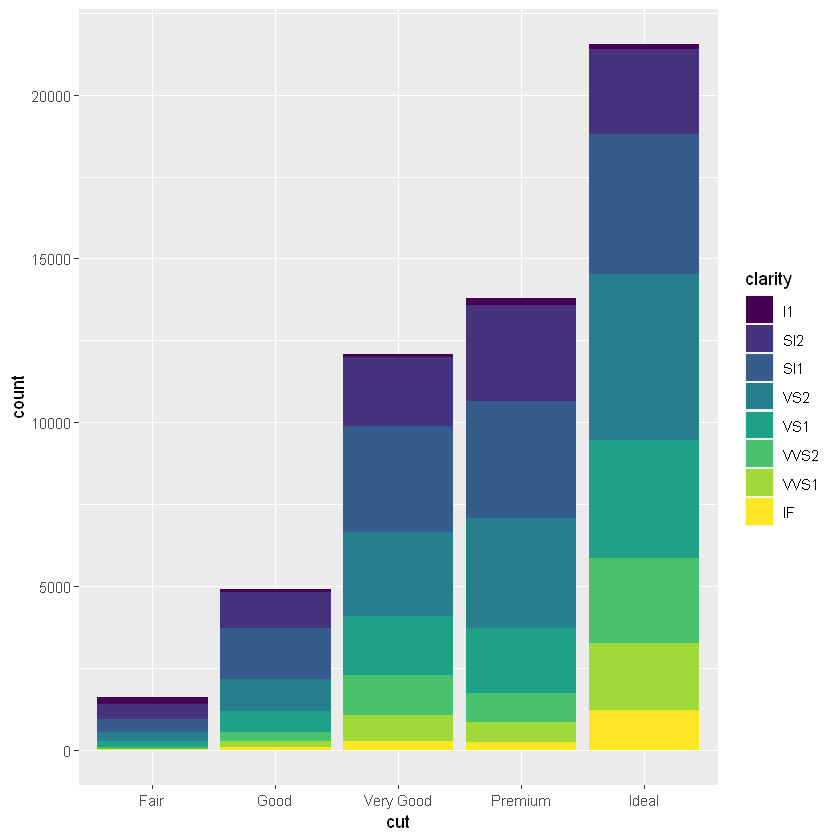

In [40]:
ggplot(data = diamonds)+geom_bar(mapping = aes(x = cut, fill = clarity))# geom_bar() es para hacer un histograma, 
                                              # x = cut es para decirle que la variable cut es la que va a determinar el histograma
                                              # fill = clarity apila las barras de acuerdo a la variable clarity

Vemos entonces que lo que está realizando la grafica al especificar la variable `x=cut` y `fill=clarity` es hacer una agrupación sobre las características de `cut` y `clarity` y un conteo, de la siguiente forma:

In [61]:
# De momento haga caso omiso de las funciones que se usan para agrupar, 
# más adelante se cubrirá este tema.
d_cut_g <- diamonds %>% group_by(cut,clarity)%>%summarise(count = n())  # d_cut_g es para agrupar el dataframe diamonds de acuerdo a las variables cut y clarity
                                                                        # summarise(count = n()) es para contar el numero de observaciones de acuerdo a las variables cut y clarity
d_cut_g

`summarise()` has grouped output by 'cut'. You can override using the `.groups`
argument.


cut,clarity,count
<ord>,<ord>,<int>
Fair,I1,210
Fair,SI2,466
Fair,SI1,408
Fair,VS2,261
Fair,VS1,170
Fair,VVS2,69
Fair,VVS1,17
Fair,IF,9
Good,I1,96


Nótese que los valores de la columna `cut` corresponde al eje x de la gráfica y los altos de cada caja apilada en la barra, es proporcional a las cuentas de la variable `clarity`. 

En este punto es donde entran en juego diferentes métodos para ajustar el posicionamiento. El apilamiento se realiza automáticamente y puede ajustarse mediante el argumento `position`. Si no desea un gráfico de barras apiladas, se puede usar una de las otras tres opciones siguientes:

- `identity`: que colocará cada objeto exactamente donde cae en el contexto del gráfico. Esto no es muy útil en el caso de barras, ya que las superpone. Para ver esa superposición, necesitamos darle un poco de transparecia a las barras, configurando el parámetro `alpha` a un valor pequeño, o completamente transparentes configurando `fill = NA`:

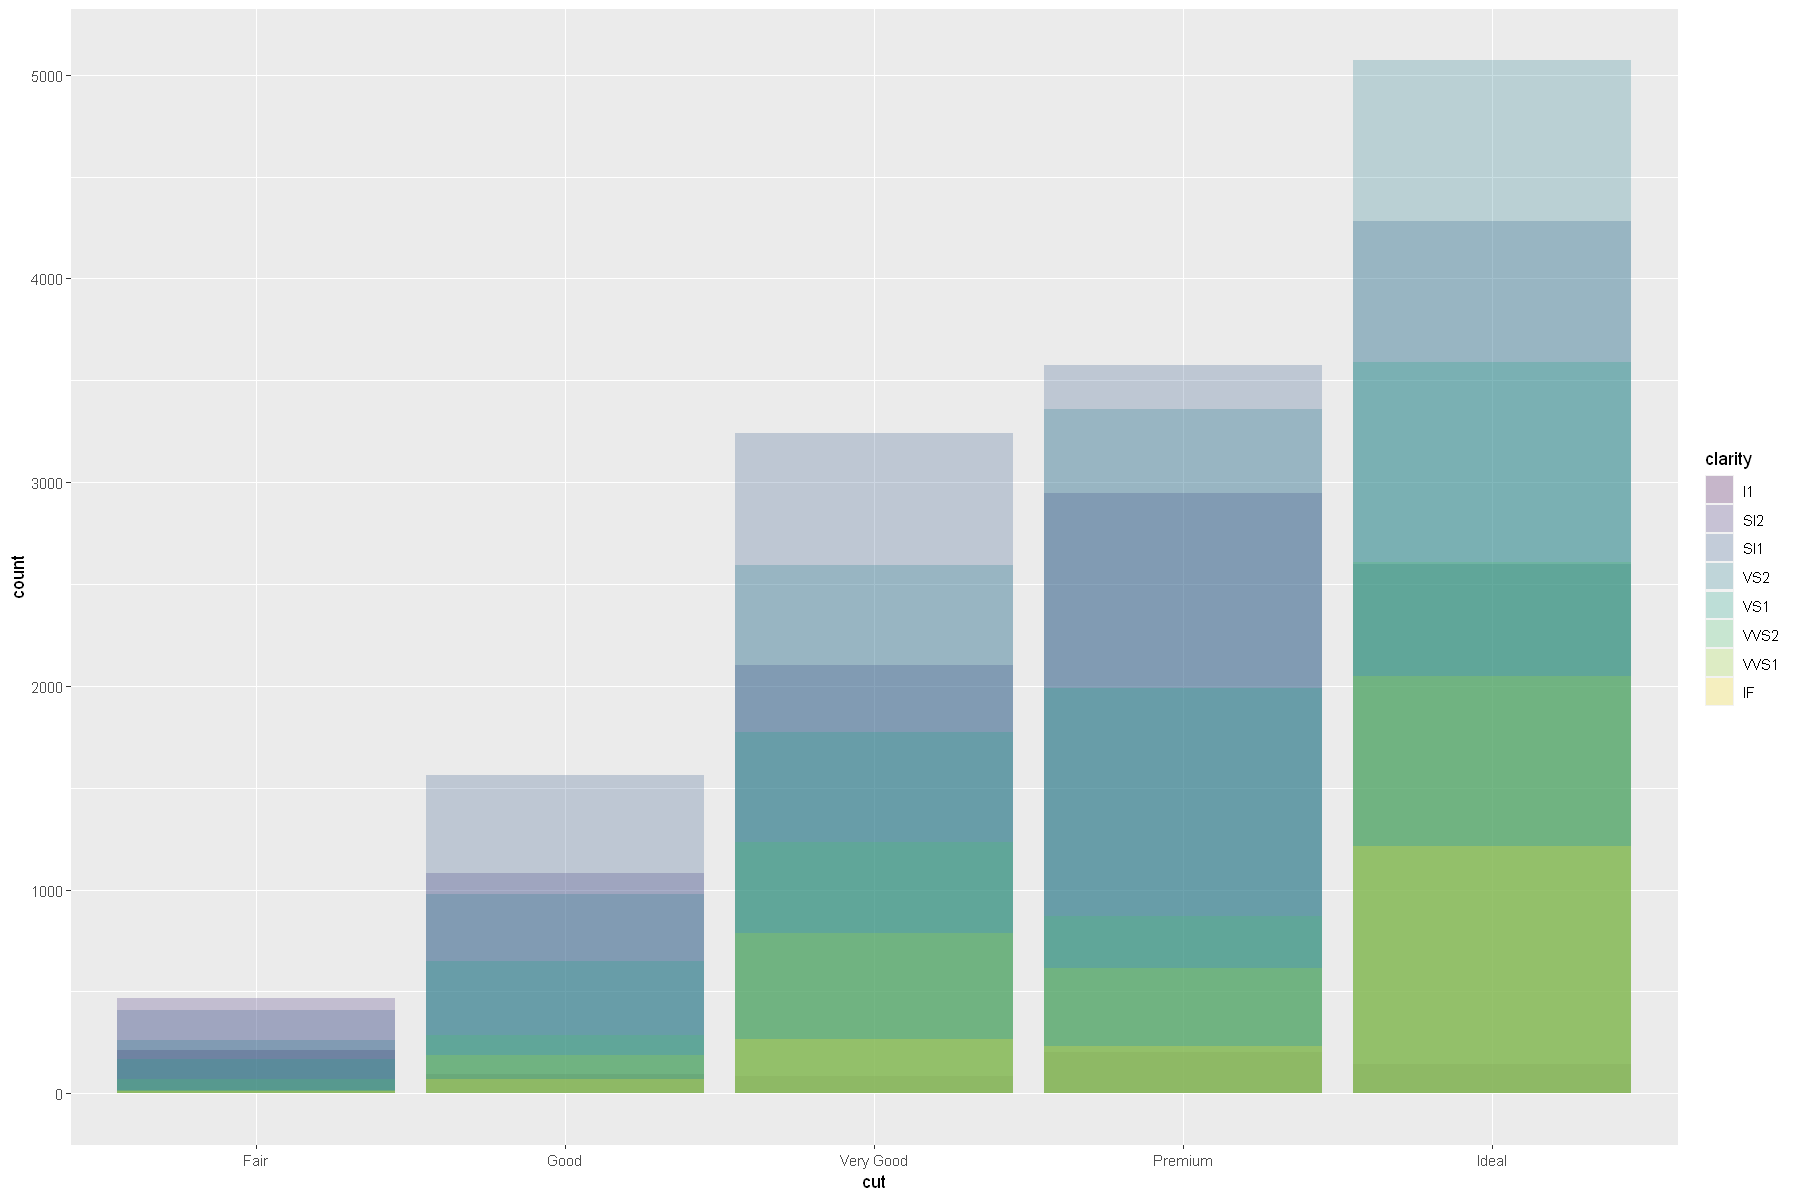

In [62]:
# Identity con transparencia
ggplot(data = diamonds, mapping = aes(x = cut, fill = clarity)) + geom_bar(alpha = 1/4, position = "identity") #alpha = 1/4 es para que la grafica sea transparente
                                                                                                        

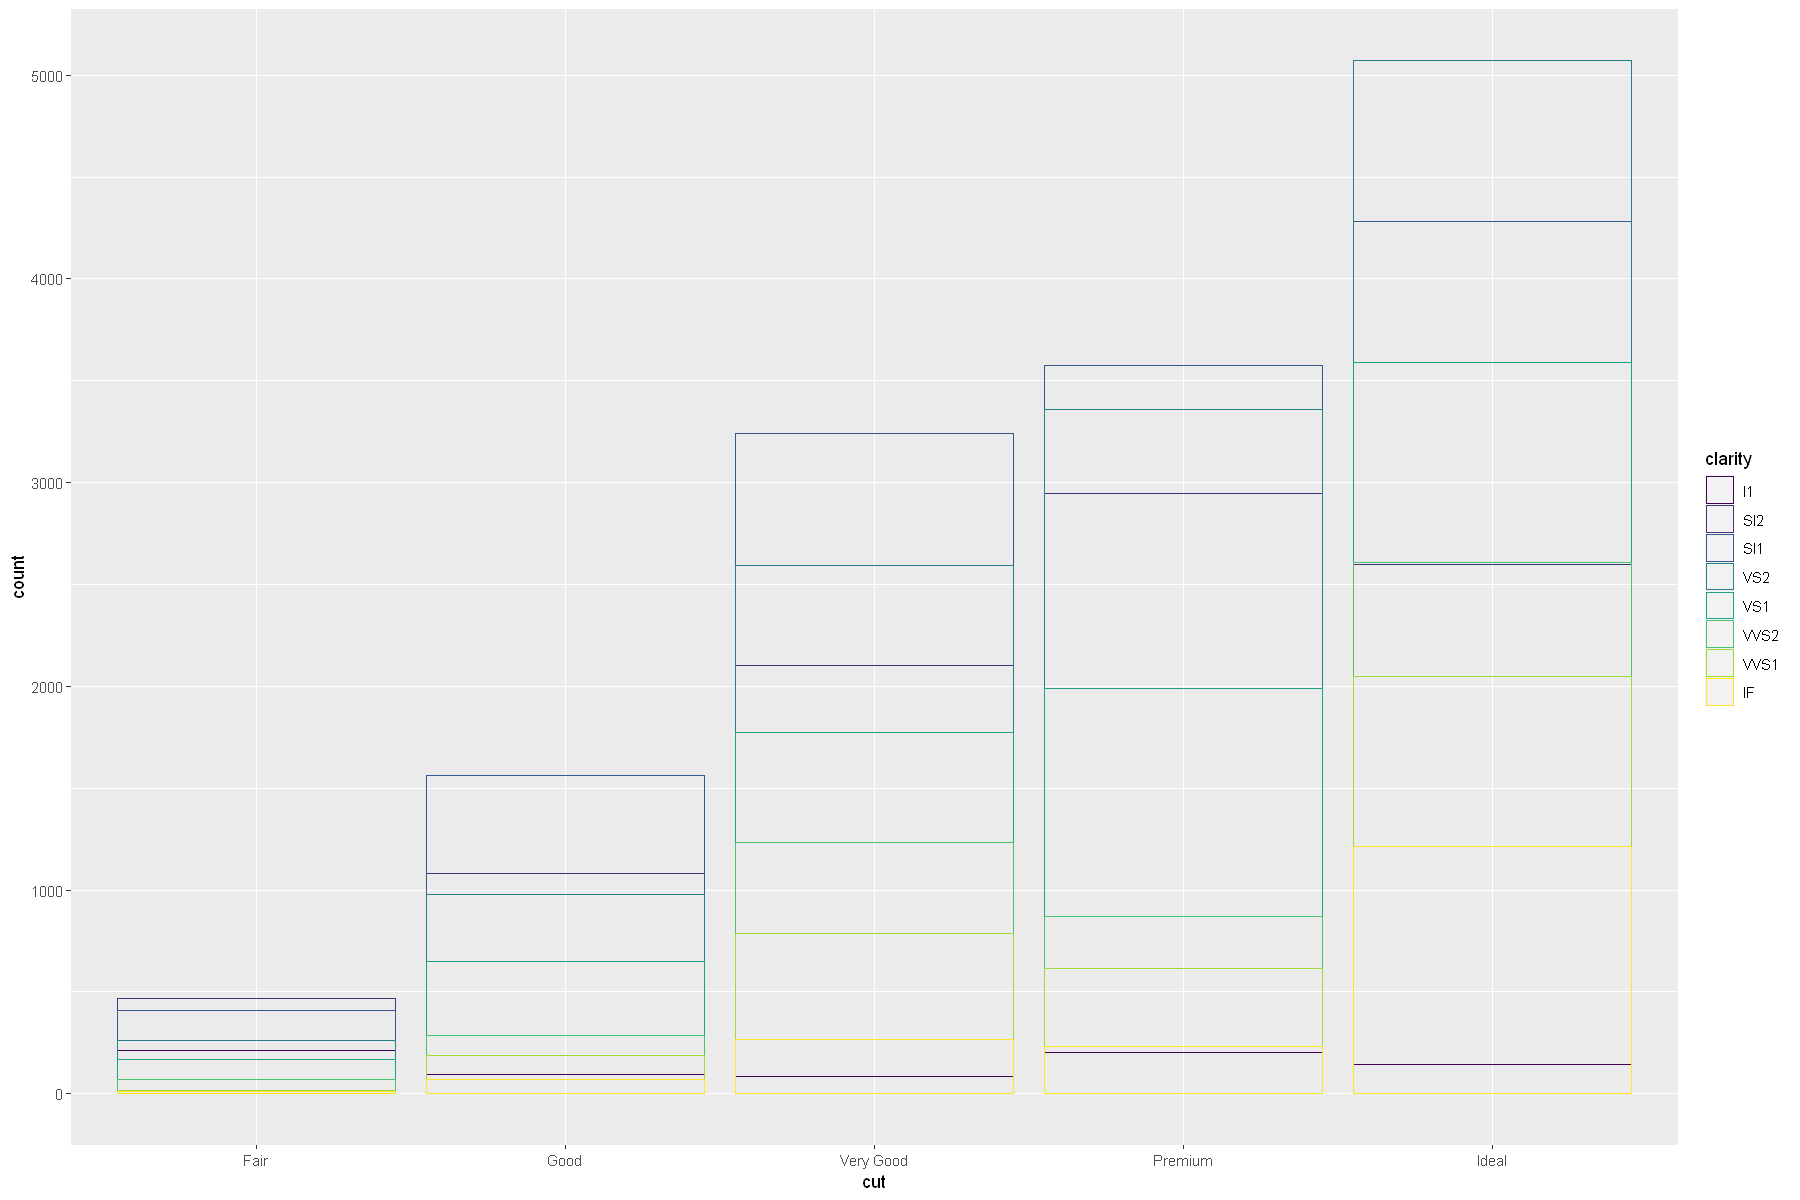

In [64]:
# position = "identity" sin relleno
ggplot( data = diamonds, mapping = aes(x = cut, color = clarity) ) + geom_bar(fill = NA, position = "identity") 
# fill = NA es para que las barras no tengan relleno

- `position = "fill"` que funciona como un apilado pero hace cada grupo de barras apiladas del mismo alto. Esto hace más facil comparar las proporciones a lo largo de los diferentes grupos:

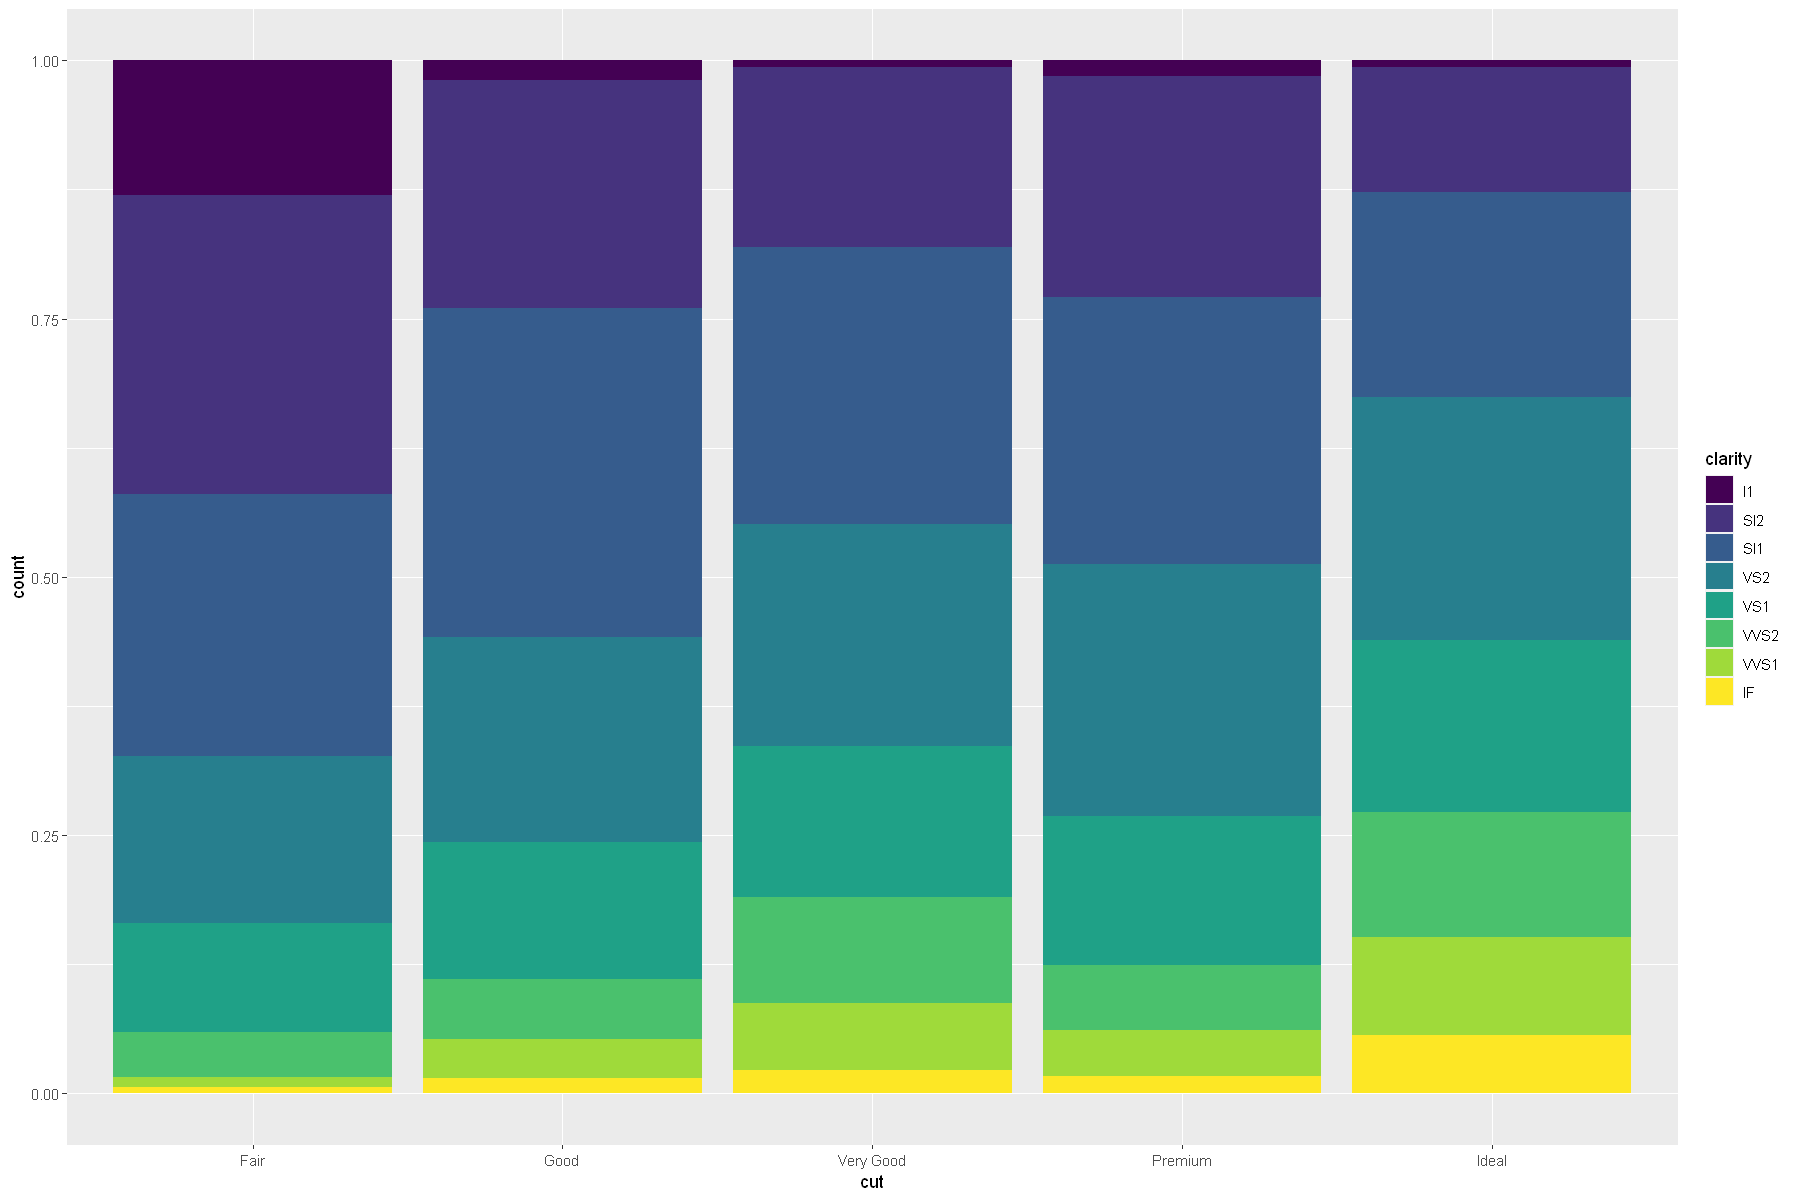

In [65]:
# position="fill"

ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, fill = clarity),
position = "fill" # position = "fill" es para que las barras tengan el mismo tamaño
)

- `position = "dodge"`: Ubica los objeros que se superponen directamente uno al lado de otro. Esto hace mas fácil comparar los valores individuales:

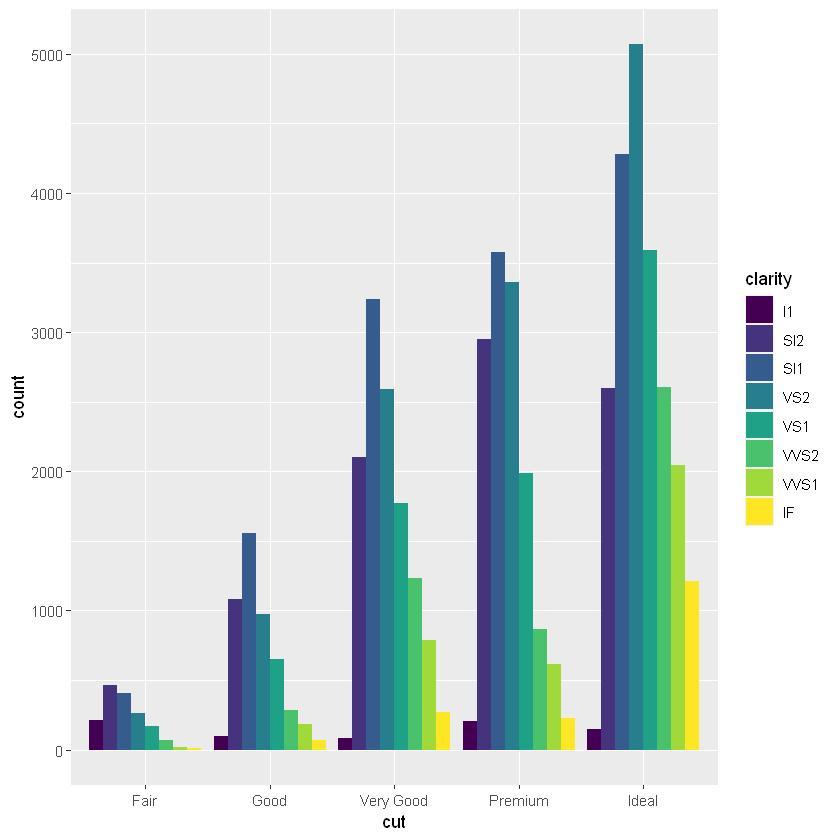

In [45]:
# position="dodge"
ggplot(data = diamonds) +
geom_bar(
mapping = aes(x = cut, fill = clarity),
position = "dodge" # position = "dodge" es para que las barras no tengan el mismo tamaño y se puedan distinguir
)

Esiste otro tipo de ajuste que no es útil en el caso de gráficos de barras, pero puede ser util en los gráficos por dispersión.

El valor de `hwy` y `displ` son aproximados de tal forma que los puntos aparecen en el grid y muchos de ellos se solapan entre si. Este problema se conoce en inglés como `overplotting`. Este problema dificulta ver el centro de masas de la nube de puntos. Este problema se puede solventar si se hace se fija el siguiente argumento 

- `position = "jitter"`

el cual adiciona pequeñas cantidade de ruido aleatorio a cada punto. Esto hace que los puntos se dispercen entre sí, y se evita el problema de `overplotting`:

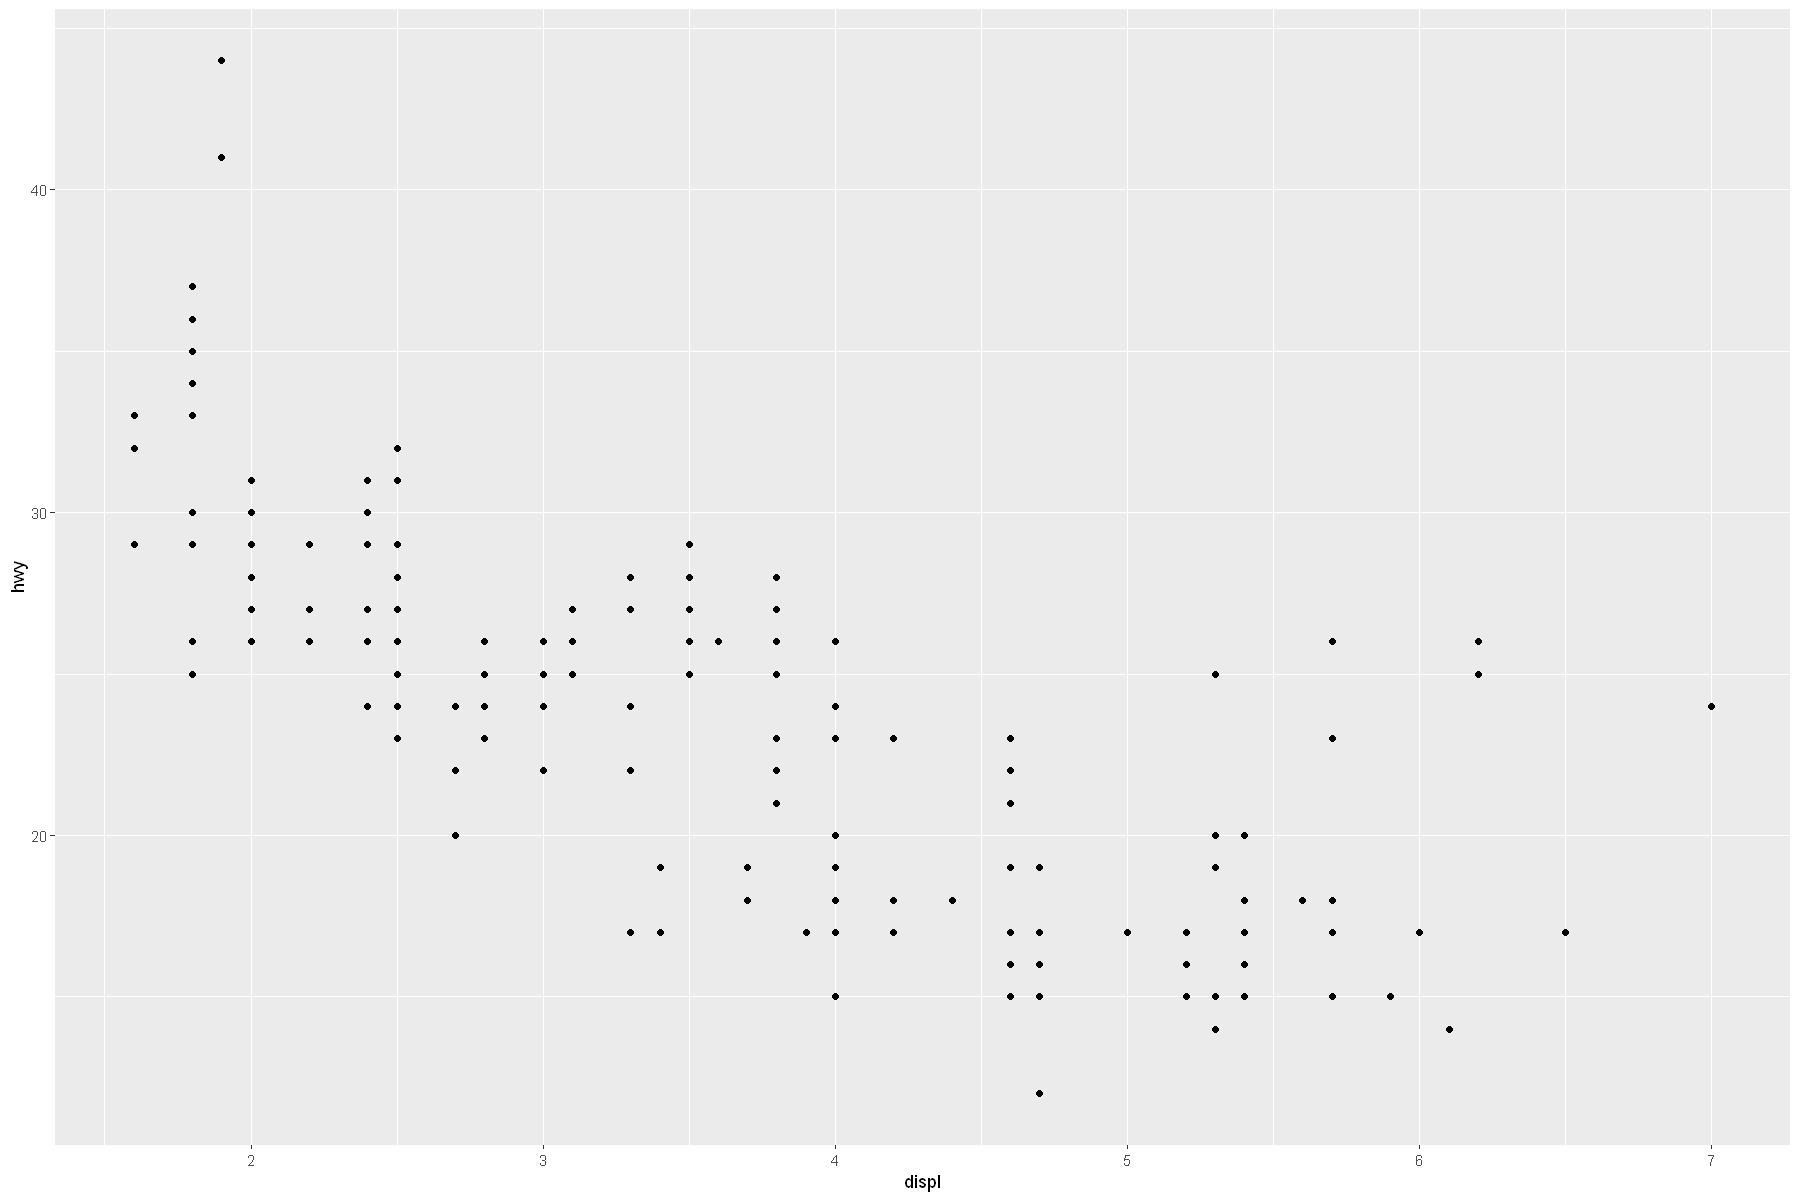

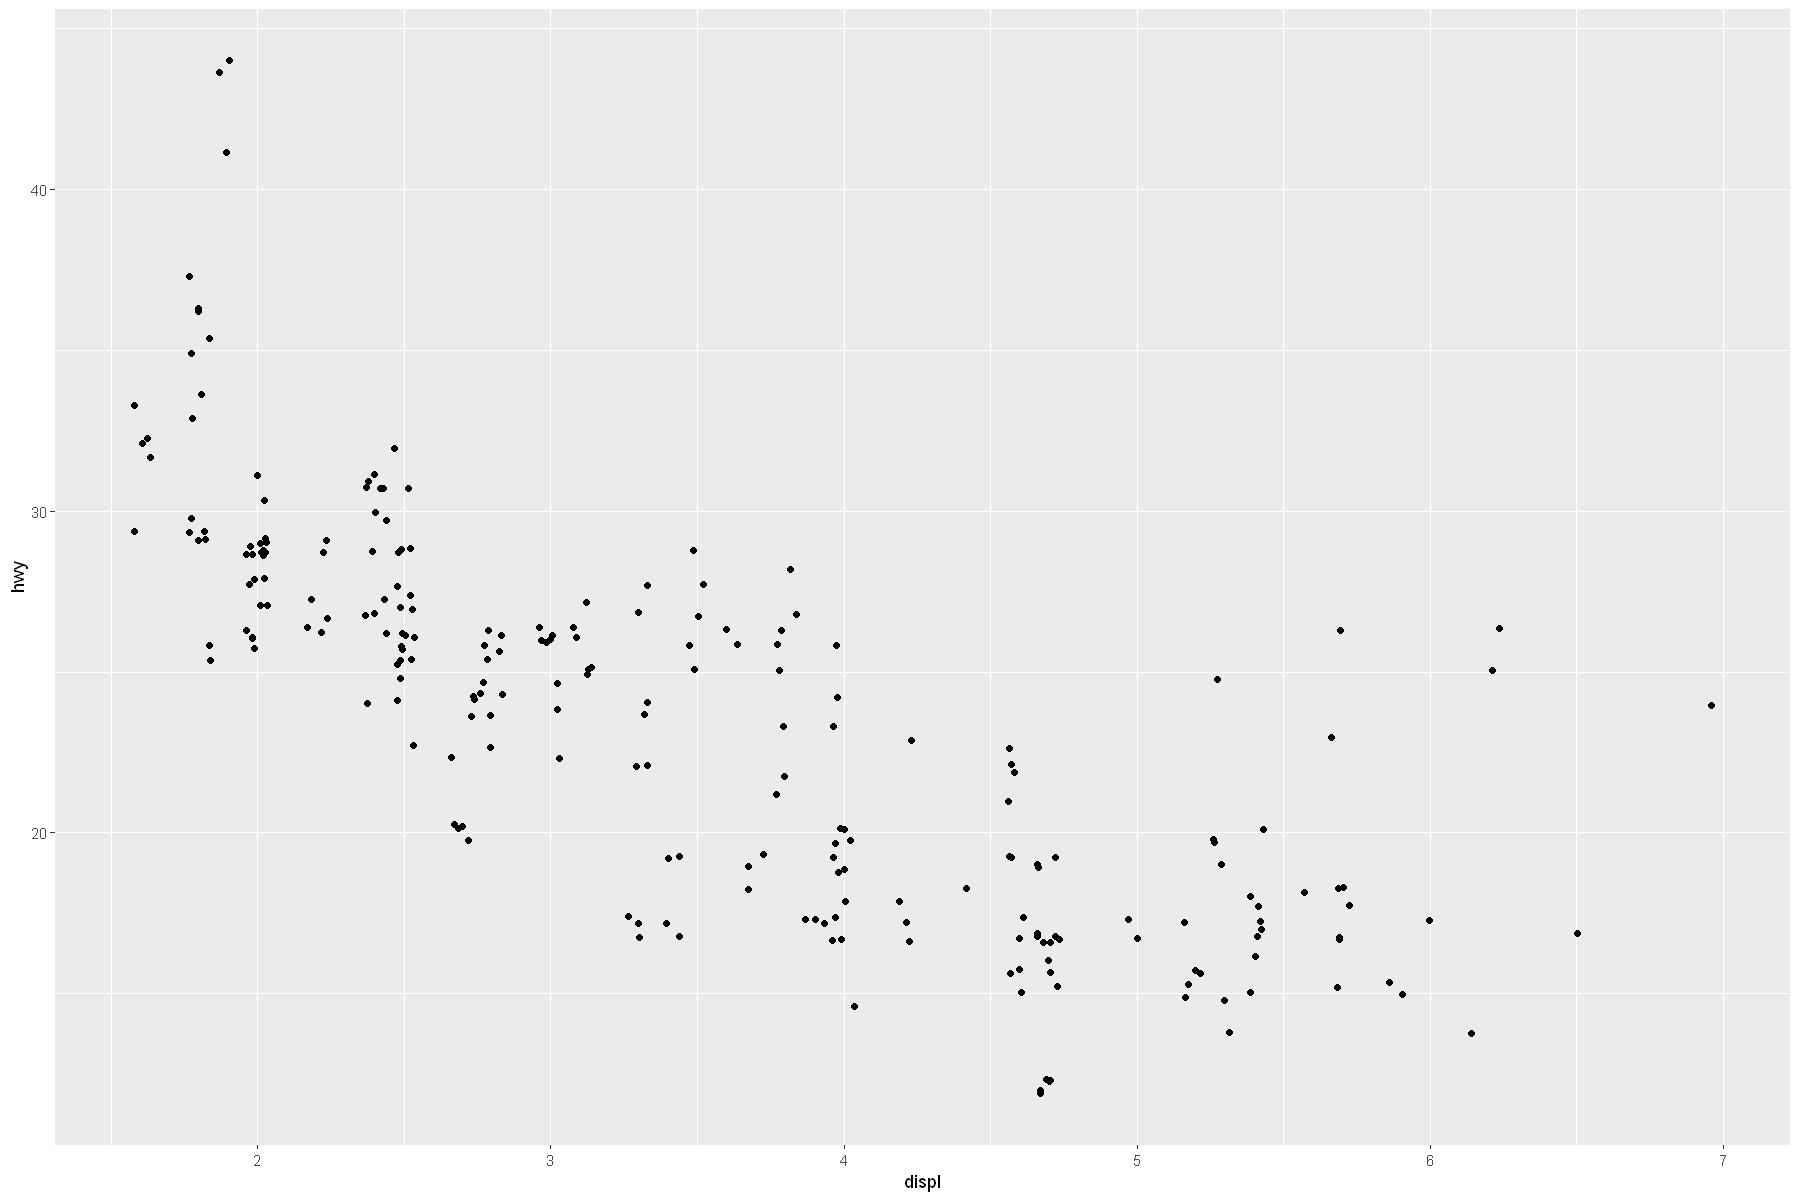

In [66]:
# Sin jitter
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))
# Con jitter
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

# ----------------------------- FIN ----------------------- #

**Ejercicio:**

Para el presente ejercicio se brinda las siguientes líneas de código para la creación de un dataset basado en el dataset midwest de `R`, para el cual puede obtener mayor información [aquí](https://ggplot2.tidyverse.org/reference/midwest.html).

El código siguiente:



```
library("tidyr")
state_race_long <- midwest %>%
  select(state, popwhite, popblack, popamerindian, popasian, popother) %>%
  gather(key = race, value = population, -state)
```

a continuación:

1. Visualice el dataframe almacenado en la variable `state_race_long`
2. Realice una gráfica de barras del número de personas en cada estado
3. Realizar una gráfica de barras del número de personas en cada estado con la misma altura para todas las barras.
4. Repita la misma gráfica pero esta vez visualizando una barra al lado de la otra.

![Alt text](image-1.png)
![Alt text](image.png)

In [47]:
#@title **1. Carga y visualización del dataframe `state_race_long`:** 
library("tidyr") # tidyr es para hacer manipulacion de datos
state_race_long <- midwest %>% 
  select(state, popwhite, popblack, popamerindian, popasian, popother) %>% # select es para seleccionar las variables state, popwhite, popblack, popamerindian, popasian, popother
  gather(key = race, value = population, -state) # gather es para hacer que las variables se conviertan en una sola variable llamada population

state_race_long

state,race,population
<chr>,<chr>,<int>
IL,popwhite,63917
IL,popwhite,7054
IL,popwhite,14477
IL,popwhite,29344
IL,popwhite,5264
IL,popwhite,35157
IL,popwhite,5298
IL,popwhite,16519
IL,popwhite,13384


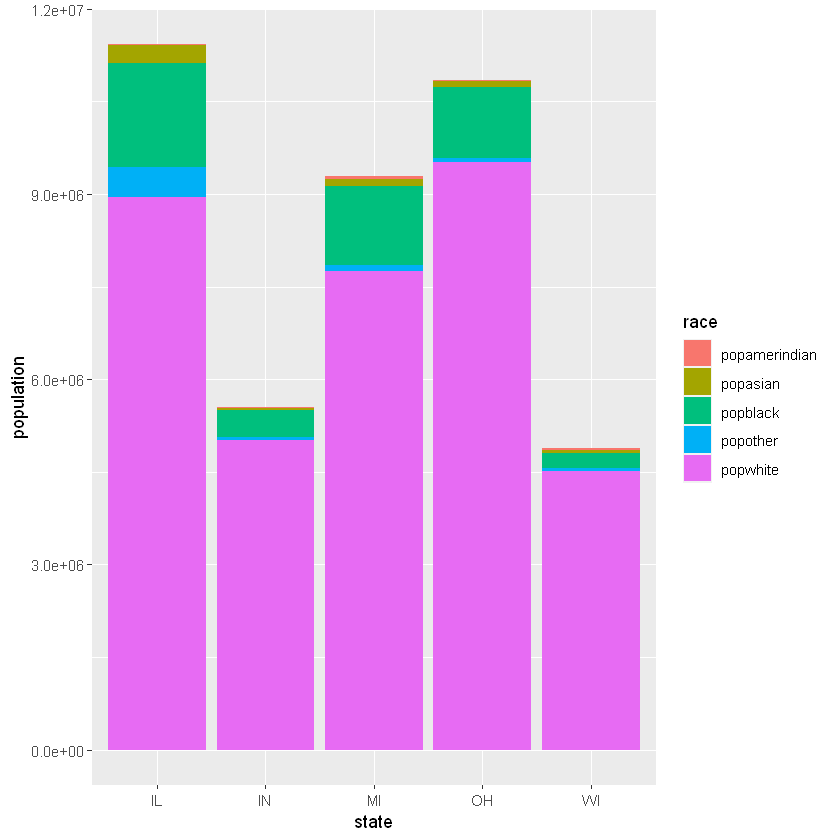

In [48]:
#@title **2. Gráfica de barras del número de personas en cada estado**

ggplot(state_race_long)+
  geom_col(mapping = aes(x=state, y = population, fill = race))

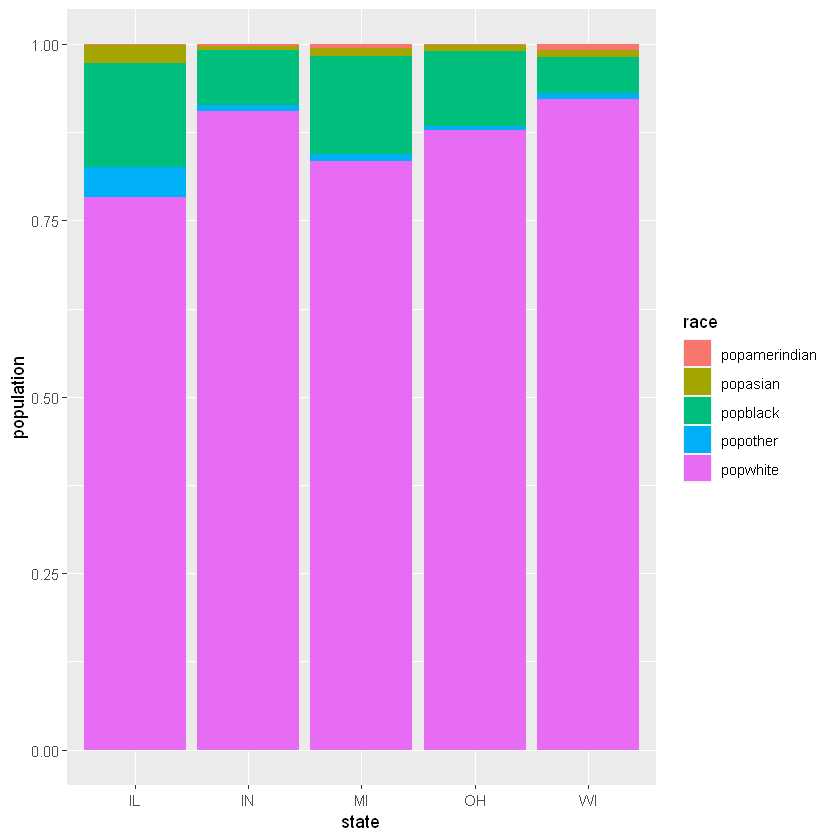

In [49]:
#@title **3. Gráfica de barras de la misma altura.**
ggplot(state_race_long)+
geom_col(mapping = aes( x = state, y = population, fill = race), position = "fill") # position = "fill" es para que las barras tengan el mismo tamaño

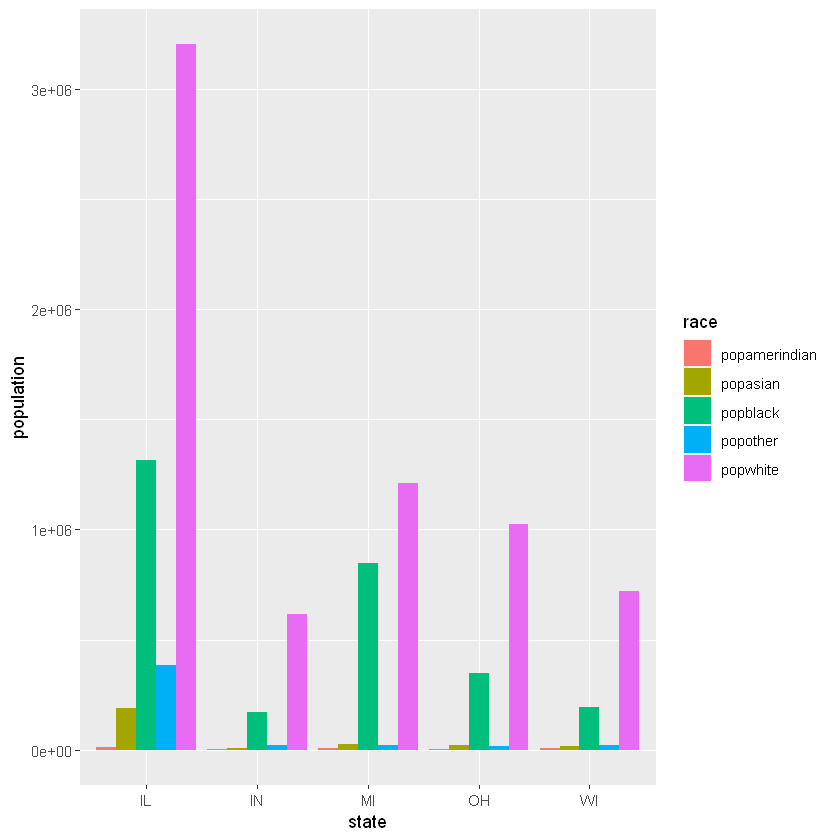

In [50]:
#@title **4. Gráfica de barras side-by-side**

ggplot(state_race_long)+
  geom_col(mapping = aes(x = state, y = population, fill = race), position = "dodge") # position = "dodge" es para que las barras no tengan el mismo tamaño y se puedan distinguir

# **Sistema de coordenada**

Probablemente, los sistemas de coordenadas es la parte más complicada de `ggplot2`. El sistema de coordenadas por defecto es un sistema carteciano en donde las cordenadas actuan de forma independiente para determinar la ubicación de cada punto. Existen varios sistemas de coordenadas adicionales que resultan especialmente útiles:

- `coord_flip()`: que se encarga de cambiar los ejes `x` é `y`. Este tipo de cambios resultan útilies se se quiere realizar boxplots horizontales; también es útil en el caso de tener etiquetas muy largas que se solapen entre sí:

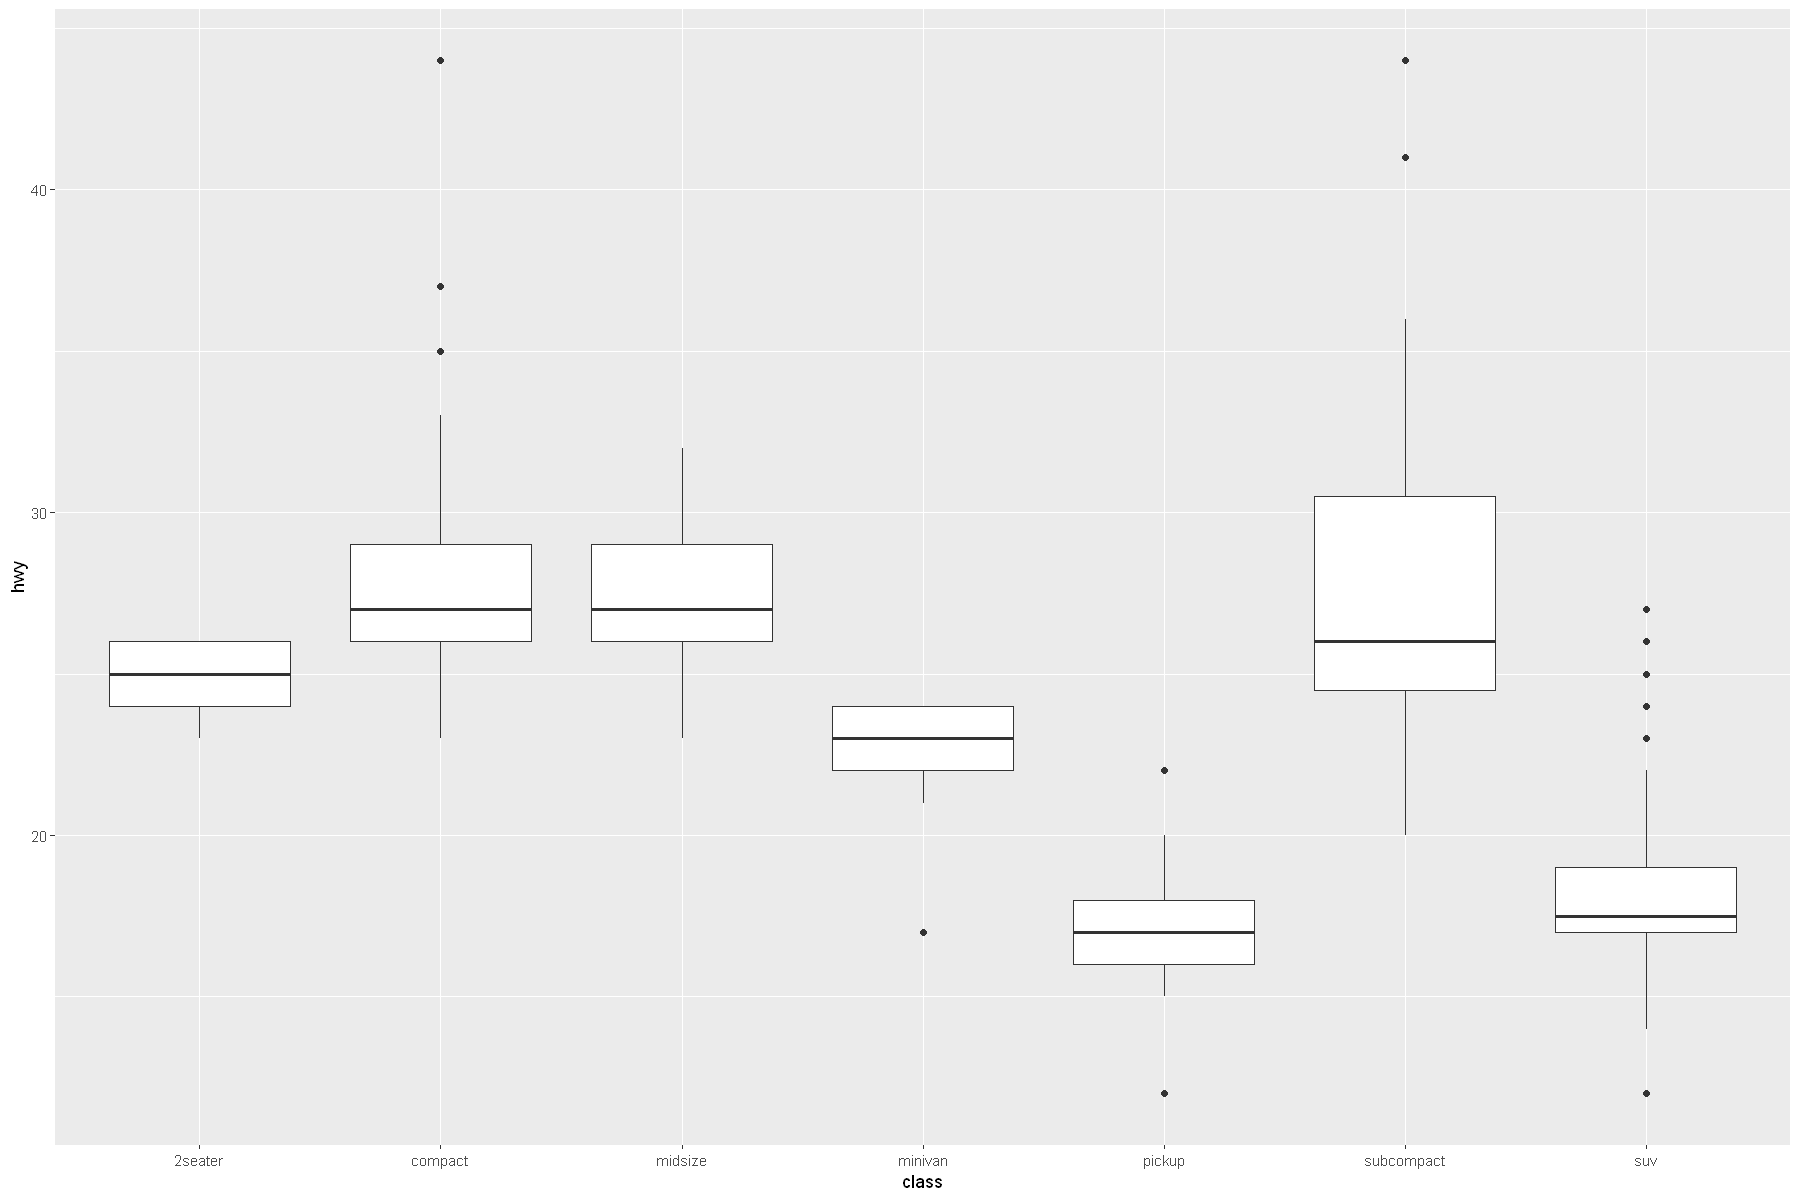

In [67]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) +
geom_boxplot()

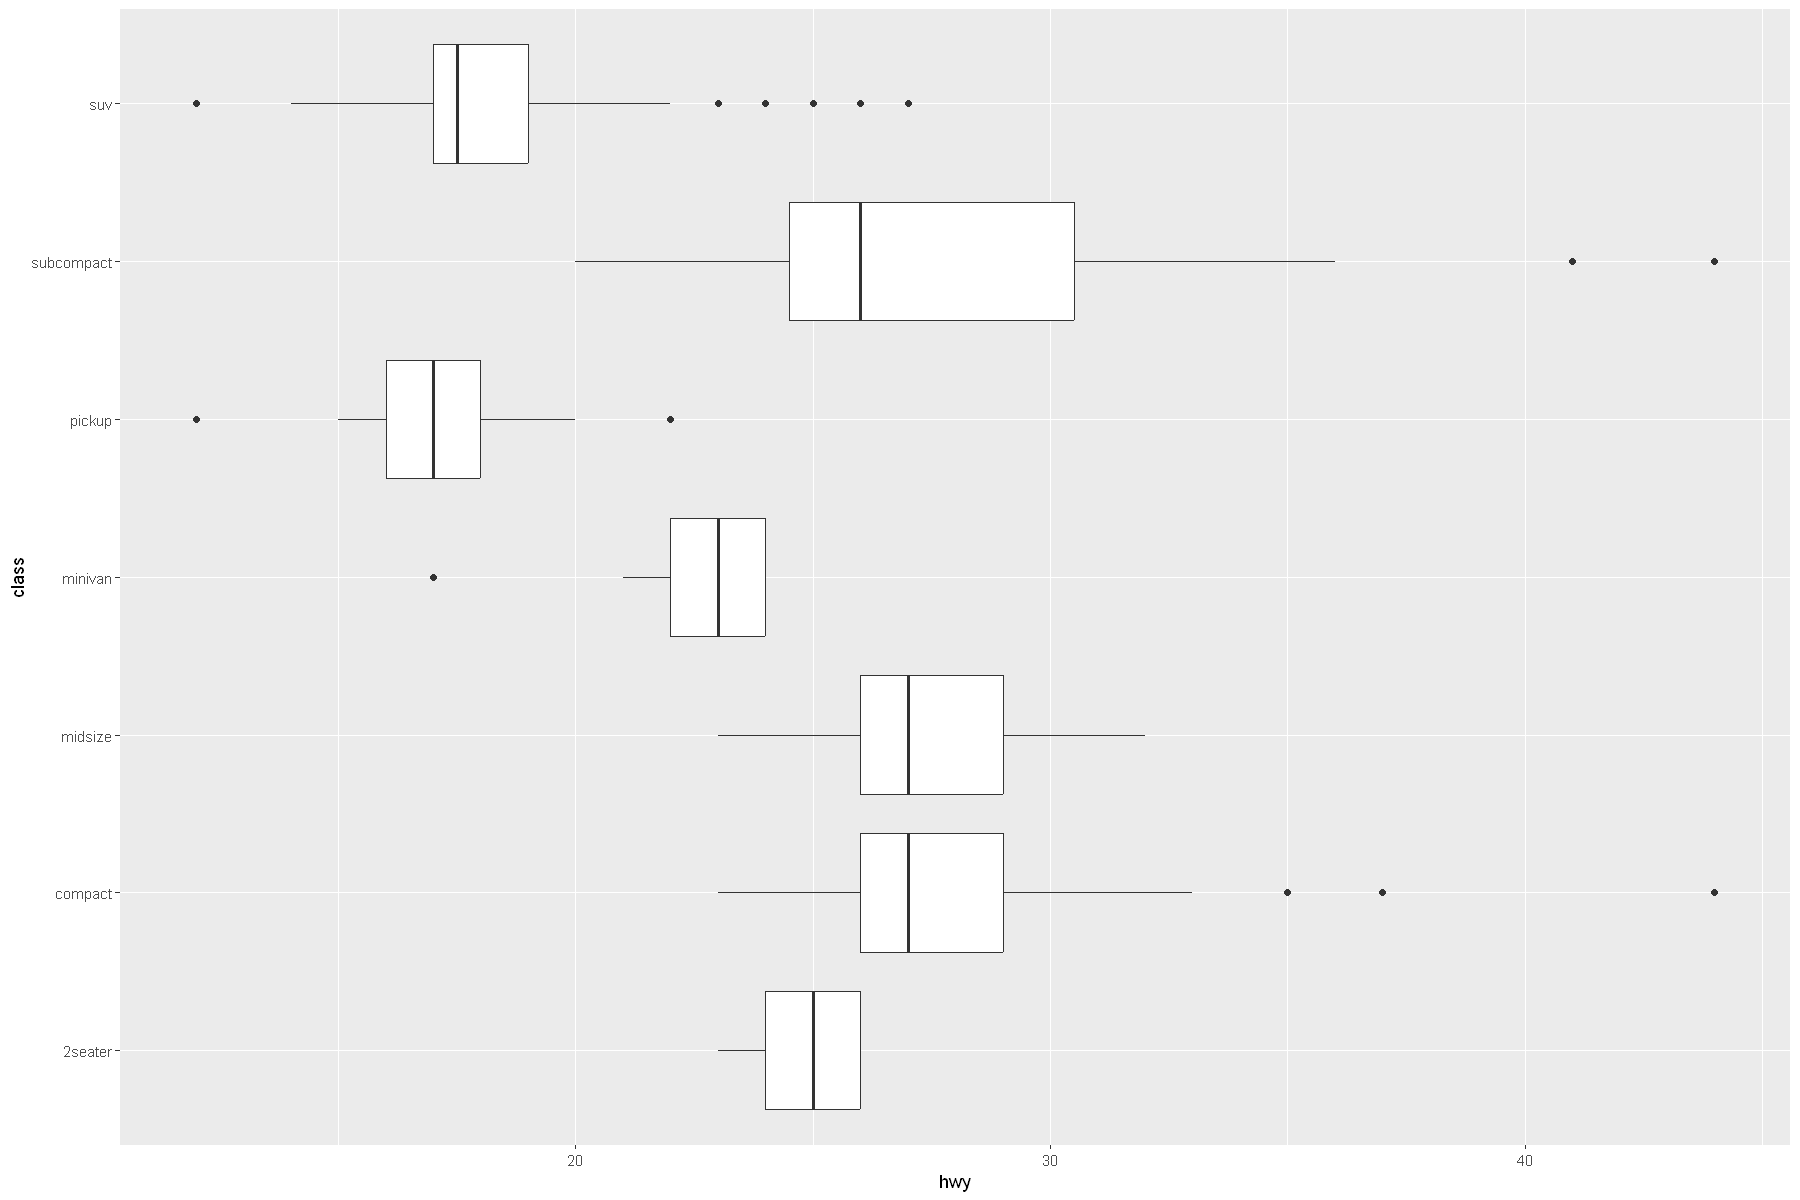

In [68]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot() + coord_flip() # coord_flip() es para que el eje x y el eje y se intercambien

- `coord_quickmap()`: que fija una aspect ratio adecuado para mapas. Esto resulta intereance si se está graficando coordenadas espaciales con `ggplot2`.

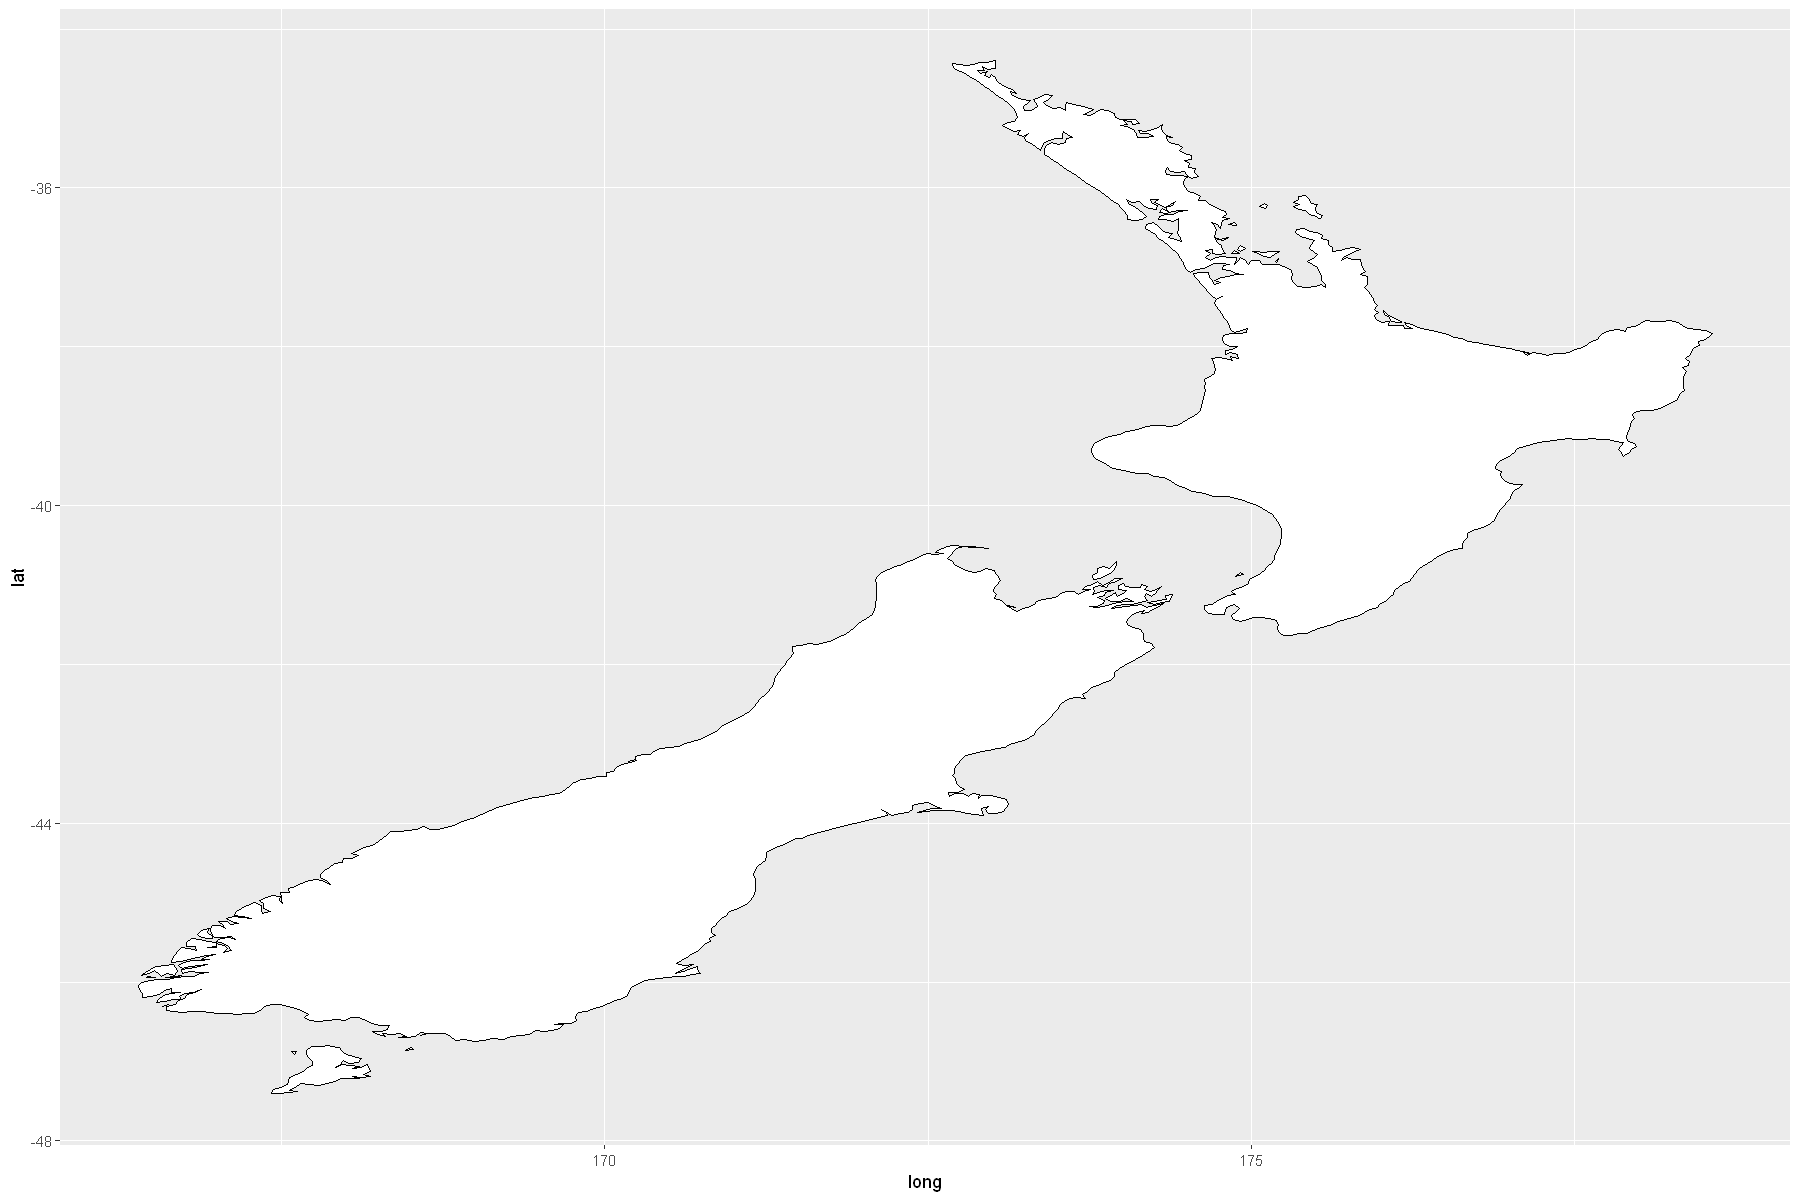

In [76]:
# Sin corrección
nz <- map_data("nz")
ggplot(nz, aes(long, lat, group = group)) + geom_polygon(fill = "white", color = "black")

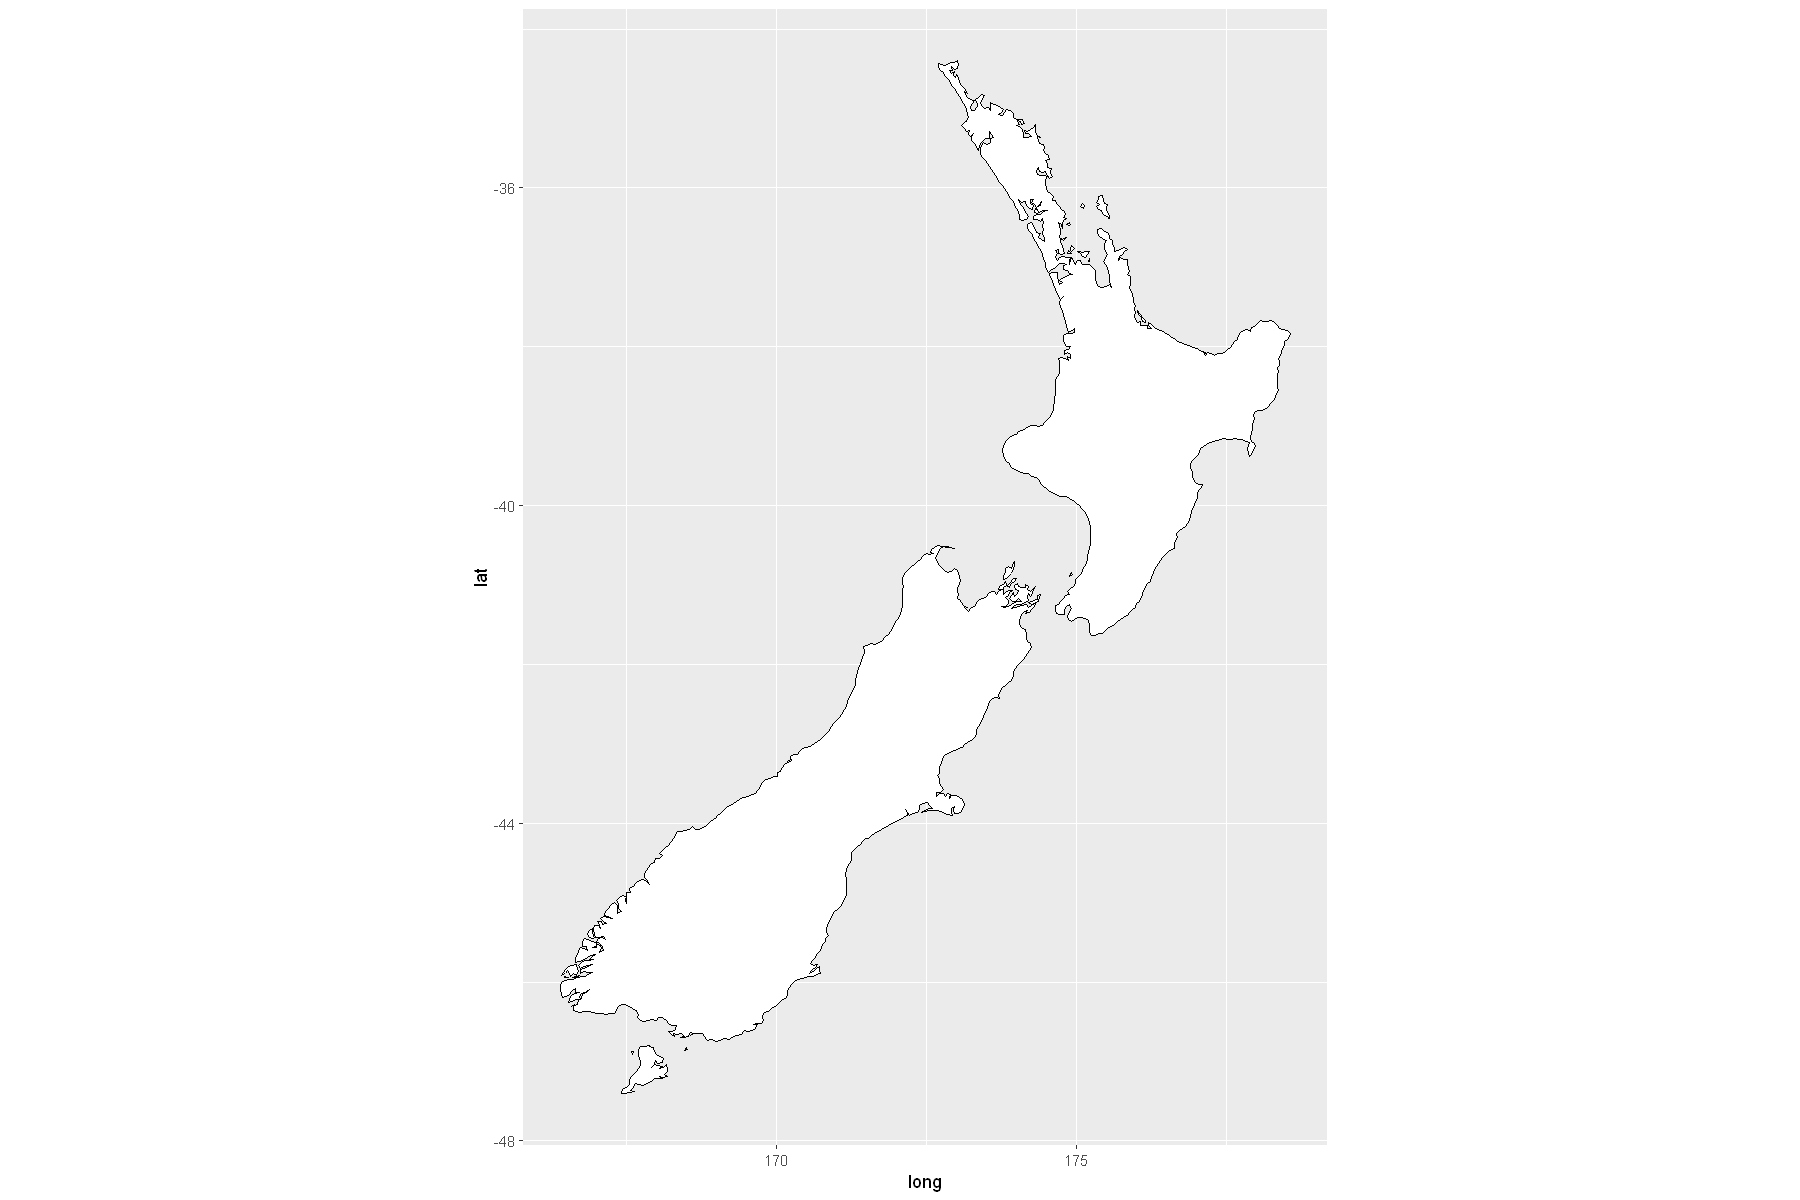

In [77]:
# Con corrección.
ggplot(nz, aes(long, lat, group = group)) + geom_polygon(fill = "white", color = "black") + coord_quickmap() 
                                                # coord_quickmap() es para que la grafica se vea mas proporcionada

-  `coord_polar()` para el uso de coordenadas polares. Las coordenadas polares guartan una conección interesante entre entre las gráficas de barras y gráficas `Coxcomb`:

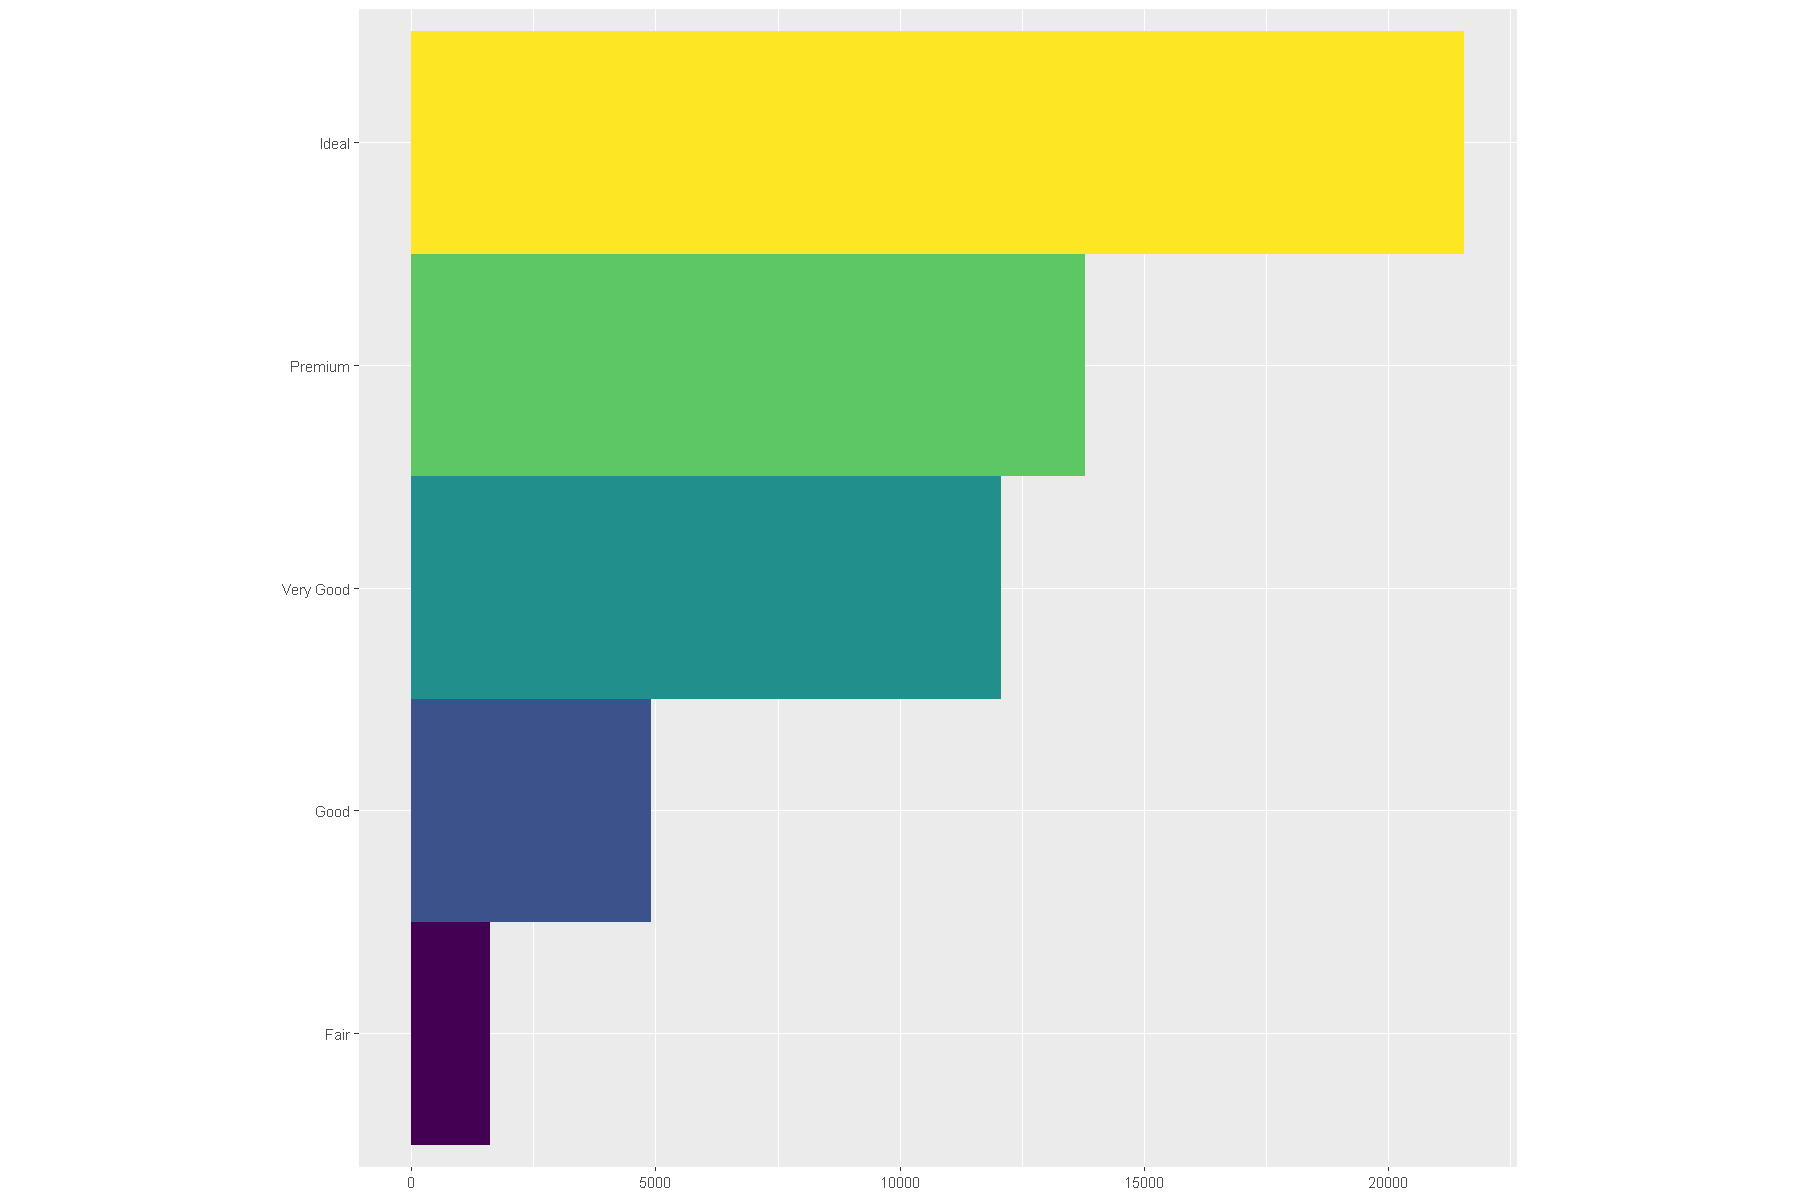

In [78]:
bar <- ggplot(data = diamonds) +
                geom_bar(mapping = aes(x = cut, fill = cut), show.legend = FALSE,width = 1) +
                theme(aspect.ratio = 1) +
                labs(x = NULL, y = NULL)
                bar + coord_flip()

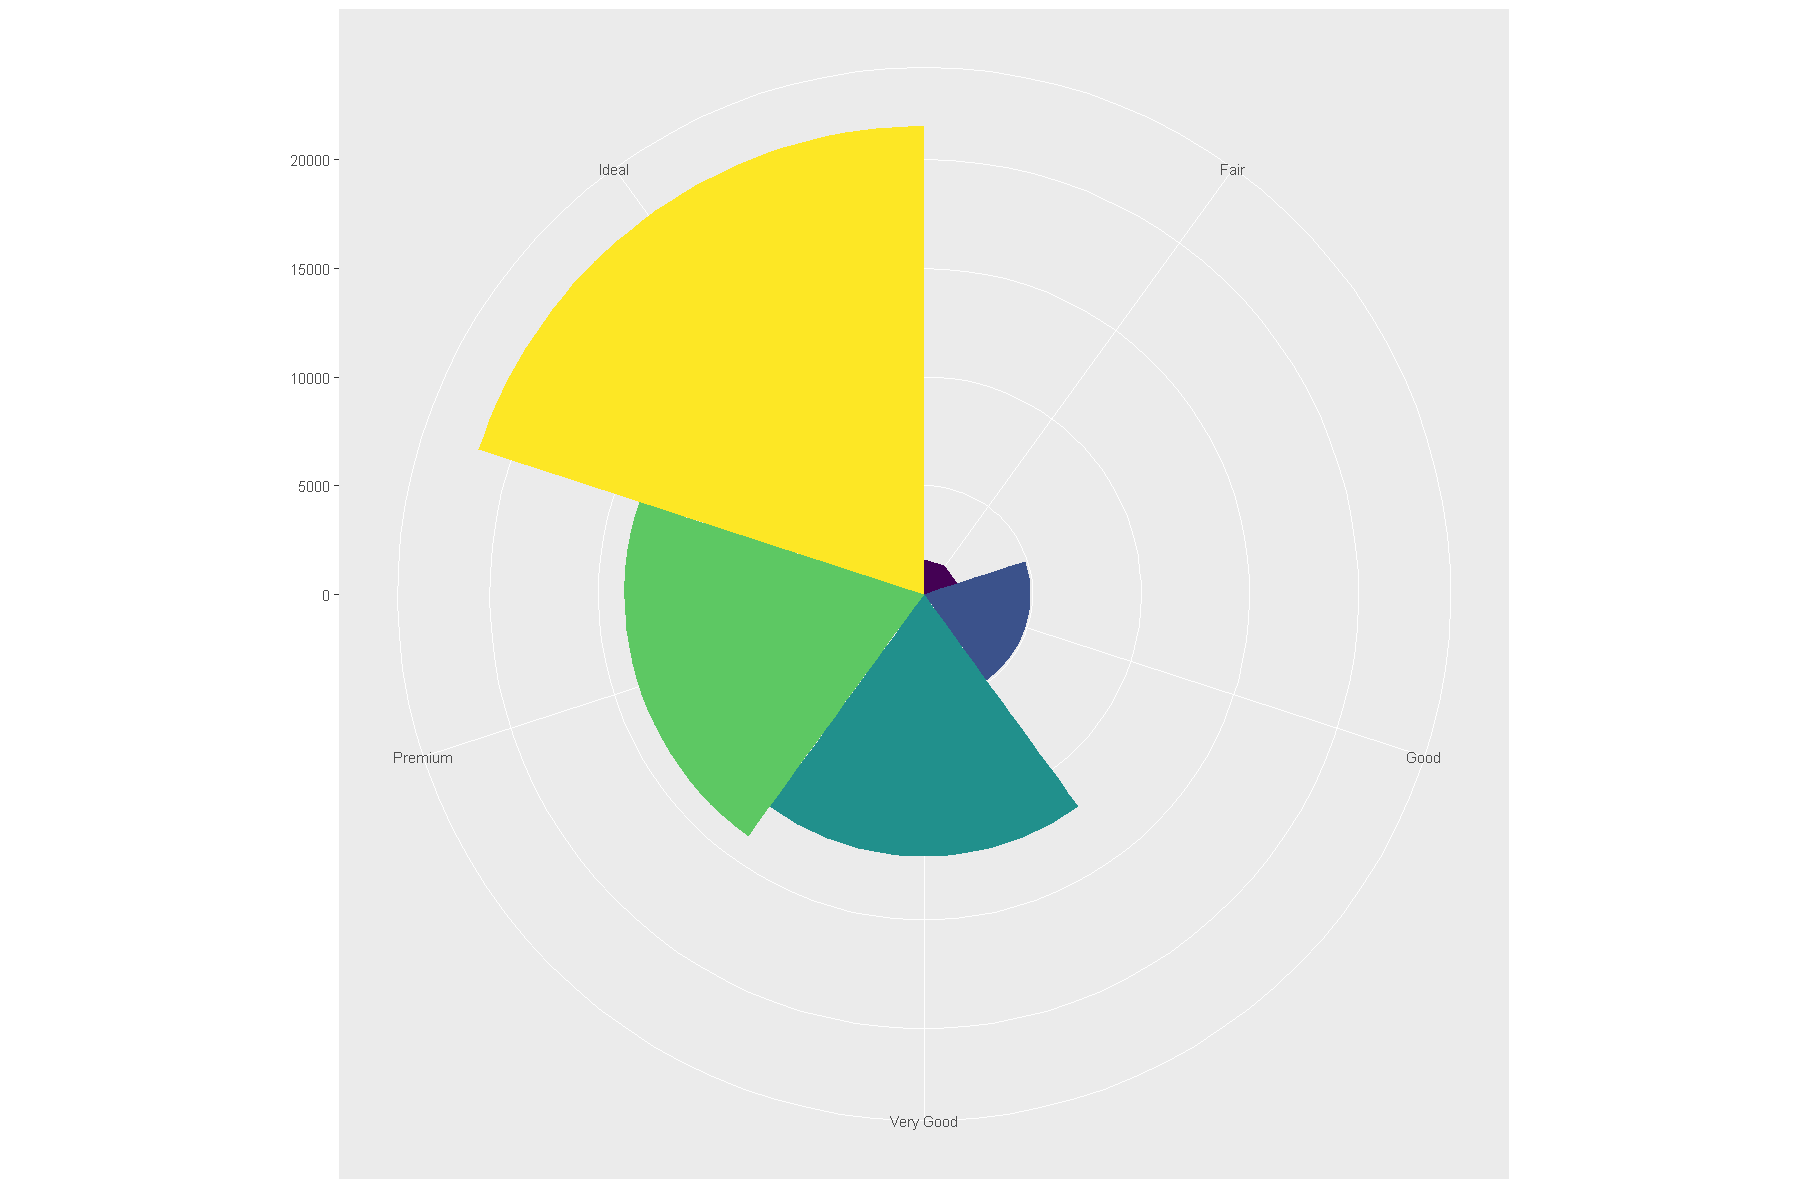

In [79]:
bar + coord_polar()

**Ejercicio:**

Para el presente ejercicio se brinda las siguientes líneas de código para la creación de un dataset basado en el dataset midwest de `R`, para el cual puede obtener mayor información [aquí](https://ggplot2.tidyverse.org/reference/midwest.html).

El código siguiente:



```
library("tidyr")
state_race_long <- midwest %>%
  select(state, popwhite, popblack, popamerindian, popasian, popother) %>%
  gather(key = race, value = population, -state)
```

a continuación:

1. Realice una gráfica de barras horizontales del número de personas por estado.
2. Realice una gráfica `pie chart` del número de personas por estado

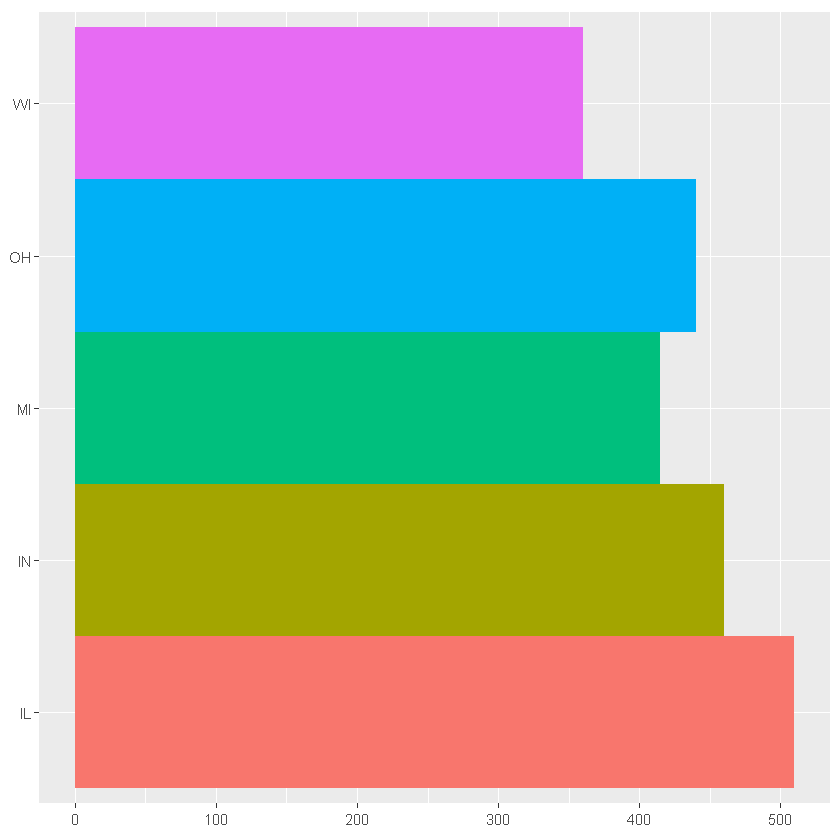

In [57]:
#@title **1. Gráfica de barras horizontales del número de personas por estado**
bar <- ggplot(data = state_race_long) +
geom_bar(
mapping = aes(x = state, fill = state),
show.legend = FALSE,
width = 1
) +
theme(aspect.ratio = 1) +
labs(x = NULL, y = NULL)
bar + coord_flip()

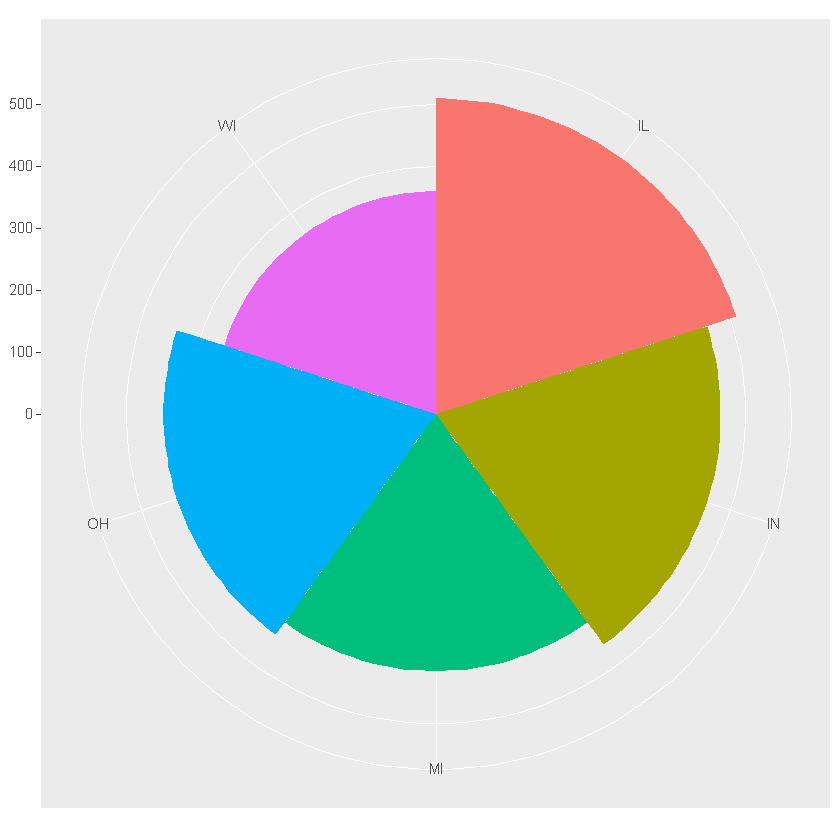

In [58]:
#@title **2. Pie Chart del número de personas por estado.**
bar + coord_polar()